In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data-Copy1.csv')

In [3]:
# A data set contains 21613 obervations with 19 features plus house price. The names of the columns are given below.

# id - Unique ID for each home sold
# date - Date of the home sale
# price - Price of each home sold
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the apartments interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
# condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Lattitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# The main goal is to predict price of each house

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Deleting column 0 - id
df.drop(['id'], axis=1, inplace=True)

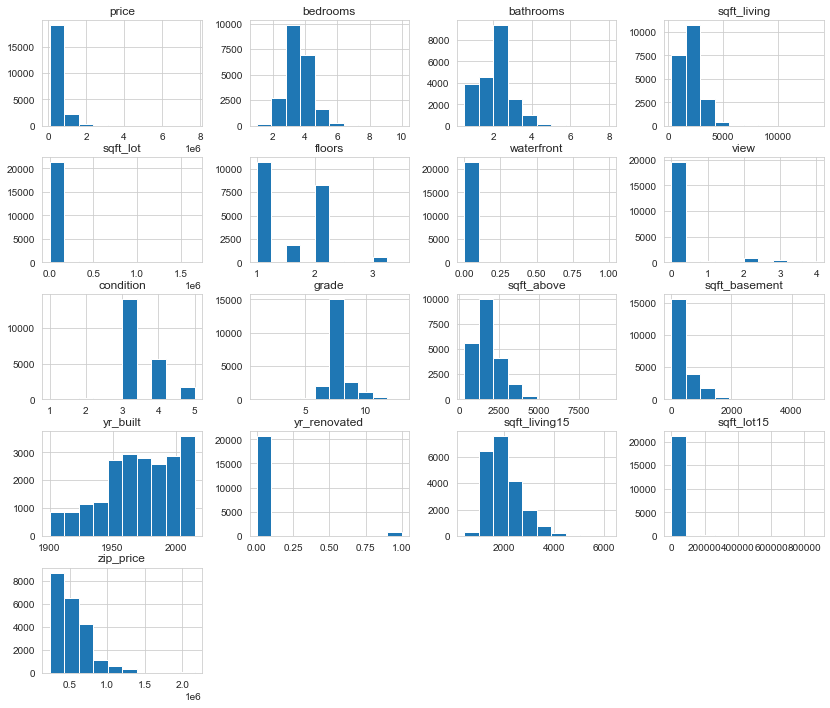

In [82]:
df.hist(figsize=(14,12))
plt.show()

# 1 Data description

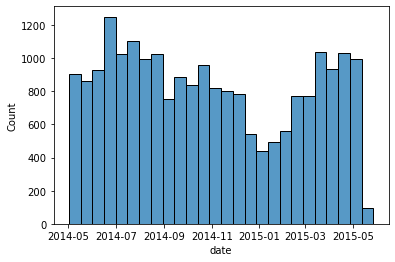

In [7]:
# 1 dates between 2014-05-02 and 2015-05-27
from datetime import datetime
df['date']=pd.to_datetime(df['date'])
sns.histplot(x='date', data=df)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

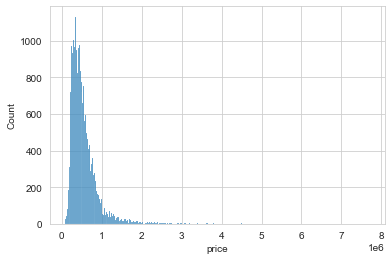

In [8]:
#2 price   -    our target value
sns.set_style('whitegrid')
sns.histplot(x='price', data=df)

In [9]:
#3-4 bedrooms, bathrooms - checking records with zeros
df[(df['bedrooms']==0) & (df['bathrooms']==0)]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
875   2014-06-12  1095000.0         0        0.0         3064      4764   
3119  2015-02-05   380000.0         0        0.0         1470       979   
6994  2014-06-24  1295650.0         0        0.0         4810     28008   
9773  2015-04-29   355000.0         0        0.0         2460      8049   
9854  2014-12-23   235000.0         0        0.0         1470      4800   
14423 2015-04-13   139950.0         0        0.0          844      4269   
19452 2014-09-26   142000.0         0        0.0          290     20875   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
875       3.5           0     2          3      7        3064              0   
3119      3.0           0     2          3      8        1470              0   
6994      2.0           0     0          3     12        4810              0   
9773      2.0           0     0          3      8        2460              0   
9854      2.0           0     0          3      7        1470              0   
14423     1.0           0     0          4      7         844              0   
19452     1.0           0     0          1      1         290              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
875        1990             0    98102  47.6362 -122.322           2360   
3119       2006             0    98133  47.7145 -122.356           1470   
6994       1990             0    98053  47.6642 -122.069           4740   
9773       1990             0    98031  47.4095 -122.168           2520   
9854       1996             0    98065  47.5265 -121.828           1060   
14423      1913             0    98001  47.2781 -122.250           1380   
19452      1963             0    98024  47.5308 -121.888           1620   

       sqft_lot15  
875          4000  
3119         1399  
6994        35061  
9773         8050  
9854         7200  
14423        9600  
19452       22850

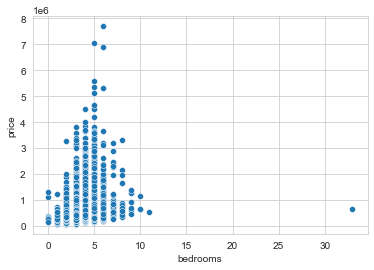

In [10]:
# bedrooms - Number of bedrooms
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.show()

#### we have one outlier with 33 bedrooms. 

In [11]:
# Chcecking the prices and sqft_living grouped by bedrooms
from numpy.lib.function_base import average
df.groupby('bedrooms').agg(
    {
        'price':[min, average, max],
        'sqft_living':[min, average, max],
        'bathrooms': [average]
    })

price                          sqft_living                      \
               min       average        max         min      average    max   
bedrooms                                                                      
0         139950.0  4.095038e+05  1295650.0         290  1707.846154   4810   
1          75000.0  3.176429e+05  1247000.0         370   884.613065   3000   
2          78000.0  4.013727e+05  3278000.0         440  1239.752899   6840   
3          82000.0  4.662321e+05  3800000.0         490  1805.837235   6400   
4         100000.0  6.354195e+05  4489000.0         800  2554.649666   7850   
5         133000.0  7.865998e+05  7062500.0        1120  3047.545284  10040   
6         175000.0  8.255206e+05  7700000.0        1370  3284.341912  12050   
7         280000.0  9.511847e+05  3200000.0        1940  3974.210526  13540   
8         340000.0  1.105077e+06  3300000.0        2280  3800.000000   7710   
9         450000.0  8.939998e+05  1400000.0        2820  3775.000000   4620   
10        650000.0  8.193333e+05  1148000.0        2920  3706.666667   4590   
11        520000.0  5.200000e+05   520000.0        3000  3000.000000   3000   
33        640000.0  6.400000e+05   640000.0        1620  1620.000000   1620   

         bathrooms  
           average  
bedrooms            
0         0.826923  
1         1.066583  
2         1.401721  
3         1.968394  
4         2.436428  
5         2.778576  
6         3.068015  
7         3.651316  
8         3.557692  
9         4.416667  
10        3.416667  
11        3.000000  
33        1.750000

In [12]:
df[df['bedrooms']>=10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8757  2014-08-21   520000.0        11       3.00         3000      4960   
13314 2014-08-14  1148000.0        10       5.25         4590     10920   
15161 2014-10-29   650000.0        10       2.00         3610     11914   
15870 2014-06-25   640000.0        33       1.75         1620      6000   
19254 2014-12-29   660000.0        10       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
8757      2.0           0     0          3      7        2400            600   
13314     1.0           0     2          3      9        2500           2090   
15161     2.0           0     0          4      7        3010            600   
15870     1.0           0     0          5      7        1040            580   
19254     2.0           0     0          4      7        1860           1060   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8757       1918          1999    98106  47.5560 -122.363           1420   
13314      2008             0    98004  47.5861 -122.113           2730   
15161      1958             0    98006  47.5705 -122.175           2040   
15870      1947             0    98103  47.6878 -122.331           1330   
19254      1913             0    98105  47.6635 -122.320           1810   

       sqft_lot15  
8757         4960  
13314       10400  
15161       11914  
15870        4700  
19254        3745

In [13]:
# 33 bedrooms in a medium size house? I'm changing it into 3:
df.loc[15870,'bedrooms']=3
# Also there is one medium size house with 11 bedrooms. Average price and sqfl_living are more like it is 4 bedrooms:
df.loc[8757,'bedrooms']=4

In [14]:
df[df['bedrooms']==0].sort_values('price')

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
14423 2015-04-13   139950.0         0       0.00          844      4269   
19452 2014-09-26   142000.0         0       0.00          290     20875   
4868  2014-10-02   228000.0         0       1.00          390      5900   
9854  2014-12-23   235000.0         0       0.00         1470      4800   
8484  2014-09-25   240000.0         0       2.50         1810      5669   
18379 2014-10-29   265000.0         0       0.75          384    213444   
3467  2014-08-05   288000.0         0       1.50         1430      1650   
12653 2015-02-18   320000.0         0       2.50         1490      7111   
8477  2014-11-17   339950.0         0       2.50         2290      8319   
9773  2015-04-29   355000.0         0       0.00         2460      8049   
3119  2015-02-05   380000.0         0       0.00         1470       979   
875   2014-06-12  1095000.0         0       0.00         3064      4764   
6994  2014-06-24  1295650.0         0       0.00         4810     28008   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
14423     1.0           0     0          4      7         844              0   
19452     1.0           0     0          1      1         290              0   
4868      1.0           0     0          2      4         390              0   
9854      2.0           0     0          3      7        1470              0   
8484      2.0           0     0          3      7        1810              0   
18379     1.0           0     0          3      4         384              0   
3467      3.0           0     0          3      7        1430              0   
12653     2.0           0     0          3      7        1490              0   
8477      2.0           0     0          3      8        2290              0   
9773      2.0           0     0          3      8        2460              0   
3119      3.0           0     2          3      8        1470              0   
875       3.5           0     2          3      7        3064              0   
6994      2.0           0     0          3     12        4810              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
14423      1913             0    98001  47.2781 -122.250           1380   
19452      1963             0    98024  47.5308 -121.888           1620   
4868       1953             0    98118  47.5260 -122.261           2170   
9854       1996             0    98065  47.5265 -121.828           1060   
8484       2003             0    98038  47.3493 -122.053           1810   
18379      2003             0    98070  47.4177 -122.491           1920   
3467       1999             0    98125  47.7222 -122.290           1430   
12653      1999             0    98065  47.5261 -121.826           1500   
8477       1985             0    98042  47.3473 -122.151           2500   
9773       1990             0    98031  47.4095 -122.168           2520   
3119       2006             0    98133  47.7145 -122.356           1470   
875        1990             0    98102  47.6362 -122.322           2360   
6994       1990             0    98053  47.6642 -122.069           4740   

       sqft_lot15  
14423        9600  
19452       22850  
4868         6000  
9854         7200  
8484         5685  
18379      224341  
3467         1650  
12653        4675  
8477         8751  
9773         8050  
3119         1399  
875          4000  
6994        35061

In [15]:
# 0 bedrooms is a mistake, I'm changing it into 7 (where price > 1.000.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] > 1000000)), 7, df["bedrooms"])
# changing into 2 (where price >= 320.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] >= 320000)), 2, df["bedrooms"])
# changing into 1 (where price > 320.000):
df["bedrooms"] = np.where( ((df["bedrooms"] == 0) & (df["price"] < 320000)), 1, df["bedrooms"])

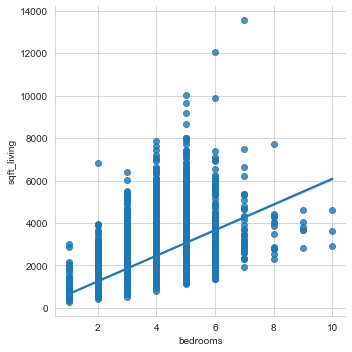

In [16]:
# Now looks better (no zero values or outliers)
sns.lmplot(x='bedrooms', y='sqft_living', data=df)
plt.show()

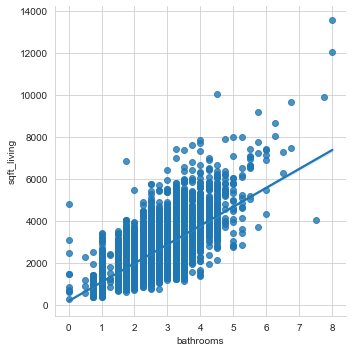

In [17]:
#4 bathrooms
sns.lmplot(x='bathrooms', y='sqft_living', data=df)
plt.show()

In [18]:
# list with 0 bathrooms
df[df['bathrooms']<0.5].sort_values('price')

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1149  2015-02-17    75000.0         1        0.0          670     43377   
14423 2015-04-13   139950.0         1        0.0          844      4269   
19452 2014-09-26   142000.0         1        0.0          290     20875   
9854  2014-12-23   235000.0         1        0.0         1470      4800   
5832  2014-11-04   280000.0         1        0.0          600     24501   
9773  2015-04-29   355000.0         2        0.0         2460      8049   
3119  2015-02-05   380000.0         2        0.0         1470       979   
10481 2014-09-18   484000.0         1        0.0          690     23244   
875   2014-06-12  1095000.0         7        0.0         3064      4764   
6994  2014-06-24  1295650.0         7        0.0         4810     28008   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1149      1.0           0     0          3      3         670              0   
14423     1.0           0     0          4      7         844              0   
19452     1.0           0     0          1      1         290              0   
9854      2.0           0     0          3      7        1470              0   
5832      1.0           0     0          2      3         600              0   
9773      2.0           0     0          3      8        2460              0   
3119      3.0           0     2          3      8        1470              0   
10481     1.0           0     0          4      7         690              0   
875       3.5           0     2          3      7        3064              0   
6994      2.0           0     0          3     12        4810              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1149       1966             0    98022  47.2638 -121.906           1160   
14423      1913             0    98001  47.2781 -122.250           1380   
19452      1963             0    98024  47.5308 -121.888           1620   
9854       1996             0    98065  47.5265 -121.828           1060   
5832       1950             0    98045  47.5316 -121.749            990   
9773       1990             0    98031  47.4095 -122.168           2520   
3119       2006             0    98133  47.7145 -122.356           1470   
10481      1948             0    98053  47.6429 -121.955           1690   
875        1990             0    98102  47.6362 -122.322           2360   
6994       1990             0    98053  47.6642 -122.069           4740   

       sqft_lot15  
1149        42882  
14423        9600  
19452       22850  
9854         7200  
5832        22549  
9773         8050  
3119         1399  
10481       19290  
875          4000  
6994        35061

In [19]:
df.groupby('bathrooms').agg(
    {
        'price':[min, average, max],
        'sqft_living':[min, average, max]
    })

price                          sqft_living                     
                 min       average        max         min       average    max
bathrooms                                                                     
0.00         75000.0  4.481600e+05  1295650.0         290   1636.800000   4810
0.50        109000.0  2.373750e+05   312500.0         580   1235.000000   2300
0.75         80000.0  2.945209e+05   785000.0         370    896.611111   2510
1.00         78000.0  3.470412e+05  1300000.0         390   1181.123313   3410
1.25        275000.0  6.212167e+05  1388000.0         860   1525.555556   2400
1.50        107000.0  4.093222e+05  1500000.0         680   1544.630014   3520
1.75        115000.0  4.548961e+05  3278000.0         590   1787.202428   6840
2.00        115000.0  4.578897e+05  2200000.0         720   1796.669430   5461
2.25        160000.0  5.336768e+05  2400000.0         850   2097.700537   4910
2.50        153503.0  5.535965e+05  3070000.0         750   2377.901115   5760
2.75        183750.0  6.602304e+05  2700000.0         730   2669.998312   5700
3.00        154000.0  7.084152e+05  4489000.0        1160   2736.035857   6430
3.25        176000.0  9.703398e+05  3640900.0        1210   3223.940577   7420
3.50        216650.0  9.319331e+05  3710000.0        1130   3411.303694   7350
3.75        255000.0  1.197217e+06  3650000.0        1580   3779.741935   7620
4.00        265000.0  1.267709e+06  3400000.0        1390   4071.867647   7850
4.25        490000.0  1.525774e+06  3850000.0        1960   4609.329114   6980
4.50        290000.0  1.333620e+06  7062500.0        2120   4405.940000  10040
4.75        480000.0  2.021304e+06  3650000.0        3700   5275.652174   7880
5.00        343000.0  1.673492e+06  5350000.0        2732   4851.857143   8000
5.25        300000.0  1.817177e+06  5110800.0        2860   5016.153846   8010
5.50        925000.0  2.522300e+06  4500000.0        5060   6506.000000   7400
5.75        540000.0  2.492500e+06  5570000.0        3700   6962.500000   9200
6.00        900000.0  2.946833e+06  5300000.0        4340   6443.333333   7440
6.25       2888000.0  3.094000e+06  3300000.0        8020   8345.000000   8670
6.50       1180000.0  1.709445e+06  2238890.0        6260   6765.000000   7270
6.75        800000.0  2.734000e+06  4668000.0        7480   8560.000000   9640
7.50        450000.0  4.500000e+05   450000.0        4050   4050.000000   4050
7.75       6885000.0  6.885000e+06  6885000.0        9890   9890.000000   9890
8.00       2280000.0  4.990000e+06  7700000.0       12050  12795.000000  13540

In [20]:
# 0 bathrooms is a mistake, I'm changing it into 4 (where price > 1.000.000):
df["bathrooms"] = np.where( ((df["bathrooms"] == 0) & (df["price"] > 1000000)), 4, df["bathrooms"])
# changing into 0.75 (where sqfl_living < 1.000):
df["bathrooms"] = np.where( ((df["bathrooms"] == 0) & (df["sqft_living"] < 1000)), 0.75, df["bathrooms"])
# changing into 1 for the rest:
df["bathrooms"] = np.where(df["bathrooms"] == 0, 1, df["bathrooms"])

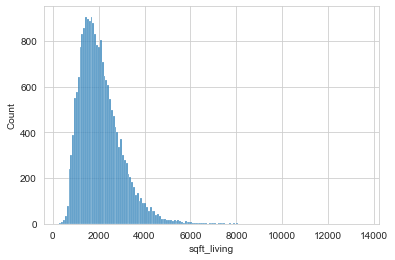

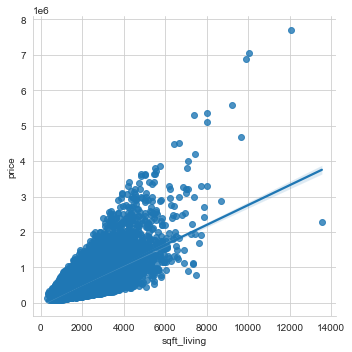

In [21]:
#5 sqft_living - Square footage of the apartments interior living space
sns.histplot(x='sqft_living', data=df)
sns.lmplot(x='sqft_living', y='price', data=df)
plt.show()

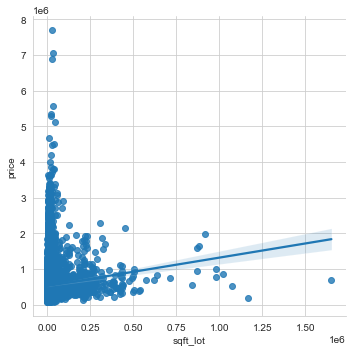

In [22]:
#6 sqft_lot - Square footage of the land space
sns.lmplot(x='sqft_lot', y='price', data=df)
plt.show()

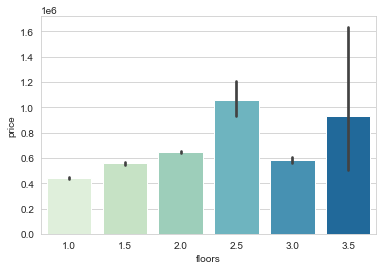

In [23]:
#7 floors - Number of floors
sns.barplot(x='floors', y='price', data=df, palette=sns.color_palette('GnBu', 6))
plt.show()

In [24]:
#8 waterfront: A variable for whether the apartment was overlooking the waterfront or not
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

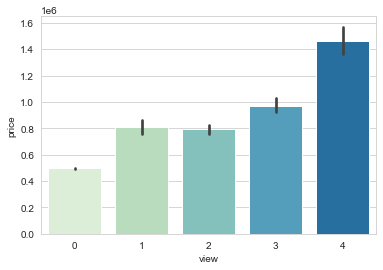

In [25]:
#9 view: An index from 0 to 4 of how good the view of the property was:
# 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
df['view'].value_counts()
sns.barplot(x='view', y='price', data=df, palette=sns.color_palette('GnBu', 5))
plt.show()

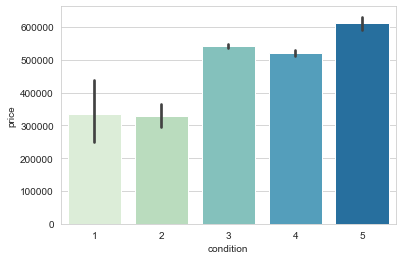

In [26]:
#10 condition - An index from 1 to 5 on the condition of the apartment:
# 1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
sns.barplot(x='condition', y='price', data=df, palette=sns.color_palette('GnBu', 5))
plt.show()

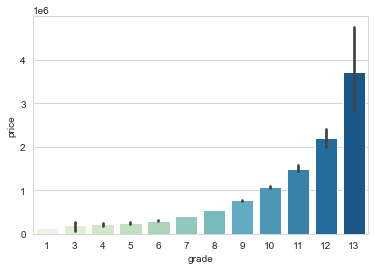

In [27]:
#11 grade - An index from 1 to 13, where:
    # 1-3 falls short of building construction and design, 
    # 7 has an average level of construction and design,
    # 11-13 have a high quality level of construction and design.
sns.barplot(x='grade', y='price', data=df, palette=sns.color_palette('GnBu', 12))
plt.show()

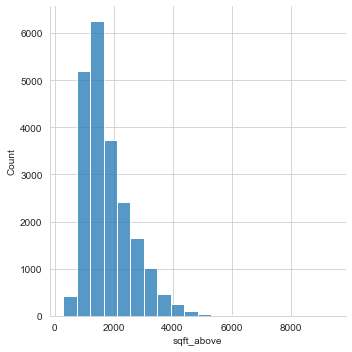

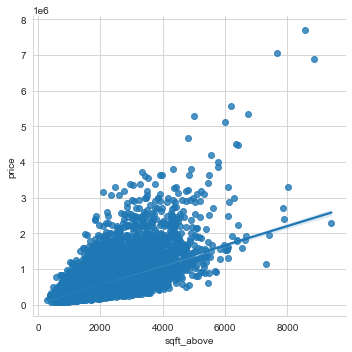

In [28]:
#12 sqft_above: the square footage of the interior housing space that is above ground level
sns.displot(df.sqft_above, bins=20)
sns.lmplot(x='sqft_above', y='price', data=df)
plt.show()

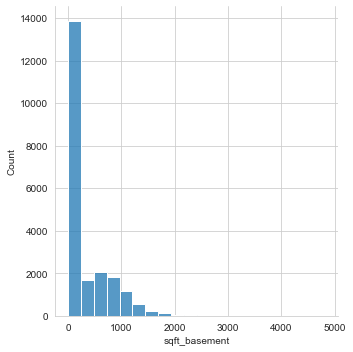

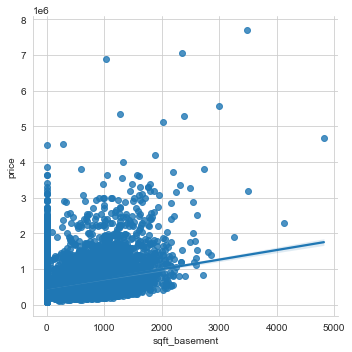

In [29]:
#13 sqft_basement: The square footage of the interior housing space that is below ground level
sns.displot(df.sqft_basement, bins=20)
sns.lmplot(x='sqft_basement', y='price', data=df)
plt.show()

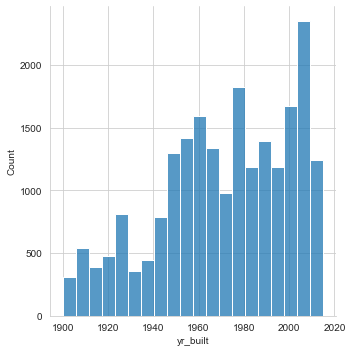

In [30]:
#14 yr_built: The year the house was initially built
sns.displot(df.yr_built, bins=20)
plt.show()

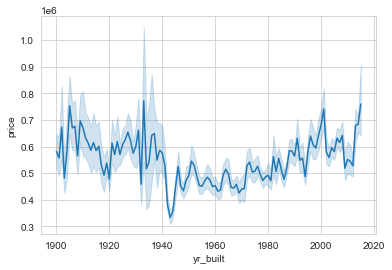

In [31]:
sns.lineplot(x='yr_built', y='price', data=df)
plt.show()

In [32]:
#15 yr_renovated
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

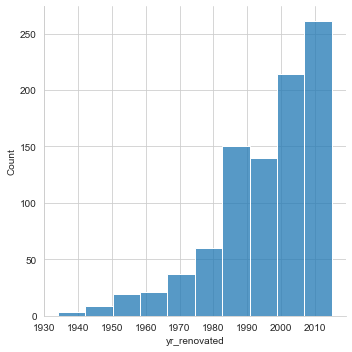

In [33]:
df_ren = df[(df['yr_renovated'] > 0)]
sns.displot(df_ren.yr_renovated, bins=10)
plt.show()

#### only 914 buildings were renovated (it's ~4,2% of all records)

In [34]:
# chcecking prices of renovated houses

df_ren['yr_ren_cat']=pd.cut(df_ren['yr_renovated'], bins=[0,1950,1975,2000,2025],
                       labels=['before 1950','between 1950-1975','between 1975-2000','after 2000'])
df_ren['yr_ren_cat'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_1496\3662130809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ren['yr_ren_cat']=pd.cut(df_ren['yr_renovated'], bins=[0,1950,1975,2000,2025],


after 2000           423
between 1975-2000    396
between 1950-1975     83
before 1950           12
Name: yr_ren_cat, dtype: int64

In [35]:
df_ren.groupby('yr_ren_cat').agg(
    {
        'price':[min, average, max],
    })

price                          
                        min        average        max
yr_ren_cat                                           
before 1950        152275.0  385743.750000   565000.0
between 1950-1975  160000.0  503443.795181  2050000.0
between 1975-2000  135000.0  763934.361111  7700000.0
after 2000         110000.0  818093.773050  7062500.0

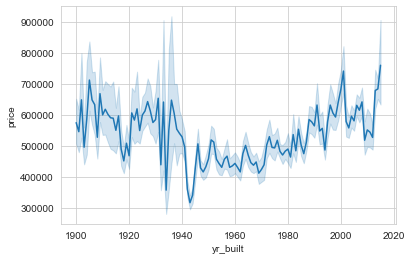

In [36]:
# chcecking prices of not renovated houses

df_not_ren = df[(df['yr_renovated'] == 0)]
sns.lineplot(x='yr_built', y='price', data=df_not_ren)
plt.show()

In [37]:
df_not_ren['not_ren_built_yr']=pd.cut(df['yr_built'], bins=[0,1950,1975,2000,2025],
                       labels=['before 1950','between 1950-1975','between 1975-2000','after 2000'])
df_not_ren['not_ren_built_yr'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_1496\3944875834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_ren['not_ren_built_yr']=pd.cut(df['yr_built'], bins=[0,1950,1975,2000,2025],


between 1975-2000    6084
between 1950-1975    5497
before 1950          4578
after 2000           4540
Name: not_ren_built_yr, dtype: int64

In [38]:
df_not_ren.groupby('not_ren_built_yr').agg(
    {
        'price':[min, average, max],
    })

price                          
                        min        average        max
not_ren_built_yr                                     
before 1950         78000.0  520122.902359  3650000.0
between 1950-1975   75000.0  456459.765508  3395000.0
between 1975-2000  100000.0  541475.436555  5300000.0
after 2000         155000.0  615268.731498  6885000.0

#### house prices that were renovated before 1950 are lower than not renovated. I'm changing this 12 records to 0 (not renovated). For other renovated I'm changong numbers to 1 - then it will be a column renovated (1) or not (0)

In [39]:
# buildings renovated before 1950 has less price than not renovated, I'm changing it into 0 (yr_renovated < 1950):
df["yr_renovated"] = np.where((df["yr_renovated"] <= 1950), 0, df["yr_renovated"])
df["yr_renovated"] = np.where((df["yr_renovated"] > 1950), 1, df["yr_renovated"])
df['yr_renovated'].value_counts()

0    20711
1      902
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

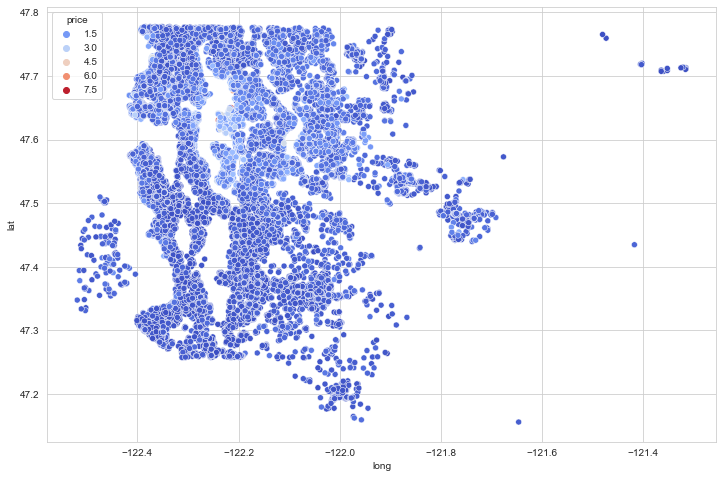

In [40]:
#17-18 longittude, lattitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='coolwarm')

#### Unfortunately we can't see where are the most expensive houses. To check this I'll logaritm the price.

C:\Users\HP\AppData\Local\Temp\ipykernel_1496\1384617216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['price_log']=np.log(df_map['price'])


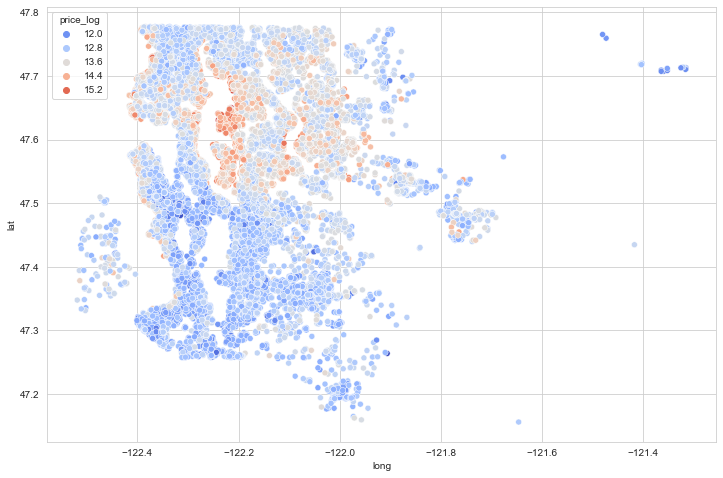

In [41]:
df_map=df[['price','lat','long']]
df_map['price_log']=np.log(df_map['price'])
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_map, hue='price_log', palette='coolwarm')
plt.show()

#### Now it's better. We can see where the most expensive houses are located

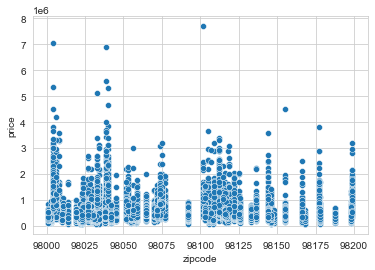

In [42]:
# 16 zipcode
sns.scatterplot(x='zipcode', y='price', data=df)
plt.show()

In [43]:
Unique_zipcode=len(df['zipcode'].unique())
print('Number of unique zipcodes: ' + str(Unique_zipcode))

Number of unique zipcodes: 70


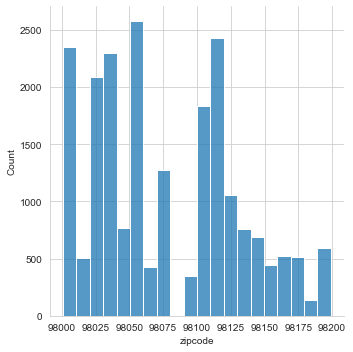

In [44]:
# zipcode distribution
sns.displot(df.zipcode, bins=20)

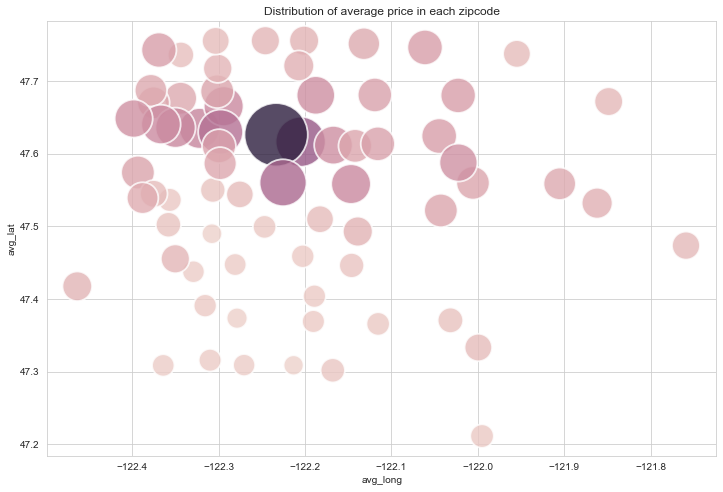

In [45]:
zipprice = pd.DataFrame(df[['price', 'lat', 'long']].groupby(df['zipcode']).mean())
zipprice.rename(columns = {'price':'zip_price', 'lat':'avg_lat', 'long':'avg_long'}, inplace = True)
plt.figure(figsize=(12,8))
sns.scatterplot(x='avg_long', y='avg_lat', data=zipprice, size='zip_price', hue='zip_price', 
                sizes=(400, 4000), alpha=0.8, legend=False).set(title='Distribution of average price in each zipcode')
plt.show()

#### The highest price are shown as big black bubble (location - Medina). The farther from this point the prices decrease.

In [46]:
df = pd.merge(df, zipprice, on='zipcode', how='inner')
df.sample(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13010 2014-09-11  1265000.0         4       3.25         3640      3604   
11809 2014-10-30   225000.0         3       1.75         1460      8372   
16296 2015-01-30   465000.0         3       2.00         1840     40438   
5740  2014-11-24   294400.0         4       2.50         1788     10183   
4407  2014-10-21  1205000.0         4       2.75         2470      5500   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
13010     2.0           0     2          5  ...      1913             0   
11809     1.0           0     0          4  ...      1981             0   
16296     2.0           0     0          3  ...      1994             0   
5740      2.0           0     0          4  ...      1990             0   
4407      1.0           0     3          3  ...      1960             1   

       zipcode      lat     long  sqft_living15  sqft_lot15      zip_price  \
13010    98122  47.6145 -122.284           1940        4600  634360.179310   
11809    98042  47.3683 -122.087           1220        7803  311632.105839   
16296    98045  47.4853 -121.709           1380       44049  439471.081448   
5740     98002  47.2883 -122.218           1700        6600  234284.035176   
4407     98107  47.6586 -122.358           1620        5500  579053.417293   

         avg_lat    avg_long  
13010  47.610160 -122.299772  
11809  47.365665 -122.115453  
16296  47.473359 -121.759036  
5740   47.308780 -122.213357  
4407   47.669790 -122.375571  

[5 rows x 23 columns]

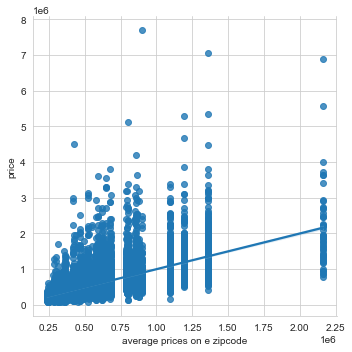

In [47]:
sns.lmplot(x='zip_price', y='price', data=df).set(xlabel="average prices on e zipcode")
plt.show()

In [48]:
zipprice.sort_values('zip_price', ascending=False)

zip_price    avg_lat    avg_long
zipcode                                     
98039    2.160607e+06  47.625840 -122.233540
98004    1.355927e+06  47.616183 -122.205189
98040    1.194230e+06  47.559846 -122.225592
98112    1.095499e+06  47.629619 -122.297866
98102    9.012583e+05  47.634607 -122.322248
...               ...        ...         ...
98148    2.849086e+05  47.437437 -122.329316
98001    2.808047e+05  47.309020 -122.270646
98032    2.512962e+05  47.373556 -122.278848
98168    2.403284e+05  47.489700 -122.307877
98002    2.342840e+05  47.308780 -122.213357

[70 rows x 3 columns]

#### Average prices in zipcode 98039 are even few times bigger than on other zipcodes.

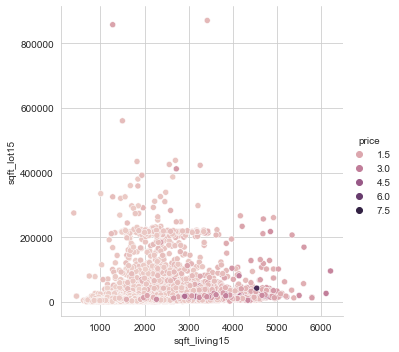

In [79]:
#18 sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#19 sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
sns.relplot(y='sqft_lot15', x='sqft_living15', data=df, kind='scatter', hue='price')
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [52]:
df.drop(['date', 'zipcode', 'lat', 'long', 'avg_lat', 'avg_long'], axis=1, inplace=True)

<AxesSubplot:>

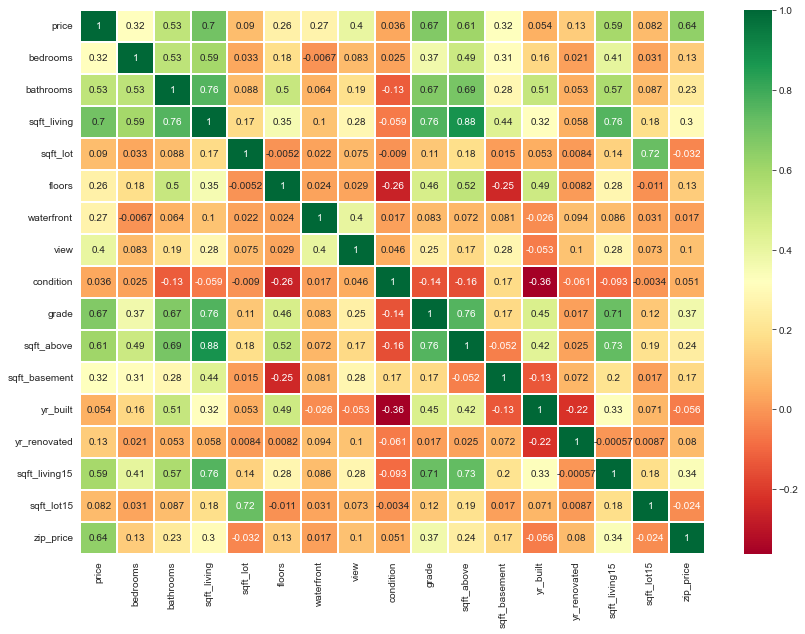

In [65]:
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)

In [54]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370471      2.115440   2079.899736  1.510697e+04   
std    3.671272e+05      0.904587      0.769424    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     10.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated  sqft_living15  \
count  21613.000000   21613.000000  21613.000000  21613.000000   21613.000000   
mean    1788.390691     291.509045   1971.005136      0.041734    1986.552492   
std      828.090978     442.575043     29.373411      0.199986     685.391304   
min      290.000000       0.000000   1900.000000      0.000000     399.000000   
25%     1190.000000       0.000000   1951.000000      0.000000    1490.000000   
50%     1560.000000       0.000000   1975.000000      0.000000    1840.000000   
75%     2210.000000     560.000000   1997.000000      0.000000    2360.000000   
max     9410.000000    4820.000000   2015.000000      1.000000    6210.000000   

          sqft_lot15     zip_price  
count   21613.000000  2.161300e+04  
mean    12768.455652  5.400881e+05  
std     27304.179631  2.343263e+05  
min       651.000000  2.342840e+05  
25%      5100.000000  3.594832e+05  
50%      7620.000000  4.935525e+05  
75%     10083.000000  6.452315e+05  
max    871200.000000  2.160607e+06

# 2 First model with standardization

In [55]:
from sklearn.preprocessing import StandardScaler
dfs=df[:]
X = dfs.drop(columns=['price'])
y = dfs['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Modelling Libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Evaluation & CV Libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score, KFold

In [59]:
models =[('RF',RandomForestRegressor(random_state=42)), ("CTB", CatBoostRegressor(random_state=42)),
         ("LGBM",LGBMRegressor(random_state=42)), ('GBR',GradientBoostingRegressor(random_state=42)),
         ('XGB', XGBRegressor(random_state=42))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = r2_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

Learning rate set to 0.064232
0:	learn: 351659.3593773	total: 148ms	remaining: 2m 27s
1:	learn: 336908.0029156	total: 152ms	remaining: 1m 15s
2:	learn: 323135.5140478	total: 155ms	remaining: 51.3s
3:	learn: 310589.1536392	total: 158ms	remaining: 39.3s
4:	learn: 298781.5818725	total: 161ms	remaining: 32s
5:	learn: 287541.1998422	total: 164ms	remaining: 27.1s
6:	learn: 277266.5598860	total: 166ms	remaining: 23.6s
7:	learn: 267935.9306803	total: 169ms	remaining: 21s
8:	learn: 259038.0420578	total: 172ms	remaining: 19s
9:	learn: 250837.3157782	total: 175ms	remaining: 17.4s
10:	learn: 242912.2628805	total: 179ms	remaining: 16.1s
11:	learn: 235312.3870080	total: 182ms	remaining: 14.9s
12:	learn: 228776.4812892	total: 184ms	remaining: 14s
13:	learn: 222293.0543075	total: 187ms	remaining: 13.2s
14:	learn: 216228.5178742	total: 191ms	remaining: 12.5s
15:	learn: 210785.7133840	total: 195ms	remaining: 12s
16:	learn: 205495.1872312	total: 198ms	remaining: 11.4s
17:	learn: 200797.1653528	total: 201

211:	learn: 107809.3947014	total: 723ms	remaining: 2.69s
212:	learn: 107682.9968187	total: 726ms	remaining: 2.68s
213:	learn: 107591.7574616	total: 729ms	remaining: 2.68s
214:	learn: 107485.6035772	total: 732ms	remaining: 2.67s
215:	learn: 107395.5914846	total: 736ms	remaining: 2.67s
216:	learn: 107323.7907613	total: 738ms	remaining: 2.66s
217:	learn: 107209.9313417	total: 741ms	remaining: 2.66s
218:	learn: 107050.6834284	total: 744ms	remaining: 2.65s
219:	learn: 106981.4991833	total: 747ms	remaining: 2.65s
220:	learn: 106893.6256940	total: 750ms	remaining: 2.64s
221:	learn: 106787.8007177	total: 752ms	remaining: 2.64s
222:	learn: 106669.4186555	total: 755ms	remaining: 2.63s
223:	learn: 106588.9291822	total: 758ms	remaining: 2.62s
224:	learn: 106526.4432927	total: 760ms	remaining: 2.62s
225:	learn: 106447.7874080	total: 763ms	remaining: 2.61s
226:	learn: 106336.0551706	total: 765ms	remaining: 2.61s
227:	learn: 106282.0982829	total: 768ms	remaining: 2.6s
228:	learn: 106148.4786829	total

358:	learn: 97559.8147471	total: 1.11s	remaining: 1.98s
359:	learn: 97500.4581570	total: 1.11s	remaining: 1.98s
360:	learn: 97445.8356264	total: 1.12s	remaining: 1.98s
361:	learn: 97366.3545400	total: 1.12s	remaining: 1.98s
362:	learn: 97285.2866402	total: 1.12s	remaining: 1.97s
363:	learn: 97232.0886841	total: 1.13s	remaining: 1.97s
364:	learn: 97142.9799426	total: 1.13s	remaining: 1.97s
365:	learn: 97074.0219069	total: 1.13s	remaining: 1.96s
366:	learn: 97009.2172944	total: 1.14s	remaining: 1.96s
367:	learn: 96959.3996883	total: 1.14s	remaining: 1.96s
368:	learn: 96915.2369109	total: 1.14s	remaining: 1.95s
369:	learn: 96826.1459322	total: 1.14s	remaining: 1.95s
370:	learn: 96764.3316191	total: 1.15s	remaining: 1.95s
371:	learn: 96727.6204054	total: 1.15s	remaining: 1.94s
372:	learn: 96653.9437432	total: 1.15s	remaining: 1.94s
373:	learn: 96580.0294512	total: 1.16s	remaining: 1.93s
374:	learn: 96538.6420259	total: 1.16s	remaining: 1.93s
375:	learn: 96508.5876805	total: 1.16s	remaining

552:	learn: 88921.0452925	total: 1.65s	remaining: 1.33s
553:	learn: 88872.2806813	total: 1.65s	remaining: 1.33s
554:	learn: 88856.9671759	total: 1.66s	remaining: 1.33s
555:	learn: 88835.8097131	total: 1.66s	remaining: 1.32s
556:	learn: 88767.2603081	total: 1.66s	remaining: 1.32s
557:	learn: 88724.8110363	total: 1.67s	remaining: 1.32s
558:	learn: 88694.2164174	total: 1.67s	remaining: 1.32s
559:	learn: 88668.2912534	total: 1.67s	remaining: 1.31s
560:	learn: 88637.0955973	total: 1.67s	remaining: 1.31s
561:	learn: 88608.0980434	total: 1.68s	remaining: 1.31s
562:	learn: 88573.8166060	total: 1.68s	remaining: 1.3s
563:	learn: 88530.8803572	total: 1.68s	remaining: 1.3s
564:	learn: 88493.2793385	total: 1.69s	remaining: 1.3s
565:	learn: 88426.9337750	total: 1.69s	remaining: 1.29s
566:	learn: 88397.0225299	total: 1.69s	remaining: 1.29s
567:	learn: 88361.5283048	total: 1.7s	remaining: 1.29s
568:	learn: 88291.8473808	total: 1.7s	remaining: 1.29s
569:	learn: 88243.5072813	total: 1.7s	remaining: 1.28

746:	learn: 82831.8860190	total: 2.19s	remaining: 743ms
747:	learn: 82814.0972158	total: 2.2s	remaining: 740ms
748:	learn: 82800.2996966	total: 2.2s	remaining: 737ms
749:	learn: 82764.9374638	total: 2.2s	remaining: 735ms
750:	learn: 82737.0927598	total: 2.21s	remaining: 732ms
751:	learn: 82706.7135699	total: 2.21s	remaining: 729ms
752:	learn: 82686.9398390	total: 2.21s	remaining: 726ms
753:	learn: 82656.2232325	total: 2.21s	remaining: 723ms
754:	learn: 82625.3700006	total: 2.22s	remaining: 720ms
755:	learn: 82611.7982282	total: 2.22s	remaining: 717ms
756:	learn: 82560.3978981	total: 2.22s	remaining: 714ms
757:	learn: 82533.6669803	total: 2.23s	remaining: 711ms
758:	learn: 82497.0365288	total: 2.23s	remaining: 708ms
759:	learn: 82471.4930042	total: 2.23s	remaining: 705ms
760:	learn: 82451.1355260	total: 2.23s	remaining: 702ms
761:	learn: 82441.5520017	total: 2.24s	remaining: 699ms
762:	learn: 82408.2790978	total: 2.24s	remaining: 696ms
763:	learn: 82402.8688659	total: 2.24s	remaining: 6

946:	learn: 78154.5976064	total: 2.73s	remaining: 153ms
947:	learn: 78124.0004172	total: 2.74s	remaining: 150ms
948:	learn: 78099.9891907	total: 2.74s	remaining: 147ms
949:	learn: 78078.9171399	total: 2.74s	remaining: 144ms
950:	learn: 78049.0249692	total: 2.75s	remaining: 142ms
951:	learn: 78030.1733152	total: 2.75s	remaining: 139ms
952:	learn: 78005.1249985	total: 2.75s	remaining: 136ms
953:	learn: 77982.6624716	total: 2.75s	remaining: 133ms
954:	learn: 77978.3339884	total: 2.76s	remaining: 130ms
955:	learn: 77977.8468154	total: 2.76s	remaining: 127ms
956:	learn: 77943.6332028	total: 2.76s	remaining: 124ms
957:	learn: 77943.2124778	total: 2.77s	remaining: 121ms
958:	learn: 77929.8014130	total: 2.77s	remaining: 118ms
959:	learn: 77915.6067240	total: 2.77s	remaining: 115ms
960:	learn: 77898.8418211	total: 2.77s	remaining: 113ms
961:	learn: 77880.8306836	total: 2.78s	remaining: 110ms
962:	learn: 77841.6586463	total: 2.78s	remaining: 107ms
963:	learn: 77808.8441149	total: 2.78s	remaining

In [60]:
finalResults

[('CTB', 0.8837826445646851),
 ('XGB', 0.8759492997206404),
 ('LGBM', 0.872303175301899),
 ('GBR', 0.8648999598929465),
 ('RF', 0.8628996780147427)]

## Cross validation

In [61]:
models = {'RF':RandomForestRegressor(), "CTB":CatBoostRegressor(), "LGBM":LGBMRegressor(), 
          'GBR':GradientBoostingRegressor(), 'XGB': XGBRegressor()}

results_cv = []
for model in models.values():
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results_cv.append(cv_results)



Learning rate set to 0.062686
0:	learn: 354778.2477419	total: 3.01ms	remaining: 3.01s
1:	learn: 341843.5488707	total: 7.04ms	remaining: 3.51s
2:	learn: 328243.7170366	total: 10ms	remaining: 3.33s
3:	learn: 316034.8176451	total: 13ms	remaining: 3.24s
4:	learn: 304177.5759581	total: 15.8ms	remaining: 3.14s
5:	learn: 292956.2176659	total: 18.7ms	remaining: 3.09s
6:	learn: 283300.4040096	total: 21.9ms	remaining: 3.11s
7:	learn: 274007.5091631	total: 24.7ms	remaining: 3.06s
8:	learn: 264958.8954071	total: 27.6ms	remaining: 3.04s
9:	learn: 256783.1901480	total: 30.6ms	remaining: 3.03s
10:	learn: 248554.1843563	total: 33.3ms	remaining: 2.99s
11:	learn: 241104.8390025	total: 36.1ms	remaining: 2.97s
12:	learn: 234329.3321786	total: 38.9ms	remaining: 2.95s
13:	learn: 228039.5421666	total: 41.6ms	remaining: 2.93s
14:	learn: 222304.4859790	total: 44.2ms	remaining: 2.9s
15:	learn: 216848.3149424	total: 47ms	remaining: 2.89s
16:	learn: 211492.6447633	total: 49.7ms	remaining: 2.87s
17:	learn: 206557.

193:	learn: 108880.3848640	total: 531ms	remaining: 2.21s
194:	learn: 108735.8206195	total: 534ms	remaining: 2.2s
195:	learn: 108634.5905717	total: 536ms	remaining: 2.2s
196:	learn: 108526.9943804	total: 539ms	remaining: 2.2s
197:	learn: 108408.1861119	total: 542ms	remaining: 2.19s
198:	learn: 108276.4716329	total: 545ms	remaining: 2.19s
199:	learn: 108182.4162940	total: 548ms	remaining: 2.19s
200:	learn: 108105.2943384	total: 550ms	remaining: 2.19s
201:	learn: 108006.5530658	total: 553ms	remaining: 2.19s
202:	learn: 107910.2320575	total: 556ms	remaining: 2.18s
203:	learn: 107747.3076786	total: 559ms	remaining: 2.18s
204:	learn: 107667.6155461	total: 561ms	remaining: 2.18s
205:	learn: 107565.9491299	total: 564ms	remaining: 2.17s
206:	learn: 107416.9988187	total: 567ms	remaining: 2.17s
207:	learn: 107301.3286071	total: 570ms	remaining: 2.17s
208:	learn: 107182.0331208	total: 573ms	remaining: 2.17s
209:	learn: 107092.2844880	total: 576ms	remaining: 2.17s
210:	learn: 106986.7058453	total: 

342:	learn: 97069.4280849	total: 1.07s	remaining: 2.05s
343:	learn: 97036.7091639	total: 1.08s	remaining: 2.05s
344:	learn: 96978.0589641	total: 1.08s	remaining: 2.05s
345:	learn: 96946.4760330	total: 1.09s	remaining: 2.05s
346:	learn: 96929.9140761	total: 1.09s	remaining: 2.05s
347:	learn: 96851.4470041	total: 1.09s	remaining: 2.05s
348:	learn: 96767.7811027	total: 1.1s	remaining: 2.05s
349:	learn: 96671.1590053	total: 1.1s	remaining: 2.05s
350:	learn: 96599.2015157	total: 1.11s	remaining: 2.05s
351:	learn: 96564.0833779	total: 1.11s	remaining: 2.05s
352:	learn: 96550.9704039	total: 1.11s	remaining: 2.04s
353:	learn: 96493.1088236	total: 1.12s	remaining: 2.04s
354:	learn: 96447.4373330	total: 1.13s	remaining: 2.04s
355:	learn: 96372.6154088	total: 1.13s	remaining: 2.04s
356:	learn: 96334.4596113	total: 1.13s	remaining: 2.04s
357:	learn: 96266.0318140	total: 1.14s	remaining: 2.04s
358:	learn: 96235.8327488	total: 1.14s	remaining: 2.04s
359:	learn: 96210.7520318	total: 1.15s	remaining: 

500:	learn: 89742.4931575	total: 1.79s	remaining: 1.78s
501:	learn: 89703.5601231	total: 1.79s	remaining: 1.78s
502:	learn: 89692.1461955	total: 1.8s	remaining: 1.78s
503:	learn: 89644.7473070	total: 1.8s	remaining: 1.77s
504:	learn: 89613.7605335	total: 1.81s	remaining: 1.77s
505:	learn: 89581.7680044	total: 1.81s	remaining: 1.77s
506:	learn: 89545.4467500	total: 1.82s	remaining: 1.77s
507:	learn: 89506.1565239	total: 1.82s	remaining: 1.76s
508:	learn: 89466.3610894	total: 1.82s	remaining: 1.76s
509:	learn: 89427.4219546	total: 1.83s	remaining: 1.76s
510:	learn: 89424.1489599	total: 1.83s	remaining: 1.75s
511:	learn: 89371.0908136	total: 1.84s	remaining: 1.75s
512:	learn: 89322.2428335	total: 1.84s	remaining: 1.75s
513:	learn: 89236.7322985	total: 1.85s	remaining: 1.75s
514:	learn: 89193.9601141	total: 1.85s	remaining: 1.74s
515:	learn: 89146.6087264	total: 1.86s	remaining: 1.74s
516:	learn: 89122.3944656	total: 1.86s	remaining: 1.74s
517:	learn: 89063.1755560	total: 1.86s	remaining: 

651:	learn: 84599.3344195	total: 2.51s	remaining: 1.34s
652:	learn: 84568.4602346	total: 2.52s	remaining: 1.34s
653:	learn: 84538.2919809	total: 2.52s	remaining: 1.33s
654:	learn: 84525.8590922	total: 2.53s	remaining: 1.33s
655:	learn: 84497.3673675	total: 2.53s	remaining: 1.33s
656:	learn: 84458.0463059	total: 2.54s	remaining: 1.32s
657:	learn: 84448.9732740	total: 2.54s	remaining: 1.32s
658:	learn: 84401.2067880	total: 2.55s	remaining: 1.32s
659:	learn: 84355.3807020	total: 2.55s	remaining: 1.31s
660:	learn: 84308.3661400	total: 2.56s	remaining: 1.31s
661:	learn: 84275.0886950	total: 2.56s	remaining: 1.31s
662:	learn: 84257.2063928	total: 2.57s	remaining: 1.3s
663:	learn: 84223.6754968	total: 2.57s	remaining: 1.3s
664:	learn: 84194.8508164	total: 2.58s	remaining: 1.3s
665:	learn: 84156.9475399	total: 2.58s	remaining: 1.29s
666:	learn: 84146.0409721	total: 2.59s	remaining: 1.29s
667:	learn: 84118.9745857	total: 2.59s	remaining: 1.29s
668:	learn: 84072.6007162	total: 2.6s	remaining: 1.

831:	learn: 79403.4480171	total: 3.42s	remaining: 691ms
832:	learn: 79392.8958112	total: 3.43s	remaining: 687ms
833:	learn: 79378.3644892	total: 3.43s	remaining: 683ms
834:	learn: 79355.4369460	total: 3.44s	remaining: 679ms
835:	learn: 79332.2166532	total: 3.44s	remaining: 675ms
836:	learn: 79309.0111377	total: 3.45s	remaining: 671ms
837:	learn: 79252.9644639	total: 3.45s	remaining: 667ms
838:	learn: 79206.5542493	total: 3.46s	remaining: 663ms
839:	learn: 79197.0698578	total: 3.46s	remaining: 659ms
840:	learn: 79166.5241995	total: 3.47s	remaining: 656ms
841:	learn: 79129.1938264	total: 3.47s	remaining: 652ms
842:	learn: 79102.8951776	total: 3.48s	remaining: 648ms
843:	learn: 79076.8092452	total: 3.48s	remaining: 644ms
844:	learn: 79038.6007936	total: 3.49s	remaining: 640ms
845:	learn: 79013.9025620	total: 3.49s	remaining: 636ms
846:	learn: 78965.3329068	total: 3.5s	remaining: 632ms
847:	learn: 78943.2899246	total: 3.5s	remaining: 628ms
848:	learn: 78914.8083593	total: 3.51s	remaining: 

Learning rate set to 0.062686
0:	learn: 351921.9488885	total: 4.31ms	remaining: 4.3s
1:	learn: 337859.0345248	total: 8.55ms	remaining: 4.26s
2:	learn: 324970.8229388	total: 12.7ms	remaining: 4.22s
3:	learn: 313040.2209827	total: 16.9ms	remaining: 4.2s
4:	learn: 301007.4383672	total: 21.2ms	remaining: 4.22s
5:	learn: 290623.0584490	total: 25.6ms	remaining: 4.24s
6:	learn: 280373.9406275	total: 29.6ms	remaining: 4.19s
7:	learn: 270854.1809121	total: 33.5ms	remaining: 4.16s
8:	learn: 261987.3221335	total: 37.5ms	remaining: 4.13s
9:	learn: 253733.2143065	total: 41.8ms	remaining: 4.14s
10:	learn: 245550.4904078	total: 45.7ms	remaining: 4.11s
11:	learn: 238314.4042461	total: 49.6ms	remaining: 4.09s
12:	learn: 231383.4930641	total: 53.9ms	remaining: 4.09s
13:	learn: 224789.2202282	total: 57.9ms	remaining: 4.08s
14:	learn: 218920.2944655	total: 62.1ms	remaining: 4.08s
15:	learn: 213649.2157825	total: 66.3ms	remaining: 4.08s
16:	learn: 208080.5142250	total: 70.4ms	remaining: 4.07s
17:	learn: 20

163:	learn: 112395.4267762	total: 708ms	remaining: 3.61s
164:	learn: 112272.9284080	total: 712ms	remaining: 3.6s
165:	learn: 112138.6441191	total: 716ms	remaining: 3.6s
166:	learn: 111995.3831199	total: 721ms	remaining: 3.6s
167:	learn: 111894.3749675	total: 726ms	remaining: 3.59s
168:	learn: 111731.0307041	total: 731ms	remaining: 3.59s
169:	learn: 111613.6693946	total: 736ms	remaining: 3.59s
170:	learn: 111451.4233107	total: 740ms	remaining: 3.59s
171:	learn: 111378.7488640	total: 745ms	remaining: 3.58s
172:	learn: 111288.7224943	total: 753ms	remaining: 3.6s
173:	learn: 111174.7833835	total: 759ms	remaining: 3.6s
174:	learn: 111104.1828193	total: 763ms	remaining: 3.6s
175:	learn: 111026.4522772	total: 768ms	remaining: 3.6s
176:	learn: 110915.2752115	total: 773ms	remaining: 3.6s
177:	learn: 110740.8579306	total: 778ms	remaining: 3.59s
178:	learn: 110625.0520189	total: 783ms	remaining: 3.59s
179:	learn: 110486.5738459	total: 788ms	remaining: 3.59s
180:	learn: 110372.2627442	total: 793ms

309:	learn: 99091.1987286	total: 1.4s	remaining: 3.12s
310:	learn: 99035.7777933	total: 1.41s	remaining: 3.12s
311:	learn: 98971.2563312	total: 1.41s	remaining: 3.11s
312:	learn: 98908.2017473	total: 1.42s	remaining: 3.11s
313:	learn: 98842.7224454	total: 1.42s	remaining: 3.1s
314:	learn: 98773.0113998	total: 1.42s	remaining: 3.1s
315:	learn: 98703.2290021	total: 1.43s	remaining: 3.09s
316:	learn: 98635.7558191	total: 1.43s	remaining: 3.09s
317:	learn: 98582.8865189	total: 1.44s	remaining: 3.08s
318:	learn: 98544.8418363	total: 1.44s	remaining: 3.08s
319:	learn: 98495.5190669	total: 1.45s	remaining: 3.07s
320:	learn: 98415.7930649	total: 1.45s	remaining: 3.07s
321:	learn: 98349.0102819	total: 1.46s	remaining: 3.07s
322:	learn: 98280.7440956	total: 1.46s	remaining: 3.06s
323:	learn: 98208.4168000	total: 1.47s	remaining: 3.06s
324:	learn: 98161.5896096	total: 1.47s	remaining: 3.05s
325:	learn: 98117.4366718	total: 1.48s	remaining: 3.05s
326:	learn: 98085.4517030	total: 1.48s	remaining: 3

467:	learn: 90778.6040757	total: 2.11s	remaining: 2.4s
468:	learn: 90714.3735472	total: 2.12s	remaining: 2.4s
469:	learn: 90666.2050497	total: 2.12s	remaining: 2.39s
470:	learn: 90611.2270978	total: 2.13s	remaining: 2.39s
471:	learn: 90581.4462507	total: 2.13s	remaining: 2.38s
472:	learn: 90542.6106039	total: 2.13s	remaining: 2.38s
473:	learn: 90492.6810767	total: 2.14s	remaining: 2.37s
474:	learn: 90448.2085116	total: 2.14s	remaining: 2.37s
475:	learn: 90385.9600058	total: 2.15s	remaining: 2.36s
476:	learn: 90376.9377980	total: 2.15s	remaining: 2.36s
477:	learn: 90316.0136776	total: 2.15s	remaining: 2.35s
478:	learn: 90278.7679628	total: 2.16s	remaining: 2.35s
479:	learn: 90277.5023497	total: 2.16s	remaining: 2.34s
480:	learn: 90218.9731713	total: 2.17s	remaining: 2.34s
481:	learn: 90182.3123570	total: 2.17s	remaining: 2.33s
482:	learn: 90144.5261206	total: 2.18s	remaining: 2.33s
483:	learn: 90089.3804894	total: 2.18s	remaining: 2.32s
484:	learn: 90047.6486469	total: 2.18s	remaining: 

635:	learn: 84461.8378880	total: 2.83s	remaining: 1.62s
636:	learn: 84413.4993273	total: 2.84s	remaining: 1.62s
637:	learn: 84381.9097353	total: 2.84s	remaining: 1.61s
638:	learn: 84322.0556332	total: 2.85s	remaining: 1.61s
639:	learn: 84292.6557726	total: 2.85s	remaining: 1.6s
640:	learn: 84274.6827204	total: 2.85s	remaining: 1.6s
641:	learn: 84261.2448654	total: 2.86s	remaining: 1.59s
642:	learn: 84206.9476153	total: 2.86s	remaining: 1.59s
643:	learn: 84175.8767952	total: 2.87s	remaining: 1.58s
644:	learn: 84114.7444006	total: 2.87s	remaining: 1.58s
645:	learn: 84080.5939076	total: 2.88s	remaining: 1.58s
646:	learn: 84028.2701602	total: 2.88s	remaining: 1.57s
647:	learn: 84010.1952317	total: 2.88s	remaining: 1.57s
648:	learn: 83995.1142324	total: 2.89s	remaining: 1.56s
649:	learn: 83965.6519645	total: 2.89s	remaining: 1.56s
650:	learn: 83938.8979937	total: 2.9s	remaining: 1.55s
651:	learn: 83918.4145292	total: 2.9s	remaining: 1.55s
652:	learn: 83906.4421362	total: 2.91s	remaining: 1.

793:	learn: 79542.4650242	total: 3.55s	remaining: 920ms
794:	learn: 79506.9645234	total: 3.55s	remaining: 916ms
795:	learn: 79489.9299026	total: 3.56s	remaining: 911ms
796:	learn: 79478.9290536	total: 3.56s	remaining: 907ms
797:	learn: 79447.5437927	total: 3.56s	remaining: 902ms
798:	learn: 79422.8768855	total: 3.57s	remaining: 898ms
799:	learn: 79385.1424762	total: 3.57s	remaining: 893ms
800:	learn: 79349.9420000	total: 3.58s	remaining: 889ms
801:	learn: 79307.7360363	total: 3.58s	remaining: 884ms
802:	learn: 79282.0617814	total: 3.58s	remaining: 880ms
803:	learn: 79266.5751670	total: 3.59s	remaining: 875ms
804:	learn: 79238.7848571	total: 3.59s	remaining: 870ms
805:	learn: 79218.8144160	total: 3.6s	remaining: 866ms
806:	learn: 79208.9389255	total: 3.6s	remaining: 862ms
807:	learn: 79180.7319087	total: 3.61s	remaining: 857ms
808:	learn: 79146.9385675	total: 3.61s	remaining: 853ms
809:	learn: 79131.7294077	total: 3.62s	remaining: 848ms
810:	learn: 79105.8127067	total: 3.62s	remaining: 

963:	learn: 75567.2005356	total: 4.26s	remaining: 159ms
964:	learn: 75556.0561405	total: 4.27s	remaining: 155ms
965:	learn: 75535.4547291	total: 4.27s	remaining: 150ms
966:	learn: 75504.8271592	total: 4.28s	remaining: 146ms
967:	learn: 75482.9119586	total: 4.28s	remaining: 142ms
968:	learn: 75457.7832590	total: 4.29s	remaining: 137ms
969:	learn: 75430.4512123	total: 4.29s	remaining: 133ms
970:	learn: 75401.9734020	total: 4.29s	remaining: 128ms
971:	learn: 75383.9189045	total: 4.3s	remaining: 124ms
972:	learn: 75365.4109102	total: 4.3s	remaining: 119ms
973:	learn: 75353.4051878	total: 4.31s	remaining: 115ms
974:	learn: 75333.5854229	total: 4.31s	remaining: 111ms
975:	learn: 75323.0982427	total: 4.32s	remaining: 106ms
976:	learn: 75302.9812593	total: 4.32s	remaining: 102ms
977:	learn: 75283.2577651	total: 4.32s	remaining: 97.3ms
978:	learn: 75272.0239346	total: 4.33s	remaining: 92.8ms
979:	learn: 75251.7176761	total: 4.33s	remaining: 88.4ms
980:	learn: 75244.9922951	total: 4.34s	remainin

127:	learn: 116605.5029573	total: 536ms	remaining: 3.65s
128:	learn: 116487.8411946	total: 541ms	remaining: 3.65s
129:	learn: 116322.4167548	total: 545ms	remaining: 3.64s
130:	learn: 116191.5834664	total: 549ms	remaining: 3.64s
131:	learn: 116073.5813858	total: 553ms	remaining: 3.63s
132:	learn: 115880.5129168	total: 557ms	remaining: 3.63s
133:	learn: 115761.6438734	total: 561ms	remaining: 3.62s
134:	learn: 115675.3864678	total: 565ms	remaining: 3.62s
135:	learn: 115571.2264544	total: 570ms	remaining: 3.62s
136:	learn: 115399.6007091	total: 575ms	remaining: 3.62s
137:	learn: 115268.0623414	total: 579ms	remaining: 3.62s
138:	learn: 115090.9216006	total: 584ms	remaining: 3.61s
139:	learn: 114975.1368999	total: 588ms	remaining: 3.61s
140:	learn: 114915.4288110	total: 593ms	remaining: 3.61s
141:	learn: 114826.4188309	total: 597ms	remaining: 3.61s
142:	learn: 114707.4821324	total: 602ms	remaining: 3.61s
143:	learn: 114545.0232240	total: 606ms	remaining: 3.6s
144:	learn: 114469.3580824	total

297:	learn: 99691.7227064	total: 1.25s	remaining: 2.94s
298:	learn: 99614.2593431	total: 1.25s	remaining: 2.94s
299:	learn: 99527.8154084	total: 1.26s	remaining: 2.94s
300:	learn: 99447.1361932	total: 1.26s	remaining: 2.93s
301:	learn: 99374.2668041	total: 1.26s	remaining: 2.92s
302:	learn: 99318.3052316	total: 1.27s	remaining: 2.92s
303:	learn: 99262.4031698	total: 1.27s	remaining: 2.92s
304:	learn: 99200.0302157	total: 1.28s	remaining: 2.91s
305:	learn: 99110.9466866	total: 1.28s	remaining: 2.91s
306:	learn: 99051.3725523	total: 1.29s	remaining: 2.9s
307:	learn: 99003.0600204	total: 1.29s	remaining: 2.9s
308:	learn: 98919.2700310	total: 1.29s	remaining: 2.89s
309:	learn: 98874.4950416	total: 1.3s	remaining: 2.89s
310:	learn: 98804.4941160	total: 1.3s	remaining: 2.88s
311:	learn: 98757.9286008	total: 1.31s	remaining: 2.88s
312:	learn: 98707.1737662	total: 1.31s	remaining: 2.88s
313:	learn: 98584.4326840	total: 1.31s	remaining: 2.87s
314:	learn: 98508.0503291	total: 1.32s	remaining: 2.

459:	learn: 90922.0161994	total: 1.94s	remaining: 2.28s
460:	learn: 90915.1333571	total: 1.95s	remaining: 2.28s
461:	learn: 90870.7277991	total: 1.95s	remaining: 2.27s
462:	learn: 90825.4821978	total: 1.96s	remaining: 2.27s
463:	learn: 90791.8693692	total: 1.96s	remaining: 2.27s
464:	learn: 90785.2262944	total: 1.97s	remaining: 2.26s
465:	learn: 90720.9701606	total: 1.97s	remaining: 2.26s
466:	learn: 90683.5652935	total: 1.98s	remaining: 2.25s
467:	learn: 90628.9609914	total: 1.98s	remaining: 2.25s
468:	learn: 90616.4147549	total: 1.99s	remaining: 2.25s
469:	learn: 90572.9925982	total: 1.99s	remaining: 2.24s
470:	learn: 90509.8335755	total: 1.99s	remaining: 2.24s
471:	learn: 90467.2207622	total: 2s	remaining: 2.24s
472:	learn: 90420.3373130	total: 2s	remaining: 2.23s
473:	learn: 90387.0961178	total: 2.01s	remaining: 2.23s
474:	learn: 90352.0989807	total: 2.01s	remaining: 2.23s
475:	learn: 90321.5040735	total: 2.02s	remaining: 2.22s
476:	learn: 90288.5709687	total: 2.02s	remaining: 2.22

616:	learn: 85075.7321691	total: 2.65s	remaining: 1.64s
617:	learn: 85051.9998819	total: 2.65s	remaining: 1.64s
618:	learn: 85015.7775042	total: 2.66s	remaining: 1.64s
619:	learn: 84974.9526478	total: 2.66s	remaining: 1.63s
620:	learn: 84934.1782042	total: 2.67s	remaining: 1.63s
621:	learn: 84897.0586616	total: 2.67s	remaining: 1.63s
622:	learn: 84865.3457759	total: 2.68s	remaining: 1.62s
623:	learn: 84810.7929692	total: 2.68s	remaining: 1.62s
624:	learn: 84787.4524541	total: 2.69s	remaining: 1.61s
625:	learn: 84768.1449617	total: 2.69s	remaining: 1.61s
626:	learn: 84754.7886783	total: 2.7s	remaining: 1.61s
627:	learn: 84723.7886688	total: 2.71s	remaining: 1.6s
628:	learn: 84692.7372800	total: 2.71s	remaining: 1.6s
629:	learn: 84660.5499173	total: 2.71s	remaining: 1.59s
630:	learn: 84631.7776688	total: 2.72s	remaining: 1.59s
631:	learn: 84596.9870847	total: 2.73s	remaining: 1.59s
632:	learn: 84574.1054166	total: 2.73s	remaining: 1.58s
633:	learn: 84557.7630319	total: 2.73s	remaining: 1

772:	learn: 80354.6560794	total: 3.36s	remaining: 987ms
773:	learn: 80329.7786809	total: 3.37s	remaining: 983ms
774:	learn: 80289.5213189	total: 3.37s	remaining: 979ms
775:	learn: 80265.4023946	total: 3.38s	remaining: 975ms
776:	learn: 80261.8616242	total: 3.38s	remaining: 970ms
777:	learn: 80238.4602802	total: 3.38s	remaining: 966ms
778:	learn: 80205.8277375	total: 3.39s	remaining: 962ms
779:	learn: 80181.8973498	total: 3.39s	remaining: 958ms
780:	learn: 80149.5652917	total: 3.4s	remaining: 953ms
781:	learn: 80147.6597639	total: 3.4s	remaining: 949ms
782:	learn: 80127.7666003	total: 3.41s	remaining: 945ms
783:	learn: 80106.9593567	total: 3.41s	remaining: 940ms
784:	learn: 80087.7505723	total: 3.42s	remaining: 936ms
785:	learn: 80067.8557687	total: 3.42s	remaining: 932ms
786:	learn: 80034.3157246	total: 3.43s	remaining: 928ms
787:	learn: 80007.6136905	total: 3.43s	remaining: 923ms
788:	learn: 79972.0014738	total: 3.44s	remaining: 919ms
789:	learn: 79941.5020197	total: 3.44s	remaining: 

929:	learn: 76792.2542239	total: 4.06s	remaining: 306ms
930:	learn: 76775.5301766	total: 4.07s	remaining: 301ms
931:	learn: 76753.9639994	total: 4.07s	remaining: 297ms
932:	learn: 76737.4004303	total: 4.08s	remaining: 293ms
933:	learn: 76722.8127451	total: 4.08s	remaining: 288ms
934:	learn: 76684.1428190	total: 4.08s	remaining: 284ms
935:	learn: 76664.8735444	total: 4.09s	remaining: 280ms
936:	learn: 76643.1264810	total: 4.09s	remaining: 275ms
937:	learn: 76614.9411241	total: 4.1s	remaining: 271ms
938:	learn: 76586.0096451	total: 4.1s	remaining: 266ms
939:	learn: 76568.7145113	total: 4.11s	remaining: 262ms
940:	learn: 76556.3365720	total: 4.11s	remaining: 258ms
941:	learn: 76520.7152842	total: 4.11s	remaining: 253ms
942:	learn: 76487.6268474	total: 4.12s	remaining: 249ms
943:	learn: 76447.9133020	total: 4.12s	remaining: 245ms
944:	learn: 76419.7957160	total: 4.13s	remaining: 240ms
945:	learn: 76402.4489731	total: 4.13s	remaining: 236ms
946:	learn: 76383.2450279	total: 4.14s	remaining: 

90:	learn: 125805.4910921	total: 356ms	remaining: 3.55s
91:	learn: 125583.4409127	total: 360ms	remaining: 3.55s
92:	learn: 125373.2400571	total: 364ms	remaining: 3.54s
93:	learn: 125201.6540362	total: 367ms	remaining: 3.54s
94:	learn: 124911.0676243	total: 371ms	remaining: 3.54s
95:	learn: 124890.5502918	total: 374ms	remaining: 3.52s
96:	learn: 124752.0497802	total: 378ms	remaining: 3.52s
97:	learn: 124563.2558179	total: 382ms	remaining: 3.51s
98:	learn: 124361.9252668	total: 386ms	remaining: 3.51s
99:	learn: 124069.1411446	total: 390ms	remaining: 3.51s
100:	learn: 123906.3757339	total: 394ms	remaining: 3.51s
101:	learn: 123788.9824077	total: 398ms	remaining: 3.5s
102:	learn: 123597.1410995	total: 402ms	remaining: 3.5s
103:	learn: 123412.8301158	total: 406ms	remaining: 3.5s
104:	learn: 123247.2504796	total: 410ms	remaining: 3.49s
105:	learn: 123099.8781998	total: 414ms	remaining: 3.49s
106:	learn: 122922.0473704	total: 418ms	remaining: 3.49s
107:	learn: 122733.4099398	total: 422ms	rema

264:	learn: 103763.1863509	total: 1.07s	remaining: 2.98s
265:	learn: 103612.2543416	total: 1.08s	remaining: 2.98s
266:	learn: 103531.2545749	total: 1.08s	remaining: 2.98s
267:	learn: 103493.8752270	total: 1.09s	remaining: 2.97s
268:	learn: 103386.7776963	total: 1.09s	remaining: 2.97s
269:	learn: 103268.5362144	total: 1.1s	remaining: 2.97s
270:	learn: 103213.6626768	total: 1.1s	remaining: 2.96s
271:	learn: 103194.3562103	total: 1.1s	remaining: 2.96s
272:	learn: 103079.9102216	total: 1.11s	remaining: 2.96s
273:	learn: 103007.1021805	total: 1.11s	remaining: 2.95s
274:	learn: 102875.6391949	total: 1.12s	remaining: 2.95s
275:	learn: 102819.2821986	total: 1.12s	remaining: 2.94s
276:	learn: 102751.8407879	total: 1.13s	remaining: 2.94s
277:	learn: 102696.7934305	total: 1.13s	remaining: 2.94s
278:	learn: 102647.1358596	total: 1.14s	remaining: 2.94s
279:	learn: 102492.1597849	total: 1.14s	remaining: 2.93s
280:	learn: 102369.8835369	total: 1.14s	remaining: 2.93s
281:	learn: 102237.3439924	total: 

419:	learn: 93868.2908606	total: 1.78s	remaining: 2.47s
420:	learn: 93818.6714265	total: 1.79s	remaining: 2.46s
421:	learn: 93774.0280731	total: 1.79s	remaining: 2.46s
422:	learn: 93719.6061913	total: 1.8s	remaining: 2.46s
423:	learn: 93700.8154749	total: 1.8s	remaining: 2.45s
424:	learn: 93657.0962579	total: 1.81s	remaining: 2.45s
425:	learn: 93618.9074221	total: 1.81s	remaining: 2.44s
426:	learn: 93548.0230064	total: 1.82s	remaining: 2.44s
427:	learn: 93475.5936298	total: 1.82s	remaining: 2.43s
428:	learn: 93421.9629335	total: 1.82s	remaining: 2.43s
429:	learn: 93400.6946210	total: 1.83s	remaining: 2.42s
430:	learn: 93323.6710577	total: 1.83s	remaining: 2.42s
431:	learn: 93272.0477441	total: 1.84s	remaining: 2.42s
432:	learn: 93209.7664105	total: 1.84s	remaining: 2.41s
433:	learn: 93162.5097030	total: 1.85s	remaining: 2.41s
434:	learn: 93108.1186358	total: 1.85s	remaining: 2.4s
435:	learn: 93027.4454848	total: 1.85s	remaining: 2.4s
436:	learn: 92986.5853113	total: 1.86s	remaining: 2.

579:	learn: 87270.5473246	total: 2.5s	remaining: 1.81s
580:	learn: 87238.7683130	total: 2.5s	remaining: 1.8s
581:	learn: 87211.2739392	total: 2.51s	remaining: 1.8s
582:	learn: 87206.2769253	total: 2.51s	remaining: 1.8s
583:	learn: 87150.3171082	total: 2.52s	remaining: 1.79s
584:	learn: 87094.6770465	total: 2.52s	remaining: 1.79s
585:	learn: 87091.7125680	total: 2.52s	remaining: 1.78s
586:	learn: 87066.9136725	total: 2.53s	remaining: 1.78s
587:	learn: 87040.8668371	total: 2.53s	remaining: 1.77s
588:	learn: 87004.3172067	total: 2.54s	remaining: 1.77s
589:	learn: 86969.2306116	total: 2.54s	remaining: 1.77s
590:	learn: 86920.6364451	total: 2.55s	remaining: 1.76s
591:	learn: 86913.3025007	total: 2.55s	remaining: 1.76s
592:	learn: 86881.7993397	total: 2.56s	remaining: 1.75s
593:	learn: 86818.9829992	total: 2.56s	remaining: 1.75s
594:	learn: 86814.5610329	total: 2.56s	remaining: 1.75s
595:	learn: 86804.3982274	total: 2.57s	remaining: 1.74s
596:	learn: 86762.3919399	total: 2.57s	remaining: 1.7

748:	learn: 82297.3725557	total: 3.21s	remaining: 1.08s
749:	learn: 82289.8588876	total: 3.22s	remaining: 1.07s
750:	learn: 82267.9984026	total: 3.23s	remaining: 1.07s
751:	learn: 82247.0557607	total: 3.23s	remaining: 1.06s
752:	learn: 82207.6661132	total: 3.23s	remaining: 1.06s
753:	learn: 82179.3089550	total: 3.24s	remaining: 1.06s
754:	learn: 82145.2931492	total: 3.24s	remaining: 1.05s
755:	learn: 82101.4351763	total: 3.25s	remaining: 1.05s
756:	learn: 82076.4006976	total: 3.25s	remaining: 1.04s
757:	learn: 82039.1850919	total: 3.25s	remaining: 1.04s
758:	learn: 82015.3679907	total: 3.26s	remaining: 1.03s
759:	learn: 82001.6842470	total: 3.26s	remaining: 1.03s
760:	learn: 81973.1253033	total: 3.27s	remaining: 1.03s
761:	learn: 81936.3542407	total: 3.27s	remaining: 1.02s
762:	learn: 81882.9983372	total: 3.28s	remaining: 1.02s
763:	learn: 81864.1650115	total: 3.28s	remaining: 1.01s
764:	learn: 81845.2678897	total: 3.29s	remaining: 1.01s
765:	learn: 81803.1294275	total: 3.29s	remaining

921:	learn: 77454.3092374	total: 4.11s	remaining: 348ms
922:	learn: 77422.1104816	total: 4.11s	remaining: 343ms
923:	learn: 77398.7356101	total: 4.12s	remaining: 339ms
924:	learn: 77373.2209347	total: 4.12s	remaining: 334ms
925:	learn: 77353.2671581	total: 4.13s	remaining: 330ms
926:	learn: 77331.3835218	total: 4.13s	remaining: 325ms
927:	learn: 77318.1691498	total: 4.14s	remaining: 321ms
928:	learn: 77289.1687123	total: 4.14s	remaining: 317ms
929:	learn: 77255.6607170	total: 4.15s	remaining: 312ms
930:	learn: 77238.9315723	total: 4.15s	remaining: 308ms
931:	learn: 77204.4243136	total: 4.16s	remaining: 303ms
932:	learn: 77178.4312956	total: 4.17s	remaining: 299ms
933:	learn: 77154.2188426	total: 4.17s	remaining: 295ms
934:	learn: 77131.5767596	total: 4.18s	remaining: 290ms
935:	learn: 77118.1072951	total: 4.18s	remaining: 286ms
936:	learn: 77100.2507188	total: 4.19s	remaining: 282ms
937:	learn: 77088.5467142	total: 4.2s	remaining: 278ms
938:	learn: 77051.3351442	total: 4.21s	remaining:

76:	learn: 127569.3537096	total: 533ms	remaining: 6.38s
77:	learn: 127195.4203420	total: 544ms	remaining: 6.43s
78:	learn: 126974.6583003	total: 552ms	remaining: 6.43s
79:	learn: 126643.8584829	total: 558ms	remaining: 6.42s
80:	learn: 126428.3329231	total: 564ms	remaining: 6.4s
81:	learn: 126150.4445046	total: 570ms	remaining: 6.38s
82:	learn: 125900.4727033	total: 576ms	remaining: 6.36s
83:	learn: 125661.6838295	total: 581ms	remaining: 6.34s
84:	learn: 125414.5134629	total: 587ms	remaining: 6.31s
85:	learn: 125227.0140520	total: 593ms	remaining: 6.3s
86:	learn: 125027.4840314	total: 599ms	remaining: 6.29s
87:	learn: 124773.5918493	total: 605ms	remaining: 6.27s
88:	learn: 124578.9346854	total: 611ms	remaining: 6.25s
89:	learn: 124544.7881999	total: 615ms	remaining: 6.22s
90:	learn: 124220.9062999	total: 621ms	remaining: 6.2s
91:	learn: 123995.7481990	total: 627ms	remaining: 6.19s
92:	learn: 123845.0267669	total: 632ms	remaining: 6.17s
93:	learn: 123636.7654403	total: 638ms	remaining: 6

234:	learn: 104828.6382103	total: 1.42s	remaining: 4.62s
235:	learn: 104759.2102836	total: 1.42s	remaining: 4.61s
236:	learn: 104639.7290139	total: 1.43s	remaining: 4.6s
237:	learn: 104573.5727916	total: 1.43s	remaining: 4.59s
238:	learn: 104418.7897640	total: 1.44s	remaining: 4.58s
239:	learn: 104328.6674151	total: 1.44s	remaining: 4.56s
240:	learn: 104289.6055906	total: 1.45s	remaining: 4.55s
241:	learn: 104198.4919513	total: 1.45s	remaining: 4.54s
242:	learn: 104072.2890002	total: 1.45s	remaining: 4.53s
243:	learn: 103980.7348935	total: 1.46s	remaining: 4.52s
244:	learn: 103899.9762340	total: 1.46s	remaining: 4.5s
245:	learn: 103795.0779011	total: 1.47s	remaining: 4.49s
246:	learn: 103708.5798412	total: 1.47s	remaining: 4.48s
247:	learn: 103618.4958167	total: 1.47s	remaining: 4.47s
248:	learn: 103533.8055145	total: 1.48s	remaining: 4.46s
249:	learn: 103458.5656180	total: 1.48s	remaining: 4.45s
250:	learn: 103369.7302559	total: 1.49s	remaining: 4.43s
251:	learn: 103330.2993854	total:

396:	learn: 93047.0941024	total: 2.13s	remaining: 3.24s
397:	learn: 92995.5002941	total: 2.14s	remaining: 3.23s
398:	learn: 92943.3624596	total: 2.14s	remaining: 3.23s
399:	learn: 92853.3551945	total: 2.15s	remaining: 3.22s
400:	learn: 92782.6350041	total: 2.15s	remaining: 3.21s
401:	learn: 92737.8563974	total: 2.16s	remaining: 3.21s
402:	learn: 92688.0628455	total: 2.16s	remaining: 3.2s
403:	learn: 92625.9099897	total: 2.17s	remaining: 3.2s
404:	learn: 92575.2579830	total: 2.17s	remaining: 3.19s
405:	learn: 92559.7542380	total: 2.18s	remaining: 3.19s
406:	learn: 92512.8368092	total: 2.18s	remaining: 3.18s
407:	learn: 92470.0597934	total: 2.19s	remaining: 3.17s
408:	learn: 92398.6530887	total: 2.19s	remaining: 3.17s
409:	learn: 92348.3913787	total: 2.19s	remaining: 3.16s
410:	learn: 92298.6119620	total: 2.2s	remaining: 3.15s
411:	learn: 92258.8614981	total: 2.2s	remaining: 3.15s
412:	learn: 92219.5431394	total: 2.21s	remaining: 3.14s
413:	learn: 92170.8555748	total: 2.21s	remaining: 3.

575:	learn: 85654.3138435	total: 3.04s	remaining: 2.24s
576:	learn: 85641.5506677	total: 3.05s	remaining: 2.24s
577:	learn: 85601.6051445	total: 3.06s	remaining: 2.23s
578:	learn: 85555.9394687	total: 3.06s	remaining: 2.23s
579:	learn: 85500.3125111	total: 3.07s	remaining: 2.22s
580:	learn: 85483.5960839	total: 3.07s	remaining: 2.21s
581:	learn: 85449.1842144	total: 3.08s	remaining: 2.21s
582:	learn: 85425.7534943	total: 3.08s	remaining: 2.2s
583:	learn: 85370.4885482	total: 3.09s	remaining: 2.2s
584:	learn: 85332.3639465	total: 3.09s	remaining: 2.19s
585:	learn: 85255.3014433	total: 3.1s	remaining: 2.19s
586:	learn: 85228.0855270	total: 3.1s	remaining: 2.18s
587:	learn: 85155.3312976	total: 3.11s	remaining: 2.18s
588:	learn: 85154.0228089	total: 3.12s	remaining: 2.18s
589:	learn: 85100.9869639	total: 3.13s	remaining: 2.17s
590:	learn: 85050.4477502	total: 3.13s	remaining: 2.17s
591:	learn: 85025.9758538	total: 3.14s	remaining: 2.16s
592:	learn: 84999.1073827	total: 3.15s	remaining: 2.

730:	learn: 80522.9762494	total: 4.12s	remaining: 1.51s
731:	learn: 80497.3609396	total: 4.13s	remaining: 1.51s
732:	learn: 80464.0228886	total: 4.13s	remaining: 1.5s
733:	learn: 80425.5231655	total: 4.14s	remaining: 1.5s
734:	learn: 80392.1686386	total: 4.15s	remaining: 1.49s
735:	learn: 80358.4092395	total: 4.15s	remaining: 1.49s
736:	learn: 80343.8447487	total: 4.16s	remaining: 1.48s
737:	learn: 80312.3877076	total: 4.17s	remaining: 1.48s
738:	learn: 80286.4229309	total: 4.17s	remaining: 1.47s
739:	learn: 80251.5876180	total: 4.18s	remaining: 1.47s
740:	learn: 80231.3251521	total: 4.19s	remaining: 1.46s
741:	learn: 80199.0994728	total: 4.19s	remaining: 1.46s
742:	learn: 80187.3257987	total: 4.2s	remaining: 1.45s
743:	learn: 80170.5185813	total: 4.21s	remaining: 1.45s
744:	learn: 80140.0012552	total: 4.22s	remaining: 1.44s
745:	learn: 80117.4916805	total: 4.23s	remaining: 1.44s
746:	learn: 80086.5620099	total: 4.24s	remaining: 1.43s
747:	learn: 80045.4864175	total: 4.24s	remaining: 1

887:	learn: 76580.2207536	total: 5.03s	remaining: 634ms
888:	learn: 76552.5065940	total: 5.03s	remaining: 628ms
889:	learn: 76548.4181725	total: 5.04s	remaining: 622ms
890:	learn: 76523.9132655	total: 5.04s	remaining: 617ms
891:	learn: 76522.6216799	total: 5.04s	remaining: 611ms
892:	learn: 76520.6023568	total: 5.05s	remaining: 605ms
893:	learn: 76494.6369730	total: 5.05s	remaining: 599ms
894:	learn: 76472.4525034	total: 5.06s	remaining: 594ms
895:	learn: 76440.9218467	total: 5.07s	remaining: 588ms
896:	learn: 76422.3200581	total: 5.07s	remaining: 582ms
897:	learn: 76401.7935860	total: 5.07s	remaining: 576ms
898:	learn: 76376.6433295	total: 5.08s	remaining: 571ms
899:	learn: 76363.7496653	total: 5.08s	remaining: 565ms
900:	learn: 76344.8266051	total: 5.09s	remaining: 559ms
901:	learn: 76341.8154359	total: 5.09s	remaining: 553ms
902:	learn: 76324.9299999	total: 5.1s	remaining: 548ms
903:	learn: 76306.3848229	total: 5.1s	remaining: 542ms
904:	learn: 76283.3600387	total: 5.11s	remaining: 

36:	learn: 148567.8361418	total: 180ms	remaining: 4.68s
37:	learn: 147296.8939933	total: 185ms	remaining: 4.68s
38:	learn: 145871.5534701	total: 190ms	remaining: 4.67s
39:	learn: 144853.7645467	total: 195ms	remaining: 4.68s
40:	learn: 143607.1850748	total: 201ms	remaining: 4.69s
41:	learn: 142592.4607333	total: 206ms	remaining: 4.69s
42:	learn: 141641.6131525	total: 210ms	remaining: 4.67s
43:	learn: 140553.8106909	total: 216ms	remaining: 4.68s
44:	learn: 139580.5709299	total: 220ms	remaining: 4.67s
45:	learn: 138659.0779420	total: 225ms	remaining: 4.67s
46:	learn: 137990.5162947	total: 231ms	remaining: 4.68s
47:	learn: 137123.4808309	total: 235ms	remaining: 4.67s
48:	learn: 136343.7775097	total: 240ms	remaining: 4.65s
49:	learn: 135567.0467235	total: 246ms	remaining: 4.67s
50:	learn: 134994.4778291	total: 251ms	remaining: 4.67s
51:	learn: 134441.9752918	total: 256ms	remaining: 4.66s
52:	learn: 133873.9830169	total: 262ms	remaining: 4.68s
53:	learn: 133328.2814232	total: 267ms	remaining

183:	learn: 108497.8127709	total: 891ms	remaining: 3.95s
184:	learn: 108329.2382363	total: 899ms	remaining: 3.96s
185:	learn: 108258.1645059	total: 904ms	remaining: 3.95s
186:	learn: 108192.8737973	total: 908ms	remaining: 3.95s
187:	learn: 108095.6862854	total: 913ms	remaining: 3.94s
188:	learn: 107986.3703084	total: 918ms	remaining: 3.94s
189:	learn: 107881.2179161	total: 923ms	remaining: 3.93s
190:	learn: 107733.8720121	total: 928ms	remaining: 3.93s
191:	learn: 107626.7296274	total: 933ms	remaining: 3.92s
192:	learn: 107501.0745324	total: 938ms	remaining: 3.92s
193:	learn: 107419.4585693	total: 944ms	remaining: 3.92s
194:	learn: 107285.6458703	total: 949ms	remaining: 3.92s
195:	learn: 107190.1157319	total: 954ms	remaining: 3.91s
196:	learn: 107126.2783032	total: 959ms	remaining: 3.91s
197:	learn: 107036.0154860	total: 965ms	remaining: 3.91s
198:	learn: 106941.3859013	total: 970ms	remaining: 3.9s
199:	learn: 106824.5371236	total: 977ms	remaining: 3.91s
200:	learn: 106720.6526893	total

336:	learn: 97333.2016688	total: 1.61s	remaining: 3.16s
337:	learn: 97317.0423959	total: 1.61s	remaining: 3.16s
338:	learn: 97249.7781610	total: 1.62s	remaining: 3.15s
339:	learn: 97217.2779849	total: 1.62s	remaining: 3.15s
340:	learn: 97170.5268752	total: 1.63s	remaining: 3.15s
341:	learn: 97161.3743007	total: 1.63s	remaining: 3.14s
342:	learn: 97105.4827840	total: 1.64s	remaining: 3.14s
343:	learn: 97060.5727672	total: 1.65s	remaining: 3.14s
344:	learn: 96967.0673980	total: 1.65s	remaining: 3.13s
345:	learn: 96897.8256496	total: 1.66s	remaining: 3.13s
346:	learn: 96814.0971088	total: 1.66s	remaining: 3.13s
347:	learn: 96774.0114519	total: 1.67s	remaining: 3.13s
348:	learn: 96722.5350191	total: 1.67s	remaining: 3.12s
349:	learn: 96644.2907240	total: 1.68s	remaining: 3.12s
350:	learn: 96546.7101672	total: 1.68s	remaining: 3.11s
351:	learn: 96538.2071266	total: 1.69s	remaining: 3.11s
352:	learn: 96506.5271046	total: 1.69s	remaining: 3.1s
353:	learn: 96418.0410070	total: 1.7s	remaining: 

506:	learn: 88922.3239636	total: 2.5s	remaining: 2.43s
507:	learn: 88904.0467864	total: 2.5s	remaining: 2.42s
508:	learn: 88869.1566458	total: 2.51s	remaining: 2.42s
509:	learn: 88840.9328005	total: 2.51s	remaining: 2.41s
510:	learn: 88794.3285574	total: 2.52s	remaining: 2.41s
511:	learn: 88753.5079953	total: 2.52s	remaining: 2.4s
512:	learn: 88705.9948507	total: 2.52s	remaining: 2.4s
513:	learn: 88643.7534263	total: 2.53s	remaining: 2.39s
514:	learn: 88571.0763654	total: 2.53s	remaining: 2.39s
515:	learn: 88514.3183425	total: 2.54s	remaining: 2.38s
516:	learn: 88453.4144954	total: 2.54s	remaining: 2.38s
517:	learn: 88402.4960414	total: 2.55s	remaining: 2.37s
518:	learn: 88339.3834267	total: 2.55s	remaining: 2.36s
519:	learn: 88317.8932656	total: 2.56s	remaining: 2.36s
520:	learn: 88279.1793240	total: 2.56s	remaining: 2.35s
521:	learn: 88243.5829890	total: 2.56s	remaining: 2.35s
522:	learn: 88186.4524626	total: 2.57s	remaining: 2.34s
523:	learn: 88149.7536705	total: 2.58s	remaining: 2.

657:	learn: 83393.1209676	total: 3.21s	remaining: 1.67s
658:	learn: 83366.0793576	total: 3.22s	remaining: 1.67s
659:	learn: 83318.8350999	total: 3.22s	remaining: 1.66s
660:	learn: 83286.8687700	total: 3.23s	remaining: 1.66s
661:	learn: 83238.4831470	total: 3.23s	remaining: 1.65s
662:	learn: 83210.2924719	total: 3.23s	remaining: 1.64s
663:	learn: 83177.4652558	total: 3.24s	remaining: 1.64s
664:	learn: 83117.9576826	total: 3.24s	remaining: 1.63s
665:	learn: 83088.6737091	total: 3.25s	remaining: 1.63s
666:	learn: 83066.3338777	total: 3.25s	remaining: 1.62s
667:	learn: 83028.1405034	total: 3.26s	remaining: 1.62s
668:	learn: 83005.3056438	total: 3.26s	remaining: 1.61s
669:	learn: 82959.7953591	total: 3.27s	remaining: 1.61s
670:	learn: 82939.9578875	total: 3.27s	remaining: 1.6s
671:	learn: 82908.5776417	total: 3.27s	remaining: 1.6s
672:	learn: 82889.9538225	total: 3.28s	remaining: 1.59s
673:	learn: 82862.0454646	total: 3.28s	remaining: 1.59s
674:	learn: 82825.4703135	total: 3.29s	remaining: 

825:	learn: 78428.1155586	total: 3.93s	remaining: 828ms
826:	learn: 78404.4008037	total: 3.94s	remaining: 823ms
827:	learn: 78390.1378849	total: 3.94s	remaining: 819ms
828:	learn: 78349.8292616	total: 3.95s	remaining: 815ms
829:	learn: 78339.7152531	total: 3.95s	remaining: 810ms
830:	learn: 78309.0044014	total: 3.96s	remaining: 805ms
831:	learn: 78285.1256573	total: 3.96s	remaining: 800ms
832:	learn: 78250.1481522	total: 3.97s	remaining: 796ms
833:	learn: 78230.5805697	total: 3.97s	remaining: 791ms
834:	learn: 78224.1085966	total: 3.98s	remaining: 786ms
835:	learn: 78204.1280871	total: 3.98s	remaining: 781ms
836:	learn: 78168.1511351	total: 3.99s	remaining: 776ms
837:	learn: 78130.6991054	total: 3.99s	remaining: 772ms
838:	learn: 78107.6911184	total: 4s	remaining: 767ms
839:	learn: 78081.2607400	total: 4s	remaining: 762ms
840:	learn: 78064.5181649	total: 4s	remaining: 757ms
841:	learn: 78064.1025886	total: 4.01s	remaining: 752ms
842:	learn: 78032.9212744	total: 4.01s	remaining: 747ms
8

972:	learn: 74976.6496687	total: 4.64s	remaining: 129ms
973:	learn: 74954.6245443	total: 4.65s	remaining: 124ms
974:	learn: 74927.6343900	total: 4.65s	remaining: 119ms
975:	learn: 74896.9358209	total: 4.66s	remaining: 115ms
976:	learn: 74884.1736612	total: 4.66s	remaining: 110ms
977:	learn: 74851.8134724	total: 4.67s	remaining: 105ms
978:	learn: 74826.3074561	total: 4.67s	remaining: 100ms
979:	learn: 74792.2789453	total: 4.68s	remaining: 95.5ms
980:	learn: 74769.9270420	total: 4.68s	remaining: 90.7ms
981:	learn: 74753.2839880	total: 4.69s	remaining: 85.9ms
982:	learn: 74741.8027446	total: 4.69s	remaining: 81.1ms
983:	learn: 74714.4605496	total: 4.7s	remaining: 76.4ms
984:	learn: 74692.3429132	total: 4.7s	remaining: 71.6ms
985:	learn: 74673.7205456	total: 4.7s	remaining: 66.8ms
986:	learn: 74658.4692981	total: 4.71s	remaining: 62ms
987:	learn: 74631.0241921	total: 4.71s	remaining: 57.3ms
988:	learn: 74619.1053601	total: 4.72s	remaining: 52.5ms
989:	learn: 74604.5623860	total: 4.72s	rema

147:	learn: 113465.3852222	total: 710ms	remaining: 4.09s
148:	learn: 113358.6152468	total: 716ms	remaining: 4.09s
149:	learn: 113255.4725722	total: 722ms	remaining: 4.09s
150:	learn: 113145.1938094	total: 729ms	remaining: 4.1s
151:	learn: 113060.4508852	total: 739ms	remaining: 4.12s
152:	learn: 112925.6284114	total: 748ms	remaining: 4.14s
153:	learn: 112699.7536100	total: 763ms	remaining: 4.19s
154:	learn: 112544.9688496	total: 773ms	remaining: 4.21s
155:	learn: 112376.7700411	total: 783ms	remaining: 4.24s
156:	learn: 112225.4777423	total: 792ms	remaining: 4.25s
157:	learn: 112086.9227858	total: 799ms	remaining: 4.26s
158:	learn: 111942.0305780	total: 808ms	remaining: 4.27s
159:	learn: 111782.2227833	total: 816ms	remaining: 4.28s
160:	learn: 111725.4912875	total: 825ms	remaining: 4.3s
161:	learn: 111572.5795809	total: 833ms	remaining: 4.31s
162:	learn: 111524.5774215	total: 842ms	remaining: 4.33s
163:	learn: 111379.4177889	total: 855ms	remaining: 4.36s
164:	learn: 111281.3941090	total:

293:	learn: 99353.0699220	total: 2.21s	remaining: 5.32s
294:	learn: 99296.4502957	total: 2.22s	remaining: 5.32s
295:	learn: 99228.6510179	total: 2.23s	remaining: 5.31s
296:	learn: 99175.0970541	total: 2.24s	remaining: 5.31s
297:	learn: 99132.0304496	total: 2.25s	remaining: 5.3s
298:	learn: 99031.2456338	total: 2.26s	remaining: 5.3s
299:	learn: 98995.3379571	total: 2.27s	remaining: 5.29s
300:	learn: 98872.6263114	total: 2.28s	remaining: 5.29s
301:	learn: 98775.7582484	total: 2.29s	remaining: 5.29s
302:	learn: 98692.4370921	total: 2.3s	remaining: 5.28s
303:	learn: 98631.2749351	total: 2.3s	remaining: 5.27s
304:	learn: 98591.0140045	total: 2.31s	remaining: 5.26s
305:	learn: 98563.4832374	total: 2.32s	remaining: 5.26s
306:	learn: 98484.6190160	total: 2.33s	remaining: 5.25s
307:	learn: 98451.0316665	total: 2.33s	remaining: 5.24s
308:	learn: 98418.5073354	total: 2.34s	remaining: 5.23s
309:	learn: 98387.4020946	total: 2.35s	remaining: 5.22s
310:	learn: 98328.2636981	total: 2.35s	remaining: 5.

457:	learn: 90736.2955991	total: 3.71s	remaining: 4.39s
458:	learn: 90705.1884061	total: 3.72s	remaining: 4.39s
459:	learn: 90653.3473372	total: 3.73s	remaining: 4.38s
460:	learn: 90606.7479492	total: 3.74s	remaining: 4.37s
461:	learn: 90571.4283376	total: 3.75s	remaining: 4.36s
462:	learn: 90519.6588818	total: 3.75s	remaining: 4.35s
463:	learn: 90461.5285626	total: 3.76s	remaining: 4.35s
464:	learn: 90418.8372859	total: 3.77s	remaining: 4.34s
465:	learn: 90367.4497064	total: 3.78s	remaining: 4.33s
466:	learn: 90336.8611275	total: 3.79s	remaining: 4.32s
467:	learn: 90266.1156027	total: 3.79s	remaining: 4.31s
468:	learn: 90186.0386377	total: 3.8s	remaining: 4.3s
469:	learn: 90112.9553017	total: 3.81s	remaining: 4.29s
470:	learn: 90045.0244994	total: 3.81s	remaining: 4.29s
471:	learn: 89985.9066327	total: 3.82s	remaining: 4.28s
472:	learn: 89968.2252448	total: 3.83s	remaining: 4.27s
473:	learn: 89905.1204680	total: 3.84s	remaining: 4.26s
474:	learn: 89847.8896641	total: 3.85s	remaining: 

632:	learn: 84051.0024137	total: 4.61s	remaining: 2.67s
633:	learn: 83994.1769229	total: 4.62s	remaining: 2.66s
634:	learn: 83975.3935350	total: 4.62s	remaining: 2.65s
635:	learn: 83938.6258645	total: 4.62s	remaining: 2.65s
636:	learn: 83899.5984222	total: 4.63s	remaining: 2.64s
637:	learn: 83855.9345903	total: 4.63s	remaining: 2.63s
638:	learn: 83824.1447729	total: 4.64s	remaining: 2.62s
639:	learn: 83790.3355997	total: 4.64s	remaining: 2.61s
640:	learn: 83736.4238235	total: 4.65s	remaining: 2.6s
641:	learn: 83701.9205955	total: 4.66s	remaining: 2.6s
642:	learn: 83678.7799196	total: 4.66s	remaining: 2.59s
643:	learn: 83638.9407932	total: 4.67s	remaining: 2.58s
644:	learn: 83623.4266543	total: 4.67s	remaining: 2.57s
645:	learn: 83582.5802104	total: 4.68s	remaining: 2.56s
646:	learn: 83567.8913819	total: 4.68s	remaining: 2.55s
647:	learn: 83513.2922069	total: 4.68s	remaining: 2.54s
648:	learn: 83481.9965103	total: 4.69s	remaining: 2.54s
649:	learn: 83465.3914018	total: 4.7s	remaining: 2

797:	learn: 79036.5103058	total: 5.51s	remaining: 1.39s
798:	learn: 79017.2646355	total: 5.51s	remaining: 1.39s
799:	learn: 78992.3492785	total: 5.52s	remaining: 1.38s
800:	learn: 78955.4528302	total: 5.52s	remaining: 1.37s
801:	learn: 78943.0014934	total: 5.53s	remaining: 1.36s
802:	learn: 78922.8583248	total: 5.54s	remaining: 1.36s
803:	learn: 78901.9384197	total: 5.54s	remaining: 1.35s
804:	learn: 78898.3736791	total: 5.55s	remaining: 1.34s
805:	learn: 78874.2587882	total: 5.55s	remaining: 1.34s
806:	learn: 78830.1973871	total: 5.56s	remaining: 1.33s
807:	learn: 78812.3484809	total: 5.56s	remaining: 1.32s
808:	learn: 78779.8818398	total: 5.57s	remaining: 1.31s
809:	learn: 78774.7482438	total: 5.58s	remaining: 1.31s
810:	learn: 78748.1356457	total: 5.58s	remaining: 1.3s
811:	learn: 78724.4023881	total: 5.59s	remaining: 1.29s
812:	learn: 78683.1805748	total: 5.59s	remaining: 1.29s
813:	learn: 78653.5226420	total: 5.6s	remaining: 1.28s
814:	learn: 78626.2018821	total: 5.6s	remaining: 1

978:	learn: 74814.0181327	total: 6.39s	remaining: 137ms
979:	learn: 74803.6239493	total: 6.4s	remaining: 131ms
980:	learn: 74778.4713061	total: 6.4s	remaining: 124ms
981:	learn: 74757.2077447	total: 6.41s	remaining: 117ms
982:	learn: 74737.5443965	total: 6.41s	remaining: 111ms
983:	learn: 74721.9784576	total: 6.42s	remaining: 104ms
984:	learn: 74708.7928747	total: 6.42s	remaining: 97.8ms
985:	learn: 74690.1533284	total: 6.43s	remaining: 91.2ms
986:	learn: 74681.7892928	total: 6.43s	remaining: 84.7ms
987:	learn: 74657.7752171	total: 6.43s	remaining: 78.2ms
988:	learn: 74630.5720132	total: 6.44s	remaining: 71.6ms
989:	learn: 74612.7012367	total: 6.44s	remaining: 65.1ms
990:	learn: 74592.2544358	total: 6.45s	remaining: 58.6ms
991:	learn: 74562.6957594	total: 6.45s	remaining: 52ms
992:	learn: 74539.7411643	total: 6.46s	remaining: 45.5ms
993:	learn: 74527.1214588	total: 6.46s	remaining: 39ms
994:	learn: 74503.3457392	total: 6.46s	remaining: 32.5ms
995:	learn: 74481.7829695	total: 6.47s	rema

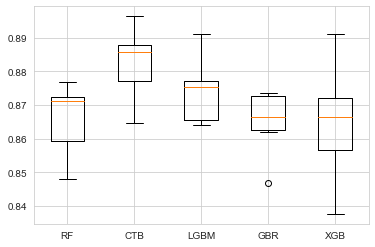

In [62]:
plt.boxplot(results_cv, labels=models.keys())
plt.show()

In [97]:
results_cv

[array([0.87753802, 0.87179634, 0.8622503 , 0.84902095, 0.88674455,
        0.86644082, 0.88488322, 0.84878805]),
 array([0.88619119, 0.90101844, 0.88698546, 0.87147149, 0.90162366,
        0.82748252, 0.89562075, 0.87917013]),
 array([0.87517706, 0.89120934, 0.8846816 , 0.86302468, 0.88642057,
        0.83775632, 0.86867913, 0.86174594]),
 array([0.8631251 , 0.87783401, 0.87087895, 0.83906908, 0.87699237,
        0.87728713, 0.88662305, 0.8459811 ]),
 array([0.87949638, 0.88586691, 0.87857675, 0.86690551, 0.87831777,
        0.84477974, 0.88998176, 0.84867279])]

## Grid Search CV

## CatBoost Regressor hyperparameters tuning

In [83]:
ctb = CatBoostRegressor()
param_ctb = {'n_estimators':[100,200,300], 'depth':list(range(4,9)), 'random_state': [42]}

In [84]:
grid_ctb = GridSearchCV(ctb, param_ctb, cv=10)
grid_ctb.fit(X_train, y_train)

Learning rate set to 0.410697
0:	learn: 287992.7735868	total: 2.33ms	remaining: 231ms
1:	learn: 238070.6519165	total: 4.48ms	remaining: 219ms
2:	learn: 204477.2563135	total: 6.61ms	remaining: 214ms
3:	learn: 183724.7260224	total: 8.66ms	remaining: 208ms
4:	learn: 170743.4621612	total: 10.5ms	remaining: 200ms
5:	learn: 163600.0192504	total: 12.4ms	remaining: 194ms
6:	learn: 157092.0002759	total: 14.4ms	remaining: 192ms
7:	learn: 151775.6005273	total: 16.5ms	remaining: 190ms
8:	learn: 147698.0686169	total: 18.5ms	remaining: 187ms
9:	learn: 145569.6864048	total: 20.6ms	remaining: 186ms
10:	learn: 143277.4171485	total: 22.4ms	remaining: 182ms
11:	learn: 140296.4878863	total: 24.3ms	remaining: 178ms
12:	learn: 139339.2718641	total: 26.2ms	remaining: 175ms
13:	learn: 137697.1673990	total: 28.3ms	remaining: 174ms
14:	learn: 136573.5615433	total: 30.3ms	remaining: 172ms
15:	learn: 136128.7459020	total: 32.1ms	remaining: 169ms
16:	learn: 135463.1396374	total: 34.2ms	remaining: 167ms
17:	learn: 

0:	learn: 284976.6750240	total: 2.27ms	remaining: 225ms
1:	learn: 233027.3942200	total: 4.41ms	remaining: 216ms
2:	learn: 197861.3306811	total: 6.54ms	remaining: 212ms
3:	learn: 177405.8099196	total: 8.75ms	remaining: 210ms
4:	learn: 162773.3531520	total: 10.9ms	remaining: 208ms
5:	learn: 154329.4756135	total: 12.7ms	remaining: 200ms
6:	learn: 149754.9093034	total: 14.4ms	remaining: 191ms
7:	learn: 144831.2723589	total: 16.1ms	remaining: 186ms
8:	learn: 141522.8281727	total: 17.9ms	remaining: 181ms
9:	learn: 138505.6740176	total: 20ms	remaining: 180ms
10:	learn: 136095.0758052	total: 22.1ms	remaining: 179ms
11:	learn: 135740.2305047	total: 23.9ms	remaining: 175ms
12:	learn: 134980.9444818	total: 25.7ms	remaining: 172ms
13:	learn: 133943.5310854	total: 27.5ms	remaining: 169ms
14:	learn: 133124.5257275	total: 29.2ms	remaining: 165ms
15:	learn: 132199.9525054	total: 30.9ms	remaining: 162ms
16:	learn: 130830.8457978	total: 32.6ms	remaining: 159ms
17:	learn: 129839.4092766	total: 34.4ms	rem

98:	learn: 101146.6711063	total: 175ms	remaining: 1.77ms
99:	learn: 100989.6304266	total: 178ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 290137.2383413	total: 2.15ms	remaining: 213ms
1:	learn: 238027.8916671	total: 4.1ms	remaining: 201ms
2:	learn: 202836.8526554	total: 5.99ms	remaining: 194ms
3:	learn: 181704.7001353	total: 7.95ms	remaining: 191ms
4:	learn: 167008.9386288	total: 9.99ms	remaining: 190ms
5:	learn: 158589.1742808	total: 11.9ms	remaining: 186ms
6:	learn: 150989.3691667	total: 14.1ms	remaining: 187ms
7:	learn: 147315.0498606	total: 16.2ms	remaining: 186ms
8:	learn: 144656.4711258	total: 18.2ms	remaining: 184ms
9:	learn: 143455.9119810	total: 20.3ms	remaining: 183ms
10:	learn: 141971.5976602	total: 22.1ms	remaining: 179ms
11:	learn: 140830.4270876	total: 23.9ms	remaining: 175ms
12:	learn: 138771.8199012	total: 25.8ms	remaining: 172ms
13:	learn: 137229.2324725	total: 27.8ms	remaining: 171ms
14:	learn: 134921.8155453	total: 30.6ms	remaining: 173ms
15:	learn: 1332

Learning rate set to 0.410697
0:	learn: 290726.8812501	total: 2.06ms	remaining: 204ms
1:	learn: 236088.0887921	total: 3.97ms	remaining: 194ms
2:	learn: 201079.4888531	total: 5.84ms	remaining: 189ms
3:	learn: 180708.2654276	total: 7.69ms	remaining: 185ms
4:	learn: 164533.6898583	total: 9.44ms	remaining: 179ms
5:	learn: 155911.0158433	total: 11.4ms	remaining: 178ms
6:	learn: 150136.3444206	total: 13.4ms	remaining: 177ms
7:	learn: 147232.7404142	total: 15.2ms	remaining: 175ms
8:	learn: 144527.7722496	total: 17.2ms	remaining: 174ms
9:	learn: 141833.6181940	total: 19.1ms	remaining: 172ms
10:	learn: 140643.7454974	total: 20.9ms	remaining: 169ms
11:	learn: 138894.8019483	total: 22.7ms	remaining: 166ms
12:	learn: 138157.2776191	total: 24.5ms	remaining: 164ms
13:	learn: 135839.7896355	total: 26.3ms	remaining: 162ms
14:	learn: 134573.7793744	total: 28.4ms	remaining: 161ms
15:	learn: 133825.1233967	total: 30.3ms	remaining: 159ms
16:	learn: 132693.1241741	total: 32.1ms	remaining: 157ms
17:	learn: 

0:	learn: 289087.1057814	total: 2.3ms	remaining: 227ms
1:	learn: 236556.5752226	total: 4.34ms	remaining: 213ms
2:	learn: 200631.3075989	total: 6.31ms	remaining: 204ms
3:	learn: 179304.6372132	total: 8.65ms	remaining: 208ms
4:	learn: 165705.9765622	total: 10.9ms	remaining: 207ms
5:	learn: 157618.3093701	total: 12.7ms	remaining: 199ms
6:	learn: 152852.2024026	total: 14.4ms	remaining: 192ms
7:	learn: 147991.4581589	total: 16.3ms	remaining: 187ms
8:	learn: 144180.1532490	total: 18.2ms	remaining: 184ms
9:	learn: 141719.8273513	total: 20.1ms	remaining: 181ms
10:	learn: 139857.0994976	total: 21.9ms	remaining: 177ms
11:	learn: 138785.8222041	total: 23.7ms	remaining: 173ms
12:	learn: 137094.1729074	total: 25.4ms	remaining: 170ms
13:	learn: 136034.3644933	total: 27.2ms	remaining: 167ms
14:	learn: 135005.6832732	total: 28.9ms	remaining: 164ms
15:	learn: 133503.2170340	total: 30.7ms	remaining: 161ms
16:	learn: 132718.0184526	total: 32.5ms	remaining: 159ms
17:	learn: 131352.8090536	total: 34.2ms	re

59:	learn: 108685.2181731	total: 108ms	remaining: 71.7ms
60:	learn: 108448.9637956	total: 110ms	remaining: 70.1ms
61:	learn: 108246.2218552	total: 112ms	remaining: 68.4ms
62:	learn: 107751.2866558	total: 114ms	remaining: 66.7ms
63:	learn: 107465.2447344	total: 116ms	remaining: 65.1ms
64:	learn: 107186.8750305	total: 118ms	remaining: 63.4ms
65:	learn: 106894.4034645	total: 120ms	remaining: 61.8ms
66:	learn: 106573.3255155	total: 122ms	remaining: 60ms
67:	learn: 106176.6589295	total: 124ms	remaining: 58.1ms
68:	learn: 105874.9135830	total: 125ms	remaining: 56.3ms
69:	learn: 105584.1597969	total: 127ms	remaining: 54.4ms
70:	learn: 105336.5638190	total: 129ms	remaining: 52.6ms
71:	learn: 105158.0458281	total: 131ms	remaining: 50.8ms
72:	learn: 104973.4786348	total: 132ms	remaining: 49ms
73:	learn: 104641.7364124	total: 134ms	remaining: 47.2ms
74:	learn: 104404.8868870	total: 136ms	remaining: 45.4ms
75:	learn: 104189.1376622	total: 138ms	remaining: 43.6ms
76:	learn: 104001.6348993	total: 14

185:	learn: 98174.9946425	total: 371ms	remaining: 27.9ms
186:	learn: 98068.6718741	total: 373ms	remaining: 26ms
187:	learn: 97976.6361862	total: 376ms	remaining: 24ms
188:	learn: 97877.3397171	total: 379ms	remaining: 22ms
189:	learn: 97827.7804357	total: 381ms	remaining: 20.1ms
190:	learn: 97802.3155770	total: 383ms	remaining: 18ms
191:	learn: 97752.7659632	total: 385ms	remaining: 16ms
192:	learn: 97698.9120293	total: 387ms	remaining: 14ms
193:	learn: 97622.5941993	total: 390ms	remaining: 12ms
194:	learn: 97583.6175384	total: 392ms	remaining: 10ms
195:	learn: 97570.4032243	total: 395ms	remaining: 8.05ms
196:	learn: 97487.6801776	total: 397ms	remaining: 6.04ms
197:	learn: 97381.8430114	total: 399ms	remaining: 4.03ms
198:	learn: 97351.1058373	total: 400ms	remaining: 2.01ms
199:	learn: 97346.9690951	total: 402ms	remaining: 0us
Learning rate set to 0.233767
0:	learn: 320875.6249461	total: 2.97ms	remaining: 592ms
1:	learn: 283805.0159672	total: 5.26ms	remaining: 521ms
2:	learn: 253576.87792

Learning rate set to 0.233767
0:	learn: 316369.0772518	total: 2.03ms	remaining: 404ms
1:	learn: 277562.6541920	total: 4.06ms	remaining: 402ms
2:	learn: 247483.7382642	total: 6.03ms	remaining: 396ms
3:	learn: 222393.0138512	total: 7.82ms	remaining: 383ms
4:	learn: 205818.3419420	total: 9.83ms	remaining: 383ms
5:	learn: 191967.2306587	total: 11.8ms	remaining: 383ms
6:	learn: 181030.6492987	total: 13.7ms	remaining: 377ms
7:	learn: 171700.8407833	total: 15.6ms	remaining: 375ms
8:	learn: 164149.5455553	total: 17.6ms	remaining: 374ms
9:	learn: 157844.1257311	total: 19.5ms	remaining: 371ms
10:	learn: 153847.7812238	total: 21.3ms	remaining: 367ms
11:	learn: 149770.8300105	total: 23.1ms	remaining: 362ms
12:	learn: 146751.9391784	total: 24.9ms	remaining: 358ms
13:	learn: 143877.4900900	total: 26.6ms	remaining: 353ms
14:	learn: 142550.3531759	total: 28.5ms	remaining: 351ms
15:	learn: 139930.4151851	total: 30.2ms	remaining: 348ms
16:	learn: 138222.8156340	total: 32ms	remaining: 345ms
17:	learn: 13

192:	learn: 97019.2169459	total: 350ms	remaining: 12.7ms
193:	learn: 96935.8624696	total: 353ms	remaining: 10.9ms
194:	learn: 96819.9846930	total: 355ms	remaining: 9.09ms
195:	learn: 96762.5966750	total: 357ms	remaining: 7.28ms
196:	learn: 96696.3328365	total: 359ms	remaining: 5.46ms
197:	learn: 96575.5717298	total: 361ms	remaining: 3.64ms
198:	learn: 96473.9547816	total: 363ms	remaining: 1.82ms
199:	learn: 96401.6150156	total: 364ms	remaining: 0us
Learning rate set to 0.233767
0:	learn: 319758.3396092	total: 2.22ms	remaining: 441ms
1:	learn: 280733.4321395	total: 4.37ms	remaining: 433ms
2:	learn: 250293.2671373	total: 6.03ms	remaining: 396ms
3:	learn: 225764.0957495	total: 7.9ms	remaining: 387ms
4:	learn: 208420.7270320	total: 9.68ms	remaining: 377ms
5:	learn: 195466.9531533	total: 11.5ms	remaining: 371ms
6:	learn: 184207.3281289	total: 13.2ms	remaining: 363ms
7:	learn: 174882.1945183	total: 15.1ms	remaining: 363ms
8:	learn: 168204.3709918	total: 17ms	remaining: 360ms
9:	learn: 162808

146:	learn: 103191.7954656	total: 264ms	remaining: 95.1ms
147:	learn: 103070.7414040	total: 266ms	remaining: 93.4ms
148:	learn: 102939.8566278	total: 268ms	remaining: 91.7ms
149:	learn: 102811.2760537	total: 270ms	remaining: 89.9ms
150:	learn: 102708.5438559	total: 272ms	remaining: 88.2ms
151:	learn: 102636.8427624	total: 274ms	remaining: 86.6ms
152:	learn: 102515.8984052	total: 276ms	remaining: 84.8ms
153:	learn: 102381.0734130	total: 278ms	remaining: 83ms
154:	learn: 102246.0843469	total: 279ms	remaining: 81.1ms
155:	learn: 102186.8709192	total: 281ms	remaining: 79.3ms
156:	learn: 101994.7739866	total: 283ms	remaining: 77.5ms
157:	learn: 101788.2732636	total: 285ms	remaining: 75.7ms
158:	learn: 101685.8932098	total: 286ms	remaining: 73.9ms
159:	learn: 101666.9591197	total: 288ms	remaining: 72ms
160:	learn: 101556.4499676	total: 290ms	remaining: 70.2ms
161:	learn: 101427.3170711	total: 292ms	remaining: 68.4ms
162:	learn: 101243.9844637	total: 293ms	remaining: 66.6ms
163:	learn: 101181

97:	learn: 109304.1980690	total: 178ms	remaining: 185ms
98:	learn: 109082.5511377	total: 180ms	remaining: 184ms
99:	learn: 108946.4843981	total: 182ms	remaining: 182ms
100:	learn: 108777.9820204	total: 184ms	remaining: 180ms
101:	learn: 108573.0508806	total: 186ms	remaining: 179ms
102:	learn: 108437.2670623	total: 188ms	remaining: 177ms
103:	learn: 108348.9030292	total: 190ms	remaining: 175ms
104:	learn: 108165.5367646	total: 192ms	remaining: 174ms
105:	learn: 108069.5575351	total: 193ms	remaining: 172ms
106:	learn: 107957.7166819	total: 195ms	remaining: 170ms
107:	learn: 107700.4739130	total: 197ms	remaining: 168ms
108:	learn: 107498.6376712	total: 198ms	remaining: 166ms
109:	learn: 107419.8198366	total: 200ms	remaining: 164ms
110:	learn: 107368.7118282	total: 202ms	remaining: 162ms
111:	learn: 107118.9063868	total: 204ms	remaining: 160ms
112:	learn: 107048.5429301	total: 205ms	remaining: 158ms
113:	learn: 106905.5143518	total: 207ms	remaining: 156ms
114:	learn: 106783.5333355	total: 

99:	learn: 107866.4798516	total: 183ms	remaining: 183ms
100:	learn: 107721.2009809	total: 185ms	remaining: 181ms
101:	learn: 107524.1619626	total: 187ms	remaining: 180ms
102:	learn: 107368.6605753	total: 189ms	remaining: 178ms
103:	learn: 107206.4540409	total: 192ms	remaining: 177ms
104:	learn: 107136.1017517	total: 194ms	remaining: 175ms
105:	learn: 106995.1556823	total: 196ms	remaining: 174ms
106:	learn: 106896.9746736	total: 198ms	remaining: 172ms
107:	learn: 106725.2225502	total: 200ms	remaining: 170ms
108:	learn: 106562.4335299	total: 201ms	remaining: 168ms
109:	learn: 106414.4430211	total: 203ms	remaining: 166ms
110:	learn: 106401.1124168	total: 205ms	remaining: 164ms
111:	learn: 106247.9086763	total: 206ms	remaining: 162ms
112:	learn: 106068.1824880	total: 208ms	remaining: 160ms
113:	learn: 105924.8624104	total: 210ms	remaining: 158ms
114:	learn: 105758.7731768	total: 212ms	remaining: 157ms
115:	learn: 105568.6216683	total: 214ms	remaining: 155ms
116:	learn: 105458.0221809	total

46:	learn: 121330.6293018	total: 85.6ms	remaining: 279ms
47:	learn: 120655.8215498	total: 87.9ms	remaining: 278ms
48:	learn: 120469.8819429	total: 90.1ms	remaining: 278ms
49:	learn: 120093.6847029	total: 92.4ms	remaining: 277ms
50:	learn: 119743.7956463	total: 94.6ms	remaining: 276ms
51:	learn: 119713.9845129	total: 96.5ms	remaining: 275ms
52:	learn: 119409.6509411	total: 98.5ms	remaining: 273ms
53:	learn: 119093.4873468	total: 100ms	remaining: 271ms
54:	learn: 118724.5844350	total: 102ms	remaining: 270ms
55:	learn: 118499.9160193	total: 104ms	remaining: 268ms
56:	learn: 118287.7998929	total: 106ms	remaining: 266ms
57:	learn: 118007.9803489	total: 108ms	remaining: 264ms
58:	learn: 117637.2847151	total: 110ms	remaining: 262ms
59:	learn: 117210.8576732	total: 112ms	remaining: 261ms
60:	learn: 117012.5788360	total: 113ms	remaining: 259ms
61:	learn: 116715.6010460	total: 115ms	remaining: 256ms
62:	learn: 116551.0001324	total: 117ms	remaining: 255ms
63:	learn: 116325.3149147	total: 119ms	re

0:	learn: 321945.3849441	total: 2.15ms	remaining: 427ms
1:	learn: 283537.3207289	total: 4.18ms	remaining: 414ms
2:	learn: 253751.7324693	total: 6.42ms	remaining: 421ms
3:	learn: 230367.0521810	total: 8.75ms	remaining: 429ms
4:	learn: 210767.1960604	total: 10.6ms	remaining: 415ms
5:	learn: 195247.1398146	total: 12.5ms	remaining: 403ms
6:	learn: 184370.6276024	total: 14.4ms	remaining: 396ms
7:	learn: 174790.8666286	total: 16.5ms	remaining: 396ms
8:	learn: 166830.6829998	total: 18.4ms	remaining: 392ms
9:	learn: 160929.7674856	total: 20.4ms	remaining: 387ms
10:	learn: 156229.6250256	total: 22.2ms	remaining: 382ms
11:	learn: 151911.2648449	total: 24.3ms	remaining: 380ms
12:	learn: 149368.6029598	total: 25.9ms	remaining: 373ms
13:	learn: 146322.5533647	total: 27.7ms	remaining: 368ms
14:	learn: 144027.5093018	total: 29.5ms	remaining: 364ms
15:	learn: 141962.7334787	total: 31.3ms	remaining: 360ms
16:	learn: 140816.9038794	total: 33ms	remaining: 355ms
17:	learn: 139422.6717277	total: 34.7ms	rem

179:	learn: 99022.2095512	total: 344ms	remaining: 38.2ms
180:	learn: 98952.0476347	total: 346ms	remaining: 36.3ms
181:	learn: 98884.3618276	total: 348ms	remaining: 34.4ms
182:	learn: 98694.3818716	total: 350ms	remaining: 32.5ms
183:	learn: 98616.6531801	total: 352ms	remaining: 30.6ms
184:	learn: 98557.0897308	total: 354ms	remaining: 28.7ms
185:	learn: 98417.2613142	total: 356ms	remaining: 26.8ms
186:	learn: 98300.1992508	total: 358ms	remaining: 24.9ms
187:	learn: 98199.6858895	total: 359ms	remaining: 22.9ms
188:	learn: 98124.6533017	total: 361ms	remaining: 21ms
189:	learn: 98063.7147876	total: 363ms	remaining: 19.1ms
190:	learn: 97991.3507349	total: 365ms	remaining: 17.2ms
191:	learn: 97915.5423804	total: 366ms	remaining: 15.3ms
192:	learn: 97819.3258135	total: 368ms	remaining: 13.4ms
193:	learn: 97743.1634977	total: 370ms	remaining: 11.4ms
194:	learn: 97653.8312482	total: 372ms	remaining: 9.53ms
195:	learn: 97524.3394645	total: 374ms	remaining: 7.62ms
196:	learn: 97426.1694286	total: 

138:	learn: 103196.3029617	total: 247ms	remaining: 108ms
139:	learn: 103020.7483514	total: 249ms	remaining: 107ms
140:	learn: 102935.3016689	total: 251ms	remaining: 105ms
141:	learn: 102854.3649931	total: 253ms	remaining: 103ms
142:	learn: 102713.9848584	total: 255ms	remaining: 102ms
143:	learn: 102528.5575140	total: 257ms	remaining: 99.9ms
144:	learn: 102353.2646704	total: 259ms	remaining: 98.1ms
145:	learn: 102207.8439080	total: 260ms	remaining: 96.3ms
146:	learn: 102136.4512918	total: 262ms	remaining: 94.5ms
147:	learn: 101960.7605098	total: 264ms	remaining: 92.7ms
148:	learn: 101826.3831293	total: 266ms	remaining: 90.9ms
149:	learn: 101731.8861189	total: 267ms	remaining: 89.1ms
150:	learn: 101648.3961953	total: 269ms	remaining: 87.3ms
151:	learn: 101595.5452111	total: 271ms	remaining: 85.5ms
152:	learn: 101474.0290666	total: 272ms	remaining: 83.7ms
153:	learn: 101335.8733050	total: 274ms	remaining: 81.8ms
154:	learn: 101213.0197208	total: 276ms	remaining: 80ms
155:	learn: 101110.94

90:	learn: 109849.6085852	total: 167ms	remaining: 200ms
91:	learn: 109718.5344411	total: 169ms	remaining: 198ms
92:	learn: 109534.8312659	total: 171ms	remaining: 196ms
93:	learn: 109308.3595827	total: 173ms	remaining: 195ms
94:	learn: 108996.0492190	total: 175ms	remaining: 194ms
95:	learn: 108781.3939532	total: 177ms	remaining: 192ms
96:	learn: 108611.0936328	total: 179ms	remaining: 190ms
97:	learn: 108478.6329296	total: 181ms	remaining: 189ms
98:	learn: 108334.3524465	total: 183ms	remaining: 187ms
99:	learn: 108186.8704836	total: 185ms	remaining: 185ms
100:	learn: 107981.4350158	total: 187ms	remaining: 183ms
101:	learn: 107838.7524003	total: 189ms	remaining: 181ms
102:	learn: 107717.9445765	total: 191ms	remaining: 180ms
103:	learn: 107581.4352268	total: 193ms	remaining: 178ms
104:	learn: 107510.5229009	total: 194ms	remaining: 176ms
105:	learn: 107353.5121457	total: 196ms	remaining: 174ms
106:	learn: 107209.4666944	total: 198ms	remaining: 172ms
107:	learn: 107059.0995932	total: 200ms	r

42:	learn: 127160.9836327	total: 76.9ms	remaining: 460ms
43:	learn: 126603.8864511	total: 79ms	remaining: 460ms
44:	learn: 126198.8233150	total: 80.9ms	remaining: 459ms
45:	learn: 125876.6741351	total: 83ms	remaining: 458ms
46:	learn: 125425.5906471	total: 85.2ms	remaining: 459ms
47:	learn: 124966.1938857	total: 87.3ms	remaining: 458ms
48:	learn: 124679.8163948	total: 89.3ms	remaining: 457ms
49:	learn: 124412.4753482	total: 91.3ms	remaining: 457ms
50:	learn: 124198.1743952	total: 93.3ms	remaining: 455ms
51:	learn: 123859.6980765	total: 95.2ms	remaining: 454ms
52:	learn: 123537.9130355	total: 97.3ms	remaining: 453ms
53:	learn: 123130.0857009	total: 99.1ms	remaining: 452ms
54:	learn: 122990.2690657	total: 101ms	remaining: 449ms
55:	learn: 122848.8582852	total: 103ms	remaining: 447ms
56:	learn: 122618.5580846	total: 104ms	remaining: 444ms
57:	learn: 122387.3164227	total: 106ms	remaining: 442ms
58:	learn: 122114.9336398	total: 108ms	remaining: 440ms
59:	learn: 121778.7205606	total: 109ms	r

237:	learn: 98538.5770559	total: 432ms	remaining: 112ms
238:	learn: 98409.6387138	total: 434ms	remaining: 111ms
239:	learn: 98350.2928882	total: 436ms	remaining: 109ms
240:	learn: 98297.9111096	total: 437ms	remaining: 107ms
241:	learn: 98266.0442191	total: 439ms	remaining: 105ms
242:	learn: 98178.1022413	total: 441ms	remaining: 104ms
243:	learn: 98102.6664583	total: 443ms	remaining: 102ms
244:	learn: 98008.5251929	total: 445ms	remaining: 99.9ms
245:	learn: 97937.4584847	total: 447ms	remaining: 98.1ms
246:	learn: 97834.4038746	total: 449ms	remaining: 96.3ms
247:	learn: 97780.4946372	total: 450ms	remaining: 94.4ms
248:	learn: 97742.1588251	total: 452ms	remaining: 92.6ms
249:	learn: 97699.4936487	total: 454ms	remaining: 90.8ms
250:	learn: 97634.3359370	total: 456ms	remaining: 88.9ms
251:	learn: 97572.1127589	total: 457ms	remaining: 87.1ms
252:	learn: 97504.7703702	total: 459ms	remaining: 85.3ms
253:	learn: 97421.7298002	total: 461ms	remaining: 83.5ms
254:	learn: 97372.8671935	total: 463ms

104:	learn: 113299.2926355	total: 187ms	remaining: 346ms
105:	learn: 113148.4894091	total: 189ms	remaining: 345ms
106:	learn: 113033.5173430	total: 191ms	remaining: 344ms
107:	learn: 112856.9525375	total: 193ms	remaining: 342ms
108:	learn: 112745.3642727	total: 195ms	remaining: 341ms
109:	learn: 112630.7513130	total: 197ms	remaining: 340ms
110:	learn: 112470.9789881	total: 199ms	remaining: 338ms
111:	learn: 112292.9379005	total: 201ms	remaining: 337ms
112:	learn: 112118.9141813	total: 202ms	remaining: 335ms
113:	learn: 111967.7564216	total: 204ms	remaining: 333ms
114:	learn: 111760.3191534	total: 206ms	remaining: 331ms
115:	learn: 111594.8172403	total: 208ms	remaining: 329ms
116:	learn: 111474.6095991	total: 209ms	remaining: 328ms
117:	learn: 111363.9650107	total: 211ms	remaining: 326ms
118:	learn: 111328.2547584	total: 213ms	remaining: 324ms
119:	learn: 111188.0157933	total: 215ms	remaining: 322ms
120:	learn: 111117.0742020	total: 217ms	remaining: 320ms
121:	learn: 110948.2984887	tota

Learning rate set to 0.168121
0:	learn: 329100.2403193	total: 2.22ms	remaining: 664ms
1:	learn: 298193.4761819	total: 4.54ms	remaining: 677ms
2:	learn: 273434.9514309	total: 6.54ms	remaining: 648ms
3:	learn: 251937.3979680	total: 8.55ms	remaining: 633ms
4:	learn: 234065.4272304	total: 10.5ms	remaining: 617ms
5:	learn: 220257.3121023	total: 12.4ms	remaining: 608ms
6:	learn: 207752.2862870	total: 14.4ms	remaining: 604ms
7:	learn: 197761.5548042	total: 16.5ms	remaining: 602ms
8:	learn: 189232.9543177	total: 18.4ms	remaining: 596ms
9:	learn: 181564.8189502	total: 20.5ms	remaining: 594ms
10:	learn: 175070.2418631	total: 22.5ms	remaining: 592ms
11:	learn: 169895.4114830	total: 24.5ms	remaining: 589ms
12:	learn: 165461.6691902	total: 26.5ms	remaining: 586ms
13:	learn: 160564.5272665	total: 28.6ms	remaining: 583ms
14:	learn: 156903.9373322	total: 30.5ms	remaining: 580ms
15:	learn: 153721.4139839	total: 32.3ms	remaining: 572ms
16:	learn: 150646.5741153	total: 34.1ms	remaining: 567ms
17:	learn: 

186:	learn: 103023.6496393	total: 342ms	remaining: 206ms
187:	learn: 102865.1786296	total: 344ms	remaining: 205ms
188:	learn: 102737.1992998	total: 346ms	remaining: 203ms
189:	learn: 102671.9209249	total: 347ms	remaining: 201ms
190:	learn: 102612.9659674	total: 349ms	remaining: 199ms
191:	learn: 102532.5327299	total: 351ms	remaining: 198ms
192:	learn: 102408.2391354	total: 353ms	remaining: 196ms
193:	learn: 102285.9915438	total: 355ms	remaining: 194ms
194:	learn: 102146.1209508	total: 357ms	remaining: 192ms
195:	learn: 102111.6886189	total: 359ms	remaining: 190ms
196:	learn: 102015.4839424	total: 360ms	remaining: 188ms
197:	learn: 101949.9030051	total: 362ms	remaining: 187ms
198:	learn: 101814.4890519	total: 364ms	remaining: 185ms
199:	learn: 101750.6586865	total: 366ms	remaining: 183ms
200:	learn: 101648.6640257	total: 367ms	remaining: 181ms
201:	learn: 101545.6880599	total: 369ms	remaining: 179ms
202:	learn: 101514.9471899	total: 371ms	remaining: 177ms
203:	learn: 101400.2699684	tota

33:	learn: 132808.4845992	total: 64.2ms	remaining: 503ms
34:	learn: 132286.4372042	total: 66.2ms	remaining: 501ms
35:	learn: 131868.7326023	total: 68ms	remaining: 499ms
36:	learn: 131402.8274363	total: 70ms	remaining: 497ms
37:	learn: 130493.2748657	total: 72.1ms	remaining: 497ms
38:	learn: 129763.6321323	total: 74.2ms	remaining: 496ms
39:	learn: 129351.2496867	total: 76.1ms	remaining: 495ms
40:	learn: 128838.7124680	total: 77.9ms	remaining: 492ms
41:	learn: 128499.0645759	total: 79.7ms	remaining: 490ms
42:	learn: 128157.8730364	total: 81.6ms	remaining: 488ms
43:	learn: 127841.1610089	total: 83.8ms	remaining: 487ms
44:	learn: 127549.1763705	total: 85.7ms	remaining: 486ms
45:	learn: 127147.8152961	total: 87.8ms	remaining: 485ms
46:	learn: 126810.3335703	total: 89.6ms	remaining: 482ms
47:	learn: 126304.9081377	total: 91.6ms	remaining: 481ms
48:	learn: 126081.7685002	total: 93.4ms	remaining: 478ms
49:	learn: 125780.3824437	total: 95.5ms	remaining: 477ms
50:	learn: 125532.1500072	total: 97

228:	learn: 100561.3462108	total: 421ms	remaining: 131ms
229:	learn: 100488.1457202	total: 423ms	remaining: 129ms
230:	learn: 100403.4885389	total: 426ms	remaining: 127ms
231:	learn: 100270.1540449	total: 428ms	remaining: 125ms
232:	learn: 100194.8101985	total: 430ms	remaining: 124ms
233:	learn: 99982.1280319	total: 432ms	remaining: 122ms
234:	learn: 99930.7340869	total: 434ms	remaining: 120ms
235:	learn: 99776.9374436	total: 436ms	remaining: 118ms
236:	learn: 99687.2583665	total: 437ms	remaining: 116ms
237:	learn: 99645.8165683	total: 439ms	remaining: 114ms
238:	learn: 99585.1824905	total: 441ms	remaining: 113ms
239:	learn: 99516.5618680	total: 443ms	remaining: 111ms
240:	learn: 99433.9216467	total: 444ms	remaining: 109ms
241:	learn: 99282.9075192	total: 446ms	remaining: 107ms
242:	learn: 99224.9322318	total: 448ms	remaining: 105ms
243:	learn: 99201.4369426	total: 450ms	remaining: 103ms
244:	learn: 99106.1172342	total: 451ms	remaining: 101ms
245:	learn: 99001.5190591	total: 453ms	rema

91:	learn: 115383.7722895	total: 170ms	remaining: 384ms
92:	learn: 115246.2083022	total: 172ms	remaining: 383ms
93:	learn: 115009.6413041	total: 174ms	remaining: 381ms
94:	learn: 114869.1636895	total: 176ms	remaining: 379ms
95:	learn: 114720.4391375	total: 178ms	remaining: 378ms
96:	learn: 114613.2510483	total: 180ms	remaining: 377ms
97:	learn: 114293.1936809	total: 182ms	remaining: 375ms
98:	learn: 114145.6407848	total: 184ms	remaining: 373ms
99:	learn: 113989.3880688	total: 186ms	remaining: 371ms
100:	learn: 113856.0863384	total: 188ms	remaining: 370ms
101:	learn: 113647.6670700	total: 190ms	remaining: 368ms
102:	learn: 113491.1003306	total: 191ms	remaining: 366ms
103:	learn: 113345.8325670	total: 193ms	remaining: 364ms
104:	learn: 113144.1056950	total: 195ms	remaining: 362ms
105:	learn: 112978.1477316	total: 197ms	remaining: 360ms
106:	learn: 112875.7093948	total: 199ms	remaining: 358ms
107:	learn: 112767.6685929	total: 200ms	remaining: 356ms
108:	learn: 112609.4436487	total: 202ms	

286:	learn: 95702.6141239	total: 520ms	remaining: 23.5ms
287:	learn: 95654.2199238	total: 522ms	remaining: 21.7ms
288:	learn: 95600.3054047	total: 524ms	remaining: 19.9ms
289:	learn: 95574.9378185	total: 526ms	remaining: 18.1ms
290:	learn: 95547.0386292	total: 527ms	remaining: 16.3ms
291:	learn: 95493.8547694	total: 530ms	remaining: 14.5ms
292:	learn: 95457.6898832	total: 532ms	remaining: 12.7ms
293:	learn: 95416.1361307	total: 533ms	remaining: 10.9ms
294:	learn: 95397.5528313	total: 535ms	remaining: 9.07ms
295:	learn: 95351.3935429	total: 537ms	remaining: 7.25ms
296:	learn: 95284.0090909	total: 539ms	remaining: 5.44ms
297:	learn: 95242.2207670	total: 541ms	remaining: 3.63ms
298:	learn: 95161.3169476	total: 542ms	remaining: 1.81ms
299:	learn: 95104.1510711	total: 544ms	remaining: 0us
Learning rate set to 0.168121
0:	learn: 330741.2628301	total: 1.98ms	remaining: 593ms
1:	learn: 299480.5865454	total: 4.31ms	remaining: 642ms
2:	learn: 274598.4910648	total: 6.17ms	remaining: 611ms
3:	lear

132:	learn: 109161.4741380	total: 243ms	remaining: 305ms
133:	learn: 109052.2340586	total: 245ms	remaining: 303ms
134:	learn: 108947.3216972	total: 247ms	remaining: 302ms
135:	learn: 108875.0859477	total: 249ms	remaining: 300ms
136:	learn: 108744.2186426	total: 251ms	remaining: 299ms
137:	learn: 108627.1782780	total: 253ms	remaining: 297ms
138:	learn: 108510.4849902	total: 255ms	remaining: 295ms
139:	learn: 108428.3177728	total: 257ms	remaining: 294ms
140:	learn: 108272.4722551	total: 259ms	remaining: 292ms
141:	learn: 108163.7094847	total: 260ms	remaining: 290ms
142:	learn: 107969.5210790	total: 262ms	remaining: 288ms
143:	learn: 107798.5201224	total: 264ms	remaining: 286ms
144:	learn: 107753.0663052	total: 265ms	remaining: 284ms
145:	learn: 107670.0344491	total: 267ms	remaining: 282ms
146:	learn: 107532.8788658	total: 269ms	remaining: 280ms
147:	learn: 107397.4094096	total: 271ms	remaining: 278ms
148:	learn: 107293.9064268	total: 273ms	remaining: 276ms
149:	learn: 107239.3300332	tota

Learning rate set to 0.168121
0:	learn: 335336.6567520	total: 2.02ms	remaining: 603ms
1:	learn: 305287.0784090	total: 4.08ms	remaining: 607ms
2:	learn: 280809.2528683	total: 6.37ms	remaining: 631ms
3:	learn: 259324.7917663	total: 8.6ms	remaining: 636ms
4:	learn: 239828.7814419	total: 10.6ms	remaining: 625ms
5:	learn: 224842.9394697	total: 12.6ms	remaining: 616ms
6:	learn: 212616.9734126	total: 14.5ms	remaining: 607ms
7:	learn: 201216.0391377	total: 16.8ms	remaining: 613ms
8:	learn: 191746.2153483	total: 19.1ms	remaining: 618ms
9:	learn: 183704.2364668	total: 21.3ms	remaining: 618ms
10:	learn: 177240.5010893	total: 23.3ms	remaining: 613ms
11:	learn: 171010.8840143	total: 25.3ms	remaining: 606ms
12:	learn: 166569.3006470	total: 26.9ms	remaining: 594ms
13:	learn: 162317.8506979	total: 29ms	remaining: 591ms
14:	learn: 158314.8867439	total: 31ms	remaining: 588ms
15:	learn: 154795.9599981	total: 32.7ms	remaining: 581ms
16:	learn: 151979.1224354	total: 34.7ms	remaining: 578ms
17:	learn: 15001

183:	learn: 102982.1247572	total: 347ms	remaining: 219ms
184:	learn: 102894.0182801	total: 349ms	remaining: 217ms
185:	learn: 102756.6637574	total: 351ms	remaining: 215ms
186:	learn: 102661.5136698	total: 353ms	remaining: 214ms
187:	learn: 102572.8201396	total: 355ms	remaining: 212ms
188:	learn: 102445.9398797	total: 357ms	remaining: 210ms
189:	learn: 102389.2357149	total: 359ms	remaining: 208ms
190:	learn: 102295.7225438	total: 361ms	remaining: 206ms
191:	learn: 102221.9012625	total: 363ms	remaining: 204ms
192:	learn: 102130.7775637	total: 365ms	remaining: 202ms
193:	learn: 102029.0322626	total: 367ms	remaining: 200ms
194:	learn: 101920.5610808	total: 368ms	remaining: 198ms
195:	learn: 101826.2110227	total: 370ms	remaining: 196ms
196:	learn: 101783.4223180	total: 372ms	remaining: 194ms
197:	learn: 101705.6793084	total: 374ms	remaining: 192ms
198:	learn: 101596.8918893	total: 375ms	remaining: 191ms
199:	learn: 101551.3753872	total: 377ms	remaining: 189ms
200:	learn: 101487.4086948	tota

31:	learn: 132163.9430343	total: 62.2ms	remaining: 521ms
32:	learn: 131618.1492267	total: 64.4ms	remaining: 521ms
33:	learn: 131257.2299588	total: 66.4ms	remaining: 519ms
34:	learn: 130597.0558147	total: 68.5ms	remaining: 518ms
35:	learn: 130063.9728649	total: 70.7ms	remaining: 518ms
36:	learn: 129653.1554711	total: 72.5ms	remaining: 515ms
37:	learn: 129358.7166679	total: 74.4ms	remaining: 513ms
38:	learn: 128760.0735407	total: 76.3ms	remaining: 510ms
39:	learn: 128326.2715892	total: 78.1ms	remaining: 508ms
40:	learn: 128105.1893639	total: 79.8ms	remaining: 504ms
41:	learn: 127831.8691302	total: 81.4ms	remaining: 500ms
42:	learn: 127533.9765354	total: 83.2ms	remaining: 497ms
43:	learn: 126958.5567024	total: 84.9ms	remaining: 494ms
44:	learn: 126633.7722410	total: 86.5ms	remaining: 490ms
45:	learn: 126305.9227657	total: 88.3ms	remaining: 487ms
46:	learn: 126058.5458052	total: 90ms	remaining: 485ms
47:	learn: 125824.8860084	total: 91.8ms	remaining: 482ms
48:	learn: 125456.0251030	total: 

230:	learn: 100138.0054564	total: 412ms	remaining: 123ms
231:	learn: 100045.4723264	total: 415ms	remaining: 121ms
232:	learn: 99969.1297903	total: 417ms	remaining: 120ms
233:	learn: 99895.9872989	total: 419ms	remaining: 118ms
234:	learn: 99824.2392198	total: 421ms	remaining: 116ms
235:	learn: 99747.0285278	total: 423ms	remaining: 115ms
236:	learn: 99699.3504792	total: 425ms	remaining: 113ms
237:	learn: 99595.9037794	total: 426ms	remaining: 111ms
238:	learn: 99521.8661124	total: 428ms	remaining: 109ms
239:	learn: 99458.9084865	total: 430ms	remaining: 107ms
240:	learn: 99409.5390624	total: 432ms	remaining: 106ms
241:	learn: 99320.4464863	total: 434ms	remaining: 104ms
242:	learn: 99254.6147884	total: 436ms	remaining: 102ms
243:	learn: 99160.5770000	total: 438ms	remaining: 101ms
244:	learn: 99096.8894749	total: 440ms	remaining: 98.8ms
245:	learn: 99040.4735838	total: 442ms	remaining: 97ms
246:	learn: 98991.7461829	total: 444ms	remaining: 95.2ms
247:	learn: 98936.6652509	total: 446ms	remain

79:	learn: 117706.3470283	total: 184ms	remaining: 507ms
80:	learn: 117484.6618285	total: 187ms	remaining: 504ms
81:	learn: 117350.5518402	total: 189ms	remaining: 501ms
82:	learn: 117166.9006552	total: 191ms	remaining: 499ms
83:	learn: 116896.5447737	total: 194ms	remaining: 498ms
84:	learn: 116732.5734056	total: 196ms	remaining: 495ms
85:	learn: 116527.9440475	total: 198ms	remaining: 492ms
86:	learn: 116315.3988637	total: 200ms	remaining: 489ms
87:	learn: 116050.6326424	total: 202ms	remaining: 487ms
88:	learn: 115838.0663694	total: 204ms	remaining: 484ms
89:	learn: 115621.0658732	total: 206ms	remaining: 481ms
90:	learn: 115383.2159263	total: 208ms	remaining: 478ms
91:	learn: 115225.3428156	total: 210ms	remaining: 474ms
92:	learn: 115126.2400586	total: 212ms	remaining: 471ms
93:	learn: 114994.6970636	total: 214ms	remaining: 468ms
94:	learn: 114830.4564693	total: 215ms	remaining: 465ms
95:	learn: 114700.3769767	total: 217ms	remaining: 462ms
96:	learn: 114480.0022068	total: 219ms	remaining

264:	learn: 97768.7392190	total: 536ms	remaining: 70.7ms
265:	learn: 97751.1292792	total: 538ms	remaining: 68.7ms
266:	learn: 97639.3111681	total: 540ms	remaining: 66.7ms
267:	learn: 97571.2636295	total: 541ms	remaining: 64.6ms
268:	learn: 97515.4251224	total: 544ms	remaining: 62.7ms
269:	learn: 97454.3648135	total: 546ms	remaining: 60.7ms
270:	learn: 97377.3637341	total: 548ms	remaining: 58.7ms
271:	learn: 97292.4081872	total: 550ms	remaining: 56.7ms
272:	learn: 97222.9802802	total: 552ms	remaining: 54.6ms
273:	learn: 97155.5092832	total: 554ms	remaining: 52.6ms
274:	learn: 97055.3756775	total: 556ms	remaining: 50.5ms
275:	learn: 97028.0542570	total: 557ms	remaining: 48.5ms
276:	learn: 96974.2233900	total: 559ms	remaining: 46.4ms
277:	learn: 96856.0187571	total: 561ms	remaining: 44.4ms
278:	learn: 96797.0633840	total: 563ms	remaining: 42.4ms
279:	learn: 96734.9908241	total: 565ms	remaining: 40.4ms
280:	learn: 96661.3428937	total: 567ms	remaining: 38.4ms
281:	learn: 96593.9442499	total

194:	learn: 102140.8401959	total: 368ms	remaining: 198ms
195:	learn: 102057.3230892	total: 370ms	remaining: 196ms
196:	learn: 101959.5428135	total: 372ms	remaining: 195ms
197:	learn: 101833.7061775	total: 374ms	remaining: 193ms
198:	learn: 101828.0631714	total: 376ms	remaining: 191ms
199:	learn: 101740.7201544	total: 378ms	remaining: 189ms
200:	learn: 101734.9277365	total: 381ms	remaining: 187ms
201:	learn: 101713.2038482	total: 383ms	remaining: 186ms
202:	learn: 101627.2174492	total: 385ms	remaining: 184ms
203:	learn: 101618.8563007	total: 386ms	remaining: 182ms
204:	learn: 101560.9624657	total: 388ms	remaining: 180ms
205:	learn: 101553.3850835	total: 390ms	remaining: 178ms
206:	learn: 101485.8253607	total: 392ms	remaining: 176ms
207:	learn: 101401.5944745	total: 394ms	remaining: 174ms
208:	learn: 101340.6111960	total: 395ms	remaining: 172ms
209:	learn: 101184.6492002	total: 397ms	remaining: 170ms
210:	learn: 101087.4268284	total: 399ms	remaining: 168ms
211:	learn: 101025.8220313	tota

43:	learn: 109064.1028932	total: 93.1ms	remaining: 119ms
44:	learn: 108633.2432697	total: 95.5ms	remaining: 117ms
45:	learn: 108411.6993062	total: 97.6ms	remaining: 115ms
46:	learn: 108109.7799410	total: 100ms	remaining: 113ms
47:	learn: 107604.2223929	total: 102ms	remaining: 111ms
48:	learn: 107198.0114242	total: 105ms	remaining: 109ms
49:	learn: 106705.4334584	total: 107ms	remaining: 107ms
50:	learn: 106002.2385326	total: 109ms	remaining: 105ms
51:	learn: 105471.5022543	total: 111ms	remaining: 102ms
52:	learn: 105179.6244282	total: 113ms	remaining: 100ms
53:	learn: 104749.3193739	total: 115ms	remaining: 97.9ms
54:	learn: 104445.5055047	total: 117ms	remaining: 95.6ms
55:	learn: 104146.0594843	total: 119ms	remaining: 93.5ms
56:	learn: 103840.1269663	total: 121ms	remaining: 91.4ms
57:	learn: 103452.8151416	total: 123ms	remaining: 89.3ms
58:	learn: 103199.0937547	total: 125ms	remaining: 87.1ms
59:	learn: 102910.7765790	total: 127ms	remaining: 84.9ms
60:	learn: 102582.0710299	total: 129ms

25:	learn: 118535.2461447	total: 58.6ms	remaining: 167ms
26:	learn: 117408.4414579	total: 61ms	remaining: 165ms
27:	learn: 116677.3575784	total: 63.2ms	remaining: 163ms
28:	learn: 115889.0338887	total: 65.4ms	remaining: 160ms
29:	learn: 114954.3114098	total: 67.7ms	remaining: 158ms
30:	learn: 114756.4907432	total: 69.7ms	remaining: 155ms
31:	learn: 113942.8136964	total: 71.8ms	remaining: 153ms
32:	learn: 113339.3076268	total: 74.3ms	remaining: 151ms
33:	learn: 112833.3572806	total: 77ms	remaining: 149ms
34:	learn: 112221.9781916	total: 79.3ms	remaining: 147ms
35:	learn: 111681.7455493	total: 81.4ms	remaining: 145ms
36:	learn: 110943.6172025	total: 83.6ms	remaining: 142ms
37:	learn: 110459.7893215	total: 85.7ms	remaining: 140ms
38:	learn: 109878.8390957	total: 87.8ms	remaining: 137ms
39:	learn: 109417.3843437	total: 89.8ms	remaining: 135ms
40:	learn: 108741.5459416	total: 92ms	remaining: 132ms
41:	learn: 108703.3394681	total: 94ms	remaining: 130ms
42:	learn: 108409.1249336	total: 96ms	r

83:	learn: 96939.0923650	total: 179ms	remaining: 34ms
84:	learn: 96704.1372413	total: 181ms	remaining: 32ms
85:	learn: 96527.7268175	total: 184ms	remaining: 29.9ms
86:	learn: 96403.0862977	total: 186ms	remaining: 27.8ms
87:	learn: 96223.1197779	total: 189ms	remaining: 25.7ms
88:	learn: 95978.7849296	total: 191ms	remaining: 23.6ms
89:	learn: 95876.8476005	total: 193ms	remaining: 21.5ms
90:	learn: 95550.4171385	total: 196ms	remaining: 19.4ms
91:	learn: 95346.1627253	total: 198ms	remaining: 17.2ms
92:	learn: 95153.3167186	total: 200ms	remaining: 15.1ms
93:	learn: 94743.2160445	total: 203ms	remaining: 12.9ms
94:	learn: 94573.3844196	total: 205ms	remaining: 10.8ms
95:	learn: 94495.1883113	total: 207ms	remaining: 8.63ms
96:	learn: 94387.3608068	total: 209ms	remaining: 6.46ms
97:	learn: 94091.5434929	total: 212ms	remaining: 4.32ms
98:	learn: 93942.6857672	total: 214ms	remaining: 2.16ms
99:	learn: 93820.5374000	total: 216ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 280372.6110759	

79:	learn: 98106.8481070	total: 173ms	remaining: 43.2ms
80:	learn: 97818.4214741	total: 175ms	remaining: 41.1ms
81:	learn: 97503.9542641	total: 178ms	remaining: 39ms
82:	learn: 97172.5817279	total: 180ms	remaining: 36.9ms
83:	learn: 96791.5421055	total: 183ms	remaining: 34.8ms
84:	learn: 96479.4294265	total: 185ms	remaining: 32.7ms
85:	learn: 96244.4315536	total: 188ms	remaining: 30.5ms
86:	learn: 95957.0534933	total: 190ms	remaining: 28.3ms
87:	learn: 95756.1234439	total: 192ms	remaining: 26.2ms
88:	learn: 95446.6630064	total: 194ms	remaining: 24ms
89:	learn: 95160.5124415	total: 196ms	remaining: 21.8ms
90:	learn: 94966.1193088	total: 198ms	remaining: 19.6ms
91:	learn: 94766.8997864	total: 201ms	remaining: 17.5ms
92:	learn: 94548.3241648	total: 203ms	remaining: 15.3ms
93:	learn: 94381.5832711	total: 205ms	remaining: 13.1ms
94:	learn: 94257.1666818	total: 207ms	remaining: 10.9ms
95:	learn: 94155.1889971	total: 209ms	remaining: 8.7ms
96:	learn: 93867.4323467	total: 211ms	remaining: 6.51

84:	learn: 97381.4542963	total: 177ms	remaining: 31.2ms
85:	learn: 97158.6229901	total: 179ms	remaining: 29.2ms
86:	learn: 96856.8276985	total: 182ms	remaining: 27.1ms
87:	learn: 96570.3015869	total: 184ms	remaining: 25.1ms
88:	learn: 96294.0890515	total: 186ms	remaining: 23ms
89:	learn: 96098.8722860	total: 189ms	remaining: 21ms
90:	learn: 95789.7066920	total: 191ms	remaining: 18.9ms
91:	learn: 95684.7219801	total: 193ms	remaining: 16.8ms
92:	learn: 95446.3342273	total: 195ms	remaining: 14.7ms
93:	learn: 95271.9864113	total: 197ms	remaining: 12.6ms
94:	learn: 95089.8188415	total: 199ms	remaining: 10.5ms
95:	learn: 95008.2832541	total: 201ms	remaining: 8.39ms
96:	learn: 94721.6426389	total: 203ms	remaining: 6.29ms
97:	learn: 94472.8439145	total: 205ms	remaining: 4.19ms
98:	learn: 94322.8709906	total: 207ms	remaining: 2.09ms
99:	learn: 94170.1586324	total: 209ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 279703.7643333	total: 2.28ms	remaining: 226ms
1:	learn: 227467.4285995	

73:	learn: 97553.4784308	total: 160ms	remaining: 56.2ms
74:	learn: 97373.8852886	total: 162ms	remaining: 54.2ms
75:	learn: 97116.0712882	total: 165ms	remaining: 52ms
76:	learn: 96877.3942337	total: 167ms	remaining: 49.9ms
77:	learn: 96516.1512271	total: 170ms	remaining: 47.9ms
78:	learn: 96196.1290704	total: 172ms	remaining: 45.7ms
79:	learn: 95948.0264610	total: 174ms	remaining: 43.6ms
80:	learn: 95635.9261707	total: 177ms	remaining: 41.4ms
81:	learn: 95456.1046713	total: 179ms	remaining: 39.3ms
82:	learn: 95325.8422108	total: 181ms	remaining: 37ms
83:	learn: 95124.3547544	total: 183ms	remaining: 34.8ms
84:	learn: 94832.5120981	total: 185ms	remaining: 32.6ms
85:	learn: 94625.0698789	total: 187ms	remaining: 30.5ms
86:	learn: 94351.1831539	total: 189ms	remaining: 28.3ms
87:	learn: 94138.2145117	total: 191ms	remaining: 26.1ms
88:	learn: 94120.3184847	total: 193ms	remaining: 23.9ms
89:	learn: 93965.1705466	total: 196ms	remaining: 21.8ms
90:	learn: 93767.6882632	total: 198ms	remaining: 19.

164:	learn: 93095.2281626	total: 398ms	remaining: 84.4ms
165:	learn: 92996.3239080	total: 402ms	remaining: 82.3ms
166:	learn: 92911.0560209	total: 405ms	remaining: 80ms
167:	learn: 92756.6610058	total: 408ms	remaining: 77.8ms
168:	learn: 92632.8590936	total: 411ms	remaining: 75.5ms
169:	learn: 92521.1219156	total: 415ms	remaining: 73.2ms
170:	learn: 92418.4842972	total: 418ms	remaining: 70.9ms
171:	learn: 92295.7281479	total: 421ms	remaining: 68.5ms
172:	learn: 92135.4020600	total: 424ms	remaining: 66.1ms
173:	learn: 91973.5718925	total: 427ms	remaining: 63.7ms
174:	learn: 91836.7312677	total: 429ms	remaining: 61.3ms
175:	learn: 91722.7868306	total: 432ms	remaining: 58.9ms
176:	learn: 91623.0128809	total: 435ms	remaining: 56.5ms
177:	learn: 91524.0921808	total: 437ms	remaining: 54.1ms
178:	learn: 91422.1794864	total: 440ms	remaining: 51.6ms
179:	learn: 91317.2752664	total: 443ms	remaining: 49.2ms
180:	learn: 91163.0558667	total: 446ms	remaining: 46.8ms
181:	learn: 91088.4773214	total: 

109:	learn: 100575.6446485	total: 344ms	remaining: 282ms
110:	learn: 100440.0359415	total: 348ms	remaining: 279ms
111:	learn: 100313.0952996	total: 352ms	remaining: 277ms
112:	learn: 100270.1751403	total: 356ms	remaining: 274ms
113:	learn: 100207.1736296	total: 359ms	remaining: 271ms
114:	learn: 100052.8798020	total: 363ms	remaining: 268ms
115:	learn: 99748.6557390	total: 367ms	remaining: 265ms
116:	learn: 99601.5867634	total: 370ms	remaining: 262ms
117:	learn: 99439.0802349	total: 374ms	remaining: 260ms
118:	learn: 99217.3661821	total: 377ms	remaining: 257ms
119:	learn: 99062.1821860	total: 381ms	remaining: 254ms
120:	learn: 98909.7422204	total: 384ms	remaining: 251ms
121:	learn: 98731.5565093	total: 388ms	remaining: 248ms
122:	learn: 98623.1525129	total: 391ms	remaining: 245ms
123:	learn: 98439.8600085	total: 395ms	remaining: 242ms
124:	learn: 98341.7972865	total: 398ms	remaining: 239ms
125:	learn: 98272.9639942	total: 402ms	remaining: 236ms
126:	learn: 98111.9586422	total: 405ms	rem

99:	learn: 101403.3130933	total: 349ms	remaining: 349ms
100:	learn: 101128.2595575	total: 352ms	remaining: 345ms
101:	learn: 100971.2275714	total: 356ms	remaining: 342ms
102:	learn: 100781.9051447	total: 360ms	remaining: 339ms
103:	learn: 100570.4836456	total: 365ms	remaining: 337ms
104:	learn: 100316.9378243	total: 368ms	remaining: 333ms
105:	learn: 100229.1480537	total: 372ms	remaining: 330ms
106:	learn: 100110.7630560	total: 376ms	remaining: 327ms
107:	learn: 99998.1082291	total: 380ms	remaining: 324ms
108:	learn: 99923.9687691	total: 383ms	remaining: 320ms
109:	learn: 99715.7472018	total: 387ms	remaining: 317ms
110:	learn: 99535.7852688	total: 391ms	remaining: 314ms
111:	learn: 99490.2626788	total: 395ms	remaining: 310ms
112:	learn: 99414.5832617	total: 398ms	remaining: 306ms
113:	learn: 99192.3421999	total: 401ms	remaining: 303ms
114:	learn: 99024.4836778	total: 405ms	remaining: 299ms
115:	learn: 98810.1101621	total: 408ms	remaining: 296ms
116:	learn: 98704.0898862	total: 412ms	re

60:	learn: 113098.2389615	total: 217ms	remaining: 495ms
61:	learn: 112642.7691965	total: 221ms	remaining: 492ms
62:	learn: 112343.9049554	total: 225ms	remaining: 490ms
63:	learn: 112276.6067502	total: 229ms	remaining: 487ms
64:	learn: 111969.8389444	total: 233ms	remaining: 485ms
65:	learn: 111760.4460051	total: 237ms	remaining: 482ms
66:	learn: 111584.3973527	total: 241ms	remaining: 478ms
67:	learn: 111235.8804626	total: 244ms	remaining: 474ms
68:	learn: 110877.6037872	total: 248ms	remaining: 471ms
69:	learn: 110642.0585927	total: 251ms	remaining: 467ms
70:	learn: 110312.3104769	total: 255ms	remaining: 462ms
71:	learn: 110004.9927700	total: 258ms	remaining: 459ms
72:	learn: 109759.7783090	total: 261ms	remaining: 455ms
73:	learn: 109455.8080074	total: 265ms	remaining: 452ms
74:	learn: 109245.3732489	total: 269ms	remaining: 449ms
75:	learn: 109201.7720191	total: 273ms	remaining: 445ms
76:	learn: 108914.1623888	total: 276ms	remaining: 442ms
77:	learn: 108315.1410370	total: 280ms	remaining

52:	learn: 115287.3679733	total: 168ms	remaining: 467ms
53:	learn: 114928.8781913	total: 172ms	remaining: 466ms
54:	learn: 114789.5884179	total: 176ms	remaining: 463ms
55:	learn: 114517.3205252	total: 179ms	remaining: 461ms
56:	learn: 114060.3588017	total: 183ms	remaining: 459ms
57:	learn: 113705.8090064	total: 186ms	remaining: 456ms
58:	learn: 113431.8951014	total: 190ms	remaining: 453ms
59:	learn: 113061.7266780	total: 193ms	remaining: 450ms
60:	learn: 112336.8761802	total: 196ms	remaining: 447ms
61:	learn: 112028.5387764	total: 200ms	remaining: 444ms
62:	learn: 111808.2973561	total: 203ms	remaining: 440ms
63:	learn: 111620.0457950	total: 206ms	remaining: 437ms
64:	learn: 111382.9574020	total: 209ms	remaining: 433ms
65:	learn: 111045.8287782	total: 212ms	remaining: 430ms
66:	learn: 110649.9767080	total: 218ms	remaining: 434ms
67:	learn: 110540.5308811	total: 222ms	remaining: 431ms
68:	learn: 110136.6251309	total: 225ms	remaining: 428ms
69:	learn: 109931.6999523	total: 229ms	remaining

10:	learn: 148423.5256380	total: 36.4ms	remaining: 625ms
11:	learn: 143923.2131559	total: 40.1ms	remaining: 627ms
12:	learn: 141113.3840203	total: 43.6ms	remaining: 627ms
13:	learn: 138332.5632253	total: 47.2ms	remaining: 628ms
14:	learn: 136588.5898965	total: 50.8ms	remaining: 626ms
15:	learn: 135151.3909199	total: 54.7ms	remaining: 629ms
16:	learn: 133349.5592180	total: 58.1ms	remaining: 625ms
17:	learn: 132160.6897798	total: 61.3ms	remaining: 620ms
18:	learn: 131045.6770060	total: 64.7ms	remaining: 616ms
19:	learn: 130343.2730637	total: 67.9ms	remaining: 612ms
20:	learn: 129557.8717397	total: 71ms	remaining: 606ms
21:	learn: 128275.3446734	total: 74.4ms	remaining: 602ms
22:	learn: 127224.4909420	total: 77.8ms	remaining: 598ms
23:	learn: 126555.0545943	total: 81.4ms	remaining: 597ms
24:	learn: 126068.6057593	total: 85ms	remaining: 595ms
25:	learn: 125698.2978718	total: 88.3ms	remaining: 591ms
26:	learn: 124708.5156345	total: 92.1ms	remaining: 590ms
27:	learn: 124230.0356643	total: 95

160:	learn: 92831.3562572	total: 572ms	remaining: 138ms
161:	learn: 92738.5023641	total: 576ms	remaining: 135ms
162:	learn: 92679.8994811	total: 580ms	remaining: 132ms
163:	learn: 92563.0857114	total: 584ms	remaining: 128ms
164:	learn: 92483.3431794	total: 588ms	remaining: 125ms
165:	learn: 92358.9651228	total: 591ms	remaining: 121ms
166:	learn: 92214.7554389	total: 595ms	remaining: 118ms
167:	learn: 92148.6317160	total: 599ms	remaining: 114ms
168:	learn: 91937.4528534	total: 602ms	remaining: 111ms
169:	learn: 91851.5203244	total: 606ms	remaining: 107ms
170:	learn: 91789.1219463	total: 609ms	remaining: 103ms
171:	learn: 91686.4900072	total: 613ms	remaining: 99.7ms
172:	learn: 91614.8138733	total: 616ms	remaining: 96.2ms
173:	learn: 91465.2445990	total: 619ms	remaining: 92.6ms
174:	learn: 91366.6883966	total: 623ms	remaining: 89ms
175:	learn: 91281.6306257	total: 627ms	remaining: 85.5ms
176:	learn: 91178.4045158	total: 630ms	remaining: 81.9ms
177:	learn: 91144.4544557	total: 633ms	remai

155:	learn: 93620.9209217	total: 543ms	remaining: 153ms
156:	learn: 93486.8573152	total: 547ms	remaining: 150ms
157:	learn: 93349.2126894	total: 551ms	remaining: 146ms
158:	learn: 93287.8632454	total: 554ms	remaining: 143ms
159:	learn: 93202.6018160	total: 559ms	remaining: 140ms
160:	learn: 93139.4689307	total: 562ms	remaining: 136ms
161:	learn: 92939.8337840	total: 566ms	remaining: 133ms
162:	learn: 92792.1049038	total: 569ms	remaining: 129ms
163:	learn: 92718.9961191	total: 573ms	remaining: 126ms
164:	learn: 92711.4045010	total: 576ms	remaining: 122ms
165:	learn: 92612.1889428	total: 580ms	remaining: 119ms
166:	learn: 92549.8901398	total: 583ms	remaining: 115ms
167:	learn: 92457.6872333	total: 586ms	remaining: 112ms
168:	learn: 92400.8997446	total: 590ms	remaining: 108ms
169:	learn: 92357.4293640	total: 593ms	remaining: 105ms
170:	learn: 92233.7274270	total: 597ms	remaining: 101ms
171:	learn: 92181.5679427	total: 600ms	remaining: 97.7ms
172:	learn: 91980.9186848	total: 604ms	remainin

143:	learn: 94830.9511898	total: 520ms	remaining: 202ms
144:	learn: 94709.7736093	total: 524ms	remaining: 199ms
145:	learn: 94666.4542664	total: 528ms	remaining: 195ms
146:	learn: 94539.5492219	total: 532ms	remaining: 192ms
147:	learn: 94394.7014273	total: 536ms	remaining: 188ms
148:	learn: 94324.7077031	total: 540ms	remaining: 185ms
149:	learn: 94251.8826647	total: 544ms	remaining: 181ms
150:	learn: 94183.0793234	total: 547ms	remaining: 178ms
151:	learn: 94078.2931869	total: 551ms	remaining: 174ms
152:	learn: 93823.8004154	total: 554ms	remaining: 170ms
153:	learn: 93732.7068020	total: 557ms	remaining: 167ms
154:	learn: 93629.5127334	total: 561ms	remaining: 163ms
155:	learn: 93467.8143271	total: 565ms	remaining: 159ms
156:	learn: 93252.9845156	total: 568ms	remaining: 156ms
157:	learn: 93147.8764747	total: 572ms	remaining: 152ms
158:	learn: 93052.4687970	total: 576ms	remaining: 149ms
159:	learn: 92983.5586204	total: 580ms	remaining: 145ms
160:	learn: 92772.4982762	total: 584ms	remaining

113:	learn: 100113.3138947	total: 388ms	remaining: 293ms
114:	learn: 99966.4356649	total: 392ms	remaining: 290ms
115:	learn: 99671.6603619	total: 396ms	remaining: 287ms
116:	learn: 99665.4905992	total: 400ms	remaining: 284ms
117:	learn: 99538.5180358	total: 403ms	remaining: 280ms
118:	learn: 99519.1740796	total: 407ms	remaining: 277ms
119:	learn: 99377.9586475	total: 410ms	remaining: 274ms
120:	learn: 99300.5501561	total: 414ms	remaining: 270ms
121:	learn: 99180.5136641	total: 417ms	remaining: 267ms
122:	learn: 99081.6776412	total: 421ms	remaining: 263ms
123:	learn: 98982.4637424	total: 424ms	remaining: 260ms
124:	learn: 98913.5477813	total: 427ms	remaining: 256ms
125:	learn: 98867.4723206	total: 431ms	remaining: 253ms
126:	learn: 98759.0604259	total: 434ms	remaining: 249ms
127:	learn: 98480.6907853	total: 437ms	remaining: 246ms
128:	learn: 98439.8882679	total: 440ms	remaining: 242ms
129:	learn: 98295.6622818	total: 444ms	remaining: 239ms
130:	learn: 98133.4648871	total: 447ms	remainin

103:	learn: 101190.1992342	total: 353ms	remaining: 326ms
104:	learn: 101025.6066240	total: 357ms	remaining: 323ms
105:	learn: 100765.0802321	total: 361ms	remaining: 320ms
106:	learn: 100577.6861270	total: 365ms	remaining: 317ms
107:	learn: 100224.3812917	total: 369ms	remaining: 315ms
108:	learn: 100013.9983871	total: 373ms	remaining: 311ms
109:	learn: 99938.2692787	total: 377ms	remaining: 308ms
110:	learn: 99822.2714372	total: 381ms	remaining: 305ms
111:	learn: 99776.9675990	total: 384ms	remaining: 302ms
112:	learn: 99581.8834956	total: 388ms	remaining: 298ms
113:	learn: 99459.3260976	total: 391ms	remaining: 295ms
114:	learn: 99253.6390640	total: 394ms	remaining: 291ms
115:	learn: 99039.2599968	total: 398ms	remaining: 288ms
116:	learn: 98910.6674999	total: 401ms	remaining: 284ms
117:	learn: 98697.4637524	total: 404ms	remaining: 281ms
118:	learn: 98516.3218915	total: 407ms	remaining: 277ms
119:	learn: 98413.3178995	total: 411ms	remaining: 274ms
120:	learn: 98267.9056509	total: 414ms	rem

49:	learn: 121847.4929442	total: 165ms	remaining: 824ms
50:	learn: 121523.1811342	total: 168ms	remaining: 822ms
51:	learn: 121189.0937158	total: 172ms	remaining: 819ms
52:	learn: 120793.4298323	total: 176ms	remaining: 819ms
53:	learn: 120451.4877312	total: 180ms	remaining: 818ms
54:	learn: 119948.3742595	total: 183ms	remaining: 816ms
55:	learn: 119710.3376214	total: 187ms	remaining: 813ms
56:	learn: 119420.3895104	total: 190ms	remaining: 809ms
57:	learn: 119001.7927877	total: 193ms	remaining: 807ms
58:	learn: 118444.1371118	total: 197ms	remaining: 804ms
59:	learn: 118279.4774340	total: 200ms	remaining: 800ms
60:	learn: 118001.7145227	total: 203ms	remaining: 796ms
61:	learn: 117767.3455883	total: 207ms	remaining: 793ms
62:	learn: 117500.4260517	total: 210ms	remaining: 790ms
63:	learn: 117068.5346604	total: 213ms	remaining: 787ms
64:	learn: 116746.6787236	total: 217ms	remaining: 783ms
65:	learn: 116423.6011863	total: 220ms	remaining: 780ms
66:	learn: 116186.9441575	total: 223ms	remaining

206:	learn: 94255.7466339	total: 702ms	remaining: 315ms
207:	learn: 94184.4441805	total: 706ms	remaining: 312ms
208:	learn: 94120.4741308	total: 710ms	remaining: 309ms
209:	learn: 94086.8527809	total: 713ms	remaining: 306ms
210:	learn: 94001.6118010	total: 717ms	remaining: 302ms
211:	learn: 93925.5408144	total: 720ms	remaining: 299ms
212:	learn: 93782.1524671	total: 724ms	remaining: 296ms
213:	learn: 93645.4356729	total: 727ms	remaining: 292ms
214:	learn: 93525.3325997	total: 731ms	remaining: 289ms
215:	learn: 93489.4088746	total: 734ms	remaining: 285ms
216:	learn: 93420.0925507	total: 737ms	remaining: 282ms
217:	learn: 93309.7495989	total: 741ms	remaining: 279ms
218:	learn: 93223.8205972	total: 744ms	remaining: 275ms
219:	learn: 93117.7311045	total: 747ms	remaining: 272ms
220:	learn: 93000.1691559	total: 751ms	remaining: 268ms
221:	learn: 92913.3119649	total: 754ms	remaining: 265ms
222:	learn: 92806.5831232	total: 757ms	remaining: 262ms
223:	learn: 92742.4196698	total: 761ms	remaining

55:	learn: 119654.7605316	total: 182ms	remaining: 792ms
56:	learn: 119356.7540225	total: 186ms	remaining: 792ms
57:	learn: 118978.9212069	total: 190ms	remaining: 793ms
58:	learn: 118688.5510791	total: 194ms	remaining: 793ms
59:	learn: 118403.2838912	total: 198ms	remaining: 791ms
60:	learn: 118280.2230358	total: 201ms	remaining: 787ms
61:	learn: 118080.1686320	total: 204ms	remaining: 782ms
62:	learn: 117863.9435622	total: 207ms	remaining: 778ms
63:	learn: 117458.0862597	total: 210ms	remaining: 776ms
64:	learn: 116998.6073820	total: 214ms	remaining: 773ms
65:	learn: 116658.8879693	total: 217ms	remaining: 769ms
66:	learn: 116465.3297471	total: 220ms	remaining: 765ms
67:	learn: 116046.8052813	total: 223ms	remaining: 762ms
68:	learn: 115732.5285199	total: 227ms	remaining: 759ms
69:	learn: 115405.3469140	total: 230ms	remaining: 755ms
70:	learn: 115182.6754062	total: 233ms	remaining: 752ms
71:	learn: 114854.4742817	total: 236ms	remaining: 749ms
72:	learn: 114571.1690671	total: 240ms	remaining

214:	learn: 94843.5629370	total: 730ms	remaining: 288ms
215:	learn: 94811.3446104	total: 733ms	remaining: 285ms
216:	learn: 94693.0436740	total: 737ms	remaining: 282ms
217:	learn: 94608.8736290	total: 741ms	remaining: 279ms
218:	learn: 94483.2689199	total: 744ms	remaining: 275ms
219:	learn: 94348.2476374	total: 748ms	remaining: 272ms
220:	learn: 94292.6157703	total: 752ms	remaining: 269ms
221:	learn: 94160.4624271	total: 755ms	remaining: 265ms
222:	learn: 94080.6717708	total: 759ms	remaining: 262ms
223:	learn: 93927.9637638	total: 762ms	remaining: 259ms
224:	learn: 93784.0788719	total: 766ms	remaining: 255ms
225:	learn: 93692.1869926	total: 770ms	remaining: 252ms
226:	learn: 93614.9064607	total: 773ms	remaining: 249ms
227:	learn: 93510.0722267	total: 777ms	remaining: 245ms
228:	learn: 93430.9009878	total: 781ms	remaining: 242ms
229:	learn: 93271.1925828	total: 784ms	remaining: 239ms
230:	learn: 93184.6622714	total: 788ms	remaining: 235ms
231:	learn: 93086.4672972	total: 791ms	remaining

110:	learn: 105630.7348035	total: 360ms	remaining: 614ms
111:	learn: 105510.1558636	total: 364ms	remaining: 611ms
112:	learn: 105350.6768291	total: 368ms	remaining: 609ms
113:	learn: 105238.6035272	total: 372ms	remaining: 607ms
114:	learn: 104958.6848557	total: 376ms	remaining: 606ms
115:	learn: 104754.7888974	total: 380ms	remaining: 603ms
116:	learn: 104547.1708659	total: 384ms	remaining: 601ms
117:	learn: 104430.9222307	total: 388ms	remaining: 598ms
118:	learn: 104259.8777634	total: 392ms	remaining: 596ms
119:	learn: 104063.2018828	total: 396ms	remaining: 594ms
120:	learn: 103911.8215364	total: 399ms	remaining: 591ms
121:	learn: 103771.5535735	total: 403ms	remaining: 588ms
122:	learn: 103678.6165270	total: 406ms	remaining: 585ms
123:	learn: 103625.1794728	total: 409ms	remaining: 581ms
124:	learn: 103470.0456579	total: 413ms	remaining: 578ms
125:	learn: 103338.3929794	total: 416ms	remaining: 575ms
126:	learn: 103069.6811186	total: 420ms	remaining: 572ms
127:	learn: 102884.1477793	tota

264:	learn: 89725.7872813	total: 901ms	remaining: 119ms
265:	learn: 89672.6662486	total: 905ms	remaining: 116ms
266:	learn: 89616.9078968	total: 909ms	remaining: 112ms
267:	learn: 89540.6722164	total: 913ms	remaining: 109ms
268:	learn: 89490.4464165	total: 916ms	remaining: 106ms
269:	learn: 89398.4018427	total: 920ms	remaining: 102ms
270:	learn: 89363.4084472	total: 924ms	remaining: 98.9ms
271:	learn: 89313.7496893	total: 927ms	remaining: 95.5ms
272:	learn: 89221.1728268	total: 931ms	remaining: 92.1ms
273:	learn: 89105.5413722	total: 934ms	remaining: 88.7ms
274:	learn: 89001.1552950	total: 938ms	remaining: 85.2ms
275:	learn: 88960.9071707	total: 941ms	remaining: 81.8ms
276:	learn: 88895.0321473	total: 944ms	remaining: 78.4ms
277:	learn: 88787.0589153	total: 948ms	remaining: 75ms
278:	learn: 88741.9136547	total: 951ms	remaining: 71.6ms
279:	learn: 88672.3759663	total: 955ms	remaining: 68.2ms
280:	learn: 88580.8417259	total: 958ms	remaining: 64.8ms
281:	learn: 88570.0558776	total: 961ms	

153:	learn: 100974.1931002	total: 521ms	remaining: 494ms
154:	learn: 100774.6661346	total: 525ms	remaining: 491ms
155:	learn: 100700.2904352	total: 529ms	remaining: 488ms
156:	learn: 100590.1079584	total: 532ms	remaining: 485ms
157:	learn: 100462.1824050	total: 536ms	remaining: 482ms
158:	learn: 100314.3083610	total: 539ms	remaining: 478ms
159:	learn: 100247.0699154	total: 543ms	remaining: 475ms
160:	learn: 100089.3824093	total: 546ms	remaining: 472ms
161:	learn: 99933.7486741	total: 550ms	remaining: 468ms
162:	learn: 99809.0303310	total: 553ms	remaining: 465ms
163:	learn: 99678.8248993	total: 556ms	remaining: 461ms
164:	learn: 99585.3972562	total: 560ms	remaining: 458ms
165:	learn: 99430.0617121	total: 563ms	remaining: 455ms
166:	learn: 99293.1772275	total: 567ms	remaining: 451ms
167:	learn: 99181.1896096	total: 570ms	remaining: 448ms
168:	learn: 99064.3117328	total: 574ms	remaining: 445ms
169:	learn: 98905.4965297	total: 577ms	remaining: 442ms
170:	learn: 98735.9115261	total: 581ms	r

Learning rate set to 0.168121
0:	learn: 330627.7384264	total: 3.6ms	remaining: 1.07s
1:	learn: 298755.6198918	total: 7.12ms	remaining: 1.06s
2:	learn: 272268.3216596	total: 10.1ms	remaining: 1s
3:	learn: 250360.6870738	total: 13.3ms	remaining: 984ms
4:	learn: 231713.2050122	total: 16.3ms	remaining: 964ms
5:	learn: 217396.2966617	total: 19.5ms	remaining: 957ms
6:	learn: 204922.3057530	total: 22.7ms	remaining: 949ms
7:	learn: 194975.1736529	total: 25.9ms	remaining: 944ms
8:	learn: 185214.1053958	total: 29.3ms	remaining: 948ms
9:	learn: 176944.4775798	total: 32.6ms	remaining: 945ms
10:	learn: 170326.0276801	total: 36ms	remaining: 947ms
11:	learn: 165005.1415434	total: 39.3ms	remaining: 943ms
12:	learn: 160109.0882836	total: 42.7ms	remaining: 943ms
13:	learn: 155832.1658792	total: 46ms	remaining: 940ms
14:	learn: 152175.4989971	total: 49.4ms	remaining: 938ms
15:	learn: 149201.1074377	total: 52.3ms	remaining: 928ms
16:	learn: 147272.8986105	total: 55.5ms	remaining: 923ms
17:	learn: 144742.4

164:	learn: 99615.0487019	total: 544ms	remaining: 445ms
165:	learn: 99480.1289399	total: 548ms	remaining: 442ms
166:	learn: 99360.4999081	total: 552ms	remaining: 439ms
167:	learn: 99314.2781324	total: 556ms	remaining: 437ms
168:	learn: 99190.2745284	total: 559ms	remaining: 434ms
169:	learn: 99079.3143710	total: 563ms	remaining: 430ms
170:	learn: 98971.3322371	total: 566ms	remaining: 427ms
171:	learn: 98881.0234656	total: 570ms	remaining: 424ms
172:	learn: 98791.9788106	total: 573ms	remaining: 421ms
173:	learn: 98743.2092168	total: 577ms	remaining: 418ms
174:	learn: 98600.9936685	total: 581ms	remaining: 415ms
175:	learn: 98487.0126979	total: 585ms	remaining: 412ms
176:	learn: 98265.6382131	total: 588ms	remaining: 409ms
177:	learn: 98131.0859247	total: 592ms	remaining: 406ms
178:	learn: 97984.9568656	total: 595ms	remaining: 402ms
179:	learn: 97899.5592496	total: 598ms	remaining: 399ms
180:	learn: 97761.2970807	total: 602ms	remaining: 396ms
181:	learn: 97646.2744036	total: 605ms	remaining

55:	learn: 117265.3879131	total: 170ms	remaining: 740ms
56:	learn: 116951.4584749	total: 173ms	remaining: 739ms
57:	learn: 116747.9159397	total: 177ms	remaining: 738ms
58:	learn: 116566.1180332	total: 180ms	remaining: 735ms
59:	learn: 116320.6031551	total: 184ms	remaining: 735ms
60:	learn: 116136.8015718	total: 187ms	remaining: 732ms
61:	learn: 115784.6793494	total: 190ms	remaining: 729ms
62:	learn: 115566.9738332	total: 193ms	remaining: 726ms
63:	learn: 115411.5052486	total: 196ms	remaining: 722ms
64:	learn: 115132.5688027	total: 199ms	remaining: 718ms
65:	learn: 114829.2230275	total: 202ms	remaining: 716ms
66:	learn: 114613.1476578	total: 205ms	remaining: 712ms
67:	learn: 114356.6956093	total: 208ms	remaining: 711ms
68:	learn: 114086.9219752	total: 212ms	remaining: 709ms
69:	learn: 113899.3665058	total: 215ms	remaining: 706ms
70:	learn: 113818.0772162	total: 218ms	remaining: 702ms
71:	learn: 113530.0945686	total: 221ms	remaining: 699ms
72:	learn: 113270.9545467	total: 224ms	remaining

212:	learn: 94276.1465222	total: 692ms	remaining: 283ms
213:	learn: 94159.5079429	total: 696ms	remaining: 280ms
214:	learn: 94068.1552973	total: 700ms	remaining: 277ms
215:	learn: 94039.1031829	total: 704ms	remaining: 274ms
216:	learn: 93952.8734655	total: 708ms	remaining: 271ms
217:	learn: 93873.8873875	total: 711ms	remaining: 268ms
218:	learn: 93810.2958126	total: 714ms	remaining: 264ms
219:	learn: 93711.9521557	total: 718ms	remaining: 261ms
220:	learn: 93658.0936075	total: 721ms	remaining: 258ms
221:	learn: 93589.3197557	total: 724ms	remaining: 254ms
222:	learn: 93514.4508776	total: 727ms	remaining: 251ms
223:	learn: 93419.2553597	total: 731ms	remaining: 248ms
224:	learn: 93317.3534314	total: 734ms	remaining: 245ms
225:	learn: 93273.0721781	total: 737ms	remaining: 241ms
226:	learn: 93176.8770181	total: 740ms	remaining: 238ms
227:	learn: 93136.0127390	total: 744ms	remaining: 235ms
228:	learn: 93091.3344572	total: 747ms	remaining: 232ms
229:	learn: 92993.3714414	total: 750ms	remaining

107:	learn: 107112.9677985	total: 357ms	remaining: 634ms
108:	learn: 106962.6355423	total: 361ms	remaining: 633ms
109:	learn: 106717.8034313	total: 365ms	remaining: 630ms
110:	learn: 106492.5317949	total: 368ms	remaining: 627ms
111:	learn: 106252.3697352	total: 373ms	remaining: 626ms
112:	learn: 106109.8228010	total: 377ms	remaining: 623ms
113:	learn: 105889.3435275	total: 381ms	remaining: 621ms
114:	learn: 105765.3867042	total: 384ms	remaining: 618ms
115:	learn: 105658.1488206	total: 388ms	remaining: 615ms
116:	learn: 105554.3917059	total: 392ms	remaining: 613ms
117:	learn: 105383.9525511	total: 395ms	remaining: 610ms
118:	learn: 105264.4734389	total: 398ms	remaining: 606ms
119:	learn: 105159.8464978	total: 402ms	remaining: 603ms
120:	learn: 105037.2229455	total: 405ms	remaining: 599ms
121:	learn: 104880.8272214	total: 408ms	remaining: 595ms
122:	learn: 104682.9740157	total: 412ms	remaining: 592ms
123:	learn: 104565.2604608	total: 415ms	remaining: 589ms
124:	learn: 104331.0189728	tota

259:	learn: 90309.9993255	total: 899ms	remaining: 138ms
260:	learn: 90253.0601308	total: 903ms	remaining: 135ms
261:	learn: 90207.7641790	total: 907ms	remaining: 132ms
262:	learn: 90147.9550550	total: 911ms	remaining: 128ms
263:	learn: 90062.8416522	total: 915ms	remaining: 125ms
264:	learn: 90014.4255472	total: 918ms	remaining: 121ms
265:	learn: 89859.2202243	total: 922ms	remaining: 118ms
266:	learn: 89799.4333656	total: 925ms	remaining: 114ms
267:	learn: 89716.6713507	total: 928ms	remaining: 111ms
268:	learn: 89644.8659701	total: 932ms	remaining: 107ms
269:	learn: 89614.6396118	total: 935ms	remaining: 104ms
270:	learn: 89559.1463260	total: 938ms	remaining: 100ms
271:	learn: 89500.9995349	total: 942ms	remaining: 96.9ms
272:	learn: 89451.3126936	total: 945ms	remaining: 93.5ms
273:	learn: 89436.6312522	total: 948ms	remaining: 90ms
274:	learn: 89403.5181993	total: 952ms	remaining: 86.5ms
275:	learn: 89319.0816963	total: 955ms	remaining: 83.1ms
276:	learn: 89190.6663736	total: 959ms	remain

112:	learn: 106208.1039494	total: 356ms	remaining: 589ms
113:	learn: 106057.5327957	total: 360ms	remaining: 587ms
114:	learn: 105925.1245345	total: 363ms	remaining: 585ms
115:	learn: 105741.0705303	total: 367ms	remaining: 583ms
116:	learn: 105579.8105374	total: 371ms	remaining: 580ms
117:	learn: 105406.4590863	total: 374ms	remaining: 577ms
118:	learn: 105278.6839605	total: 377ms	remaining: 574ms
119:	learn: 105028.0437607	total: 381ms	remaining: 571ms
120:	learn: 104867.0124641	total: 384ms	remaining: 568ms
121:	learn: 104859.2350670	total: 387ms	remaining: 564ms
122:	learn: 104756.2587958	total: 390ms	remaining: 561ms
123:	learn: 104644.4501675	total: 393ms	remaining: 558ms
124:	learn: 104599.4644323	total: 396ms	remaining: 555ms
125:	learn: 104406.5779194	total: 399ms	remaining: 551ms
126:	learn: 104344.6991062	total: 402ms	remaining: 548ms
127:	learn: 104109.5207017	total: 406ms	remaining: 545ms
128:	learn: 104034.1396689	total: 409ms	remaining: 542ms
129:	learn: 103959.6379632	tota

267:	learn: 89850.7399410	total: 886ms	remaining: 106ms
268:	learn: 89780.6563452	total: 890ms	remaining: 103ms
269:	learn: 89691.3433418	total: 894ms	remaining: 99.3ms
270:	learn: 89655.8297172	total: 898ms	remaining: 96ms
271:	learn: 89624.7087229	total: 901ms	remaining: 92.8ms
272:	learn: 89555.8907737	total: 905ms	remaining: 89.5ms
273:	learn: 89517.9429540	total: 909ms	remaining: 86.2ms
274:	learn: 89427.8474757	total: 912ms	remaining: 82.9ms
275:	learn: 89329.3386547	total: 915ms	remaining: 79.6ms
276:	learn: 89290.6944976	total: 919ms	remaining: 76.3ms
277:	learn: 89211.1202980	total: 922ms	remaining: 73ms
278:	learn: 89129.7215094	total: 926ms	remaining: 69.7ms
279:	learn: 89063.6146795	total: 929ms	remaining: 66.4ms
280:	learn: 89011.4431825	total: 932ms	remaining: 63ms
281:	learn: 88959.3441134	total: 935ms	remaining: 59.7ms
282:	learn: 88910.9208312	total: 939ms	remaining: 56.4ms
283:	learn: 88840.1167775	total: 942ms	remaining: 53.1ms
284:	learn: 88737.6446706	total: 945ms	

151:	learn: 100641.3201178	total: 522ms	remaining: 509ms
152:	learn: 100525.6601536	total: 526ms	remaining: 505ms
153:	learn: 100381.5081921	total: 529ms	remaining: 502ms
154:	learn: 100157.0717741	total: 533ms	remaining: 499ms
155:	learn: 100027.3749819	total: 537ms	remaining: 496ms
156:	learn: 99874.3615093	total: 541ms	remaining: 492ms
157:	learn: 99763.4680320	total: 544ms	remaining: 489ms
158:	learn: 99662.0666172	total: 548ms	remaining: 486ms
159:	learn: 99531.3611651	total: 551ms	remaining: 482ms
160:	learn: 99398.2760786	total: 554ms	remaining: 479ms
161:	learn: 99331.3617059	total: 558ms	remaining: 475ms
162:	learn: 99221.4817649	total: 561ms	remaining: 472ms
163:	learn: 99116.5297072	total: 565ms	remaining: 468ms
164:	learn: 99009.3718962	total: 568ms	remaining: 465ms
165:	learn: 98916.0255394	total: 571ms	remaining: 461ms
166:	learn: 98867.7787683	total: 575ms	remaining: 458ms
167:	learn: 98711.3844068	total: 578ms	remaining: 454ms
168:	learn: 98678.9627163	total: 582ms	rema

Learning rate set to 0.168121
0:	learn: 322495.7541208	total: 3.35ms	remaining: 1s
1:	learn: 291753.4399571	total: 6.5ms	remaining: 969ms
2:	learn: 265598.9442262	total: 9.56ms	remaining: 946ms
3:	learn: 244325.7239843	total: 12.5ms	remaining: 927ms
4:	learn: 226508.2675453	total: 15.7ms	remaining: 924ms
5:	learn: 211731.8866909	total: 18.4ms	remaining: 900ms
6:	learn: 200384.6124086	total: 21.3ms	remaining: 890ms
7:	learn: 189304.9571035	total: 24.2ms	remaining: 885ms
8:	learn: 181250.4039571	total: 27.1ms	remaining: 875ms
9:	learn: 174031.7409578	total: 30ms	remaining: 870ms
10:	learn: 168434.2489461	total: 32.9ms	remaining: 865ms
11:	learn: 163314.3425510	total: 35.8ms	remaining: 859ms
12:	learn: 159154.4856591	total: 38.7ms	remaining: 853ms
13:	learn: 155181.8352859	total: 41.7ms	remaining: 852ms
14:	learn: 151551.7554742	total: 45ms	remaining: 854ms
15:	learn: 148855.1181210	total: 47.9ms	remaining: 849ms
16:	learn: 146485.4841059	total: 50.8ms	remaining: 845ms
17:	learn: 143704.7

161:	learn: 98658.3455388	total: 526ms	remaining: 448ms
162:	learn: 98641.3070933	total: 529ms	remaining: 445ms
163:	learn: 98447.6579381	total: 534ms	remaining: 443ms
164:	learn: 98326.7031498	total: 538ms	remaining: 440ms
165:	learn: 98150.5848382	total: 542ms	remaining: 437ms
166:	learn: 98049.5975919	total: 545ms	remaining: 434ms
167:	learn: 97946.8405342	total: 548ms	remaining: 431ms
168:	learn: 97873.0926213	total: 552ms	remaining: 428ms
169:	learn: 97710.3839964	total: 555ms	remaining: 425ms
170:	learn: 97633.7243507	total: 559ms	remaining: 421ms
171:	learn: 97525.2698886	total: 562ms	remaining: 418ms
172:	learn: 97403.7760524	total: 566ms	remaining: 415ms
173:	learn: 97288.3267041	total: 569ms	remaining: 412ms
174:	learn: 97200.3911300	total: 573ms	remaining: 409ms
175:	learn: 97167.4803762	total: 576ms	remaining: 406ms
176:	learn: 97114.6447842	total: 580ms	remaining: 403ms
177:	learn: 96999.7766709	total: 584ms	remaining: 400ms
178:	learn: 96919.9765771	total: 588ms	remaining

40:	learn: 103404.4660018	total: 159ms	remaining: 229ms
41:	learn: 102980.8782235	total: 164ms	remaining: 226ms
42:	learn: 102484.1459483	total: 168ms	remaining: 223ms
43:	learn: 101995.9466261	total: 173ms	remaining: 220ms
44:	learn: 101491.7977830	total: 177ms	remaining: 217ms
45:	learn: 101076.2569978	total: 181ms	remaining: 213ms
46:	learn: 100796.7211170	total: 185ms	remaining: 209ms
47:	learn: 100445.8898406	total: 189ms	remaining: 205ms
48:	learn: 100157.1337470	total: 193ms	remaining: 201ms
49:	learn: 99831.1759910	total: 197ms	remaining: 197ms
50:	learn: 99510.3733169	total: 201ms	remaining: 194ms
51:	learn: 98991.1601593	total: 205ms	remaining: 190ms
52:	learn: 98742.9592712	total: 209ms	remaining: 185ms
53:	learn: 98463.2384900	total: 213ms	remaining: 181ms
54:	learn: 98193.5847528	total: 217ms	remaining: 177ms
55:	learn: 97756.5835642	total: 221ms	remaining: 173ms
56:	learn: 97588.3145068	total: 224ms	remaining: 169ms
57:	learn: 97322.0160485	total: 228ms	remaining: 165ms
5

94:	learn: 86291.5839258	total: 386ms	remaining: 20.3ms
95:	learn: 86146.0107323	total: 390ms	remaining: 16.3ms
96:	learn: 85966.2466172	total: 395ms	remaining: 12.2ms
97:	learn: 85825.3760078	total: 399ms	remaining: 8.15ms
98:	learn: 85643.3701987	total: 404ms	remaining: 4.08ms
99:	learn: 85515.3363646	total: 408ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 272377.6791721	total: 4.31ms	remaining: 427ms
1:	learn: 219069.5668533	total: 8.19ms	remaining: 401ms
2:	learn: 184032.0813389	total: 12.3ms	remaining: 399ms
3:	learn: 165101.4804704	total: 16.3ms	remaining: 392ms
4:	learn: 152443.8890431	total: 19.8ms	remaining: 376ms
5:	learn: 144866.9211480	total: 23.3ms	remaining: 366ms
6:	learn: 138288.6392331	total: 27ms	remaining: 358ms
7:	learn: 134538.8827419	total: 30.6ms	remaining: 352ms
8:	learn: 132045.8543248	total: 34.1ms	remaining: 344ms
9:	learn: 129388.7207741	total: 37.7ms	remaining: 339ms
10:	learn: 126453.8508228	total: 41.7ms	remaining: 337ms
11:	learn: 125073.5275

57:	learn: 97949.0454495	total: 235ms	remaining: 170ms
58:	learn: 97589.1255244	total: 240ms	remaining: 167ms
59:	learn: 97349.3999621	total: 244ms	remaining: 163ms
60:	learn: 97185.1843388	total: 249ms	remaining: 159ms
61:	learn: 96832.6047820	total: 253ms	remaining: 155ms
62:	learn: 96248.5156712	total: 258ms	remaining: 151ms
63:	learn: 95827.7730263	total: 261ms	remaining: 147ms
64:	learn: 95696.3696072	total: 265ms	remaining: 143ms
65:	learn: 95467.7113645	total: 270ms	remaining: 139ms
66:	learn: 94997.9588581	total: 274ms	remaining: 135ms
67:	learn: 94774.2256661	total: 278ms	remaining: 131ms
68:	learn: 94417.7216578	total: 282ms	remaining: 127ms
69:	learn: 94091.0085325	total: 286ms	remaining: 123ms
70:	learn: 93905.7842418	total: 291ms	remaining: 119ms
71:	learn: 93585.4215832	total: 295ms	remaining: 115ms
72:	learn: 93054.4534039	total: 299ms	remaining: 111ms
73:	learn: 92806.2007666	total: 304ms	remaining: 107ms
74:	learn: 92477.7641445	total: 309ms	remaining: 103ms
75:	learn:

40:	learn: 103290.8184624	total: 161ms	remaining: 232ms
41:	learn: 102726.4357840	total: 165ms	remaining: 228ms
42:	learn: 102289.8325659	total: 170ms	remaining: 225ms
43:	learn: 101915.3493944	total: 175ms	remaining: 222ms
44:	learn: 101580.2991817	total: 179ms	remaining: 218ms
45:	learn: 101127.9096626	total: 183ms	remaining: 215ms
46:	learn: 100635.7051609	total: 187ms	remaining: 211ms
47:	learn: 100308.1927109	total: 191ms	remaining: 207ms
48:	learn: 100066.5405011	total: 195ms	remaining: 203ms
49:	learn: 99854.1214955	total: 198ms	remaining: 198ms
50:	learn: 99479.7872237	total: 202ms	remaining: 194ms
51:	learn: 99061.8528041	total: 206ms	remaining: 190ms
52:	learn: 98738.0016912	total: 210ms	remaining: 186ms
53:	learn: 98145.3438409	total: 214ms	remaining: 182ms
54:	learn: 97609.8882394	total: 218ms	remaining: 178ms
55:	learn: 97333.1074472	total: 222ms	remaining: 174ms
56:	learn: 96858.4409733	total: 226ms	remaining: 171ms
57:	learn: 96358.7103605	total: 230ms	remaining: 167ms
5

89:	learn: 87766.5593480	total: 364ms	remaining: 40.5ms
90:	learn: 87648.6371062	total: 369ms	remaining: 36.5ms
91:	learn: 87323.3428770	total: 375ms	remaining: 32.6ms
92:	learn: 87183.2699612	total: 380ms	remaining: 28.6ms
93:	learn: 87013.3643839	total: 385ms	remaining: 24.6ms
94:	learn: 86893.1040473	total: 390ms	remaining: 20.5ms
95:	learn: 86753.6646984	total: 395ms	remaining: 16.4ms
96:	learn: 86468.3887317	total: 400ms	remaining: 12.4ms
97:	learn: 86270.5852644	total: 404ms	remaining: 8.25ms
98:	learn: 86259.2958120	total: 408ms	remaining: 4.13ms
99:	learn: 86090.7263999	total: 413ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 277884.4621531	total: 3.89ms	remaining: 385ms
1:	learn: 222251.8075337	total: 8.71ms	remaining: 427ms
2:	learn: 187860.1035102	total: 13.6ms	remaining: 441ms
3:	learn: 167200.5231549	total: 17.9ms	remaining: 431ms
4:	learn: 154406.6532068	total: 22.1ms	remaining: 419ms
5:	learn: 146126.8123833	total: 25.9ms	remaining: 406ms
6:	learn: 140354.8864

52:	learn: 99684.4557495	total: 211ms	remaining: 187ms
53:	learn: 99335.2901696	total: 216ms	remaining: 184ms
54:	learn: 99084.9297207	total: 221ms	remaining: 181ms
55:	learn: 98815.8735020	total: 226ms	remaining: 177ms
56:	learn: 98412.9860718	total: 230ms	remaining: 173ms
57:	learn: 97940.0089522	total: 234ms	remaining: 169ms
58:	learn: 97561.7530375	total: 238ms	remaining: 165ms
59:	learn: 97171.6987487	total: 242ms	remaining: 161ms
60:	learn: 97003.2149875	total: 246ms	remaining: 157ms
61:	learn: 96683.6474271	total: 250ms	remaining: 153ms
62:	learn: 96308.5214799	total: 253ms	remaining: 149ms
63:	learn: 96013.6497243	total: 257ms	remaining: 145ms
64:	learn: 95708.9932827	total: 261ms	remaining: 141ms
65:	learn: 95395.1412617	total: 266ms	remaining: 137ms
66:	learn: 95117.2902612	total: 270ms	remaining: 133ms
67:	learn: 94942.1044130	total: 274ms	remaining: 129ms
68:	learn: 94620.9520779	total: 279ms	remaining: 125ms
69:	learn: 94582.4868624	total: 283ms	remaining: 121ms
70:	learn:

9:	learn: 149531.1086891	total: 40.1ms	remaining: 762ms
10:	learn: 145753.0635103	total: 44.2ms	remaining: 760ms
11:	learn: 142782.2534147	total: 48.3ms	remaining: 757ms
12:	learn: 140267.1560368	total: 52.3ms	remaining: 752ms
13:	learn: 137973.3627414	total: 56.1ms	remaining: 745ms
14:	learn: 136062.7340428	total: 60ms	remaining: 740ms
15:	learn: 133858.4424987	total: 64.3ms	remaining: 739ms
16:	learn: 132283.2752782	total: 68.6ms	remaining: 738ms
17:	learn: 130228.8234339	total: 72.6ms	remaining: 735ms
18:	learn: 129530.7131515	total: 76.4ms	remaining: 728ms
19:	learn: 128105.7010108	total: 80.7ms	remaining: 727ms
20:	learn: 126840.9595117	total: 85.2ms	remaining: 726ms
21:	learn: 126166.7543080	total: 89.6ms	remaining: 725ms
22:	learn: 125368.9704874	total: 93.9ms	remaining: 723ms
23:	learn: 124869.5291187	total: 98.4ms	remaining: 721ms
24:	learn: 124040.3611209	total: 102ms	remaining: 716ms
25:	learn: 123396.3720245	total: 107ms	remaining: 714ms
26:	learn: 122823.5376791	total: 111

181:	learn: 84171.1422091	total: 764ms	remaining: 75.6ms
182:	learn: 84092.7457971	total: 769ms	remaining: 71.4ms
183:	learn: 83993.9788478	total: 773ms	remaining: 67.2ms
184:	learn: 83933.7009225	total: 778ms	remaining: 63.1ms
185:	learn: 83868.4332656	total: 782ms	remaining: 58.9ms
186:	learn: 83795.2176353	total: 786ms	remaining: 54.7ms
187:	learn: 83741.4643951	total: 790ms	remaining: 50.4ms
188:	learn: 83668.4862195	total: 794ms	remaining: 46.2ms
189:	learn: 83544.4244968	total: 798ms	remaining: 42ms
190:	learn: 83439.8054926	total: 803ms	remaining: 37.8ms
191:	learn: 83360.8517238	total: 807ms	remaining: 33.6ms
192:	learn: 83276.2931942	total: 811ms	remaining: 29.4ms
193:	learn: 83177.2556416	total: 815ms	remaining: 25.2ms
194:	learn: 83054.5151564	total: 819ms	remaining: 21ms
195:	learn: 82933.3255316	total: 824ms	remaining: 16.8ms
196:	learn: 82884.6464896	total: 828ms	remaining: 12.6ms
197:	learn: 82767.6769005	total: 832ms	remaining: 8.41ms
198:	learn: 82677.7900166	total: 83

132:	learn: 90397.7377784	total: 535ms	remaining: 269ms
133:	learn: 90303.6307463	total: 540ms	remaining: 266ms
134:	learn: 90199.4149399	total: 544ms	remaining: 262ms
135:	learn: 90087.2398511	total: 548ms	remaining: 258ms
136:	learn: 89947.7195184	total: 553ms	remaining: 254ms
137:	learn: 89793.8500234	total: 557ms	remaining: 250ms
138:	learn: 89566.4282548	total: 561ms	remaining: 246ms
139:	learn: 89327.4256878	total: 566ms	remaining: 242ms
140:	learn: 89229.9883257	total: 570ms	remaining: 238ms
141:	learn: 89075.0838853	total: 574ms	remaining: 234ms
142:	learn: 88941.1529271	total: 578ms	remaining: 230ms
143:	learn: 88743.9472404	total: 583ms	remaining: 227ms
144:	learn: 88603.3054759	total: 587ms	remaining: 223ms
145:	learn: 88446.9171110	total: 592ms	remaining: 219ms
146:	learn: 88323.6656055	total: 596ms	remaining: 215ms
147:	learn: 88131.2846933	total: 601ms	remaining: 211ms
148:	learn: 88059.2440819	total: 605ms	remaining: 207ms
149:	learn: 87908.6866580	total: 609ms	remaining

87:	learn: 97703.6259056	total: 360ms	remaining: 458ms
88:	learn: 97598.8271880	total: 365ms	remaining: 455ms
89:	learn: 97398.9613088	total: 370ms	remaining: 452ms
90:	learn: 97040.1442418	total: 375ms	remaining: 449ms
91:	learn: 96818.1302836	total: 380ms	remaining: 446ms
92:	learn: 96665.8916478	total: 384ms	remaining: 442ms
93:	learn: 96373.5898495	total: 389ms	remaining: 438ms
94:	learn: 96097.9705112	total: 393ms	remaining: 435ms
95:	learn: 95863.8457132	total: 397ms	remaining: 430ms
96:	learn: 95656.5803012	total: 402ms	remaining: 426ms
97:	learn: 95507.8845282	total: 405ms	remaining: 422ms
98:	learn: 95302.0418464	total: 410ms	remaining: 418ms
99:	learn: 95111.4017265	total: 414ms	remaining: 414ms
100:	learn: 94895.8913523	total: 418ms	remaining: 410ms
101:	learn: 94736.3244604	total: 423ms	remaining: 406ms
102:	learn: 94620.4704436	total: 427ms	remaining: 402ms
103:	learn: 94381.0352176	total: 431ms	remaining: 398ms
104:	learn: 94133.0207263	total: 435ms	remaining: 394ms
105:	

43:	learn: 115040.0682052	total: 163ms	remaining: 577ms
44:	learn: 114718.0746930	total: 167ms	remaining: 575ms
45:	learn: 114163.9543531	total: 171ms	remaining: 572ms
46:	learn: 113836.1821560	total: 176ms	remaining: 572ms
47:	learn: 113480.6086065	total: 180ms	remaining: 570ms
48:	learn: 113155.8676389	total: 184ms	remaining: 566ms
49:	learn: 112666.7540938	total: 188ms	remaining: 564ms
50:	learn: 112414.2368674	total: 192ms	remaining: 560ms
51:	learn: 112000.7116451	total: 195ms	remaining: 556ms
52:	learn: 111371.6906314	total: 199ms	remaining: 553ms
53:	learn: 110622.8908441	total: 203ms	remaining: 549ms
54:	learn: 110232.8844593	total: 207ms	remaining: 546ms
55:	learn: 109958.7261468	total: 211ms	remaining: 542ms
56:	learn: 109465.0341779	total: 215ms	remaining: 538ms
57:	learn: 109182.2772587	total: 219ms	remaining: 535ms
58:	learn: 108939.0110465	total: 222ms	remaining: 532ms
59:	learn: 108407.0995833	total: 226ms	remaining: 528ms
60:	learn: 108018.1750818	total: 230ms	remaining

Learning rate set to 0.233767
0:	learn: 314694.8785406	total: 5.04ms	remaining: 1s
1:	learn: 273220.2069324	total: 8.98ms	remaining: 889ms
2:	learn: 240887.8014554	total: 13.3ms	remaining: 871ms
3:	learn: 216053.9826865	total: 17.1ms	remaining: 837ms
4:	learn: 197982.2764363	total: 21.3ms	remaining: 829ms
5:	learn: 183540.1337925	total: 24.9ms	remaining: 805ms
6:	learn: 171829.9741869	total: 28.7ms	remaining: 792ms
7:	learn: 162120.2598278	total: 32.6ms	remaining: 783ms
8:	learn: 155227.6110748	total: 36.3ms	remaining: 771ms
9:	learn: 150139.5571425	total: 40.1ms	remaining: 761ms
10:	learn: 145883.8995609	total: 43.8ms	remaining: 752ms
11:	learn: 142972.3544258	total: 47.4ms	remaining: 743ms
12:	learn: 140310.4527939	total: 51.2ms	remaining: 736ms
13:	learn: 138124.9344052	total: 55.2ms	remaining: 734ms
14:	learn: 136433.7505469	total: 59.5ms	remaining: 734ms
15:	learn: 134340.6770232	total: 63.3ms	remaining: 728ms
16:	learn: 132926.1117371	total: 66.9ms	remaining: 721ms
17:	learn: 131

170:	learn: 85630.5406295	total: 711ms	remaining: 121ms
171:	learn: 85533.5137061	total: 716ms	remaining: 117ms
172:	learn: 85412.9197525	total: 720ms	remaining: 112ms
173:	learn: 85352.4973930	total: 725ms	remaining: 108ms
174:	learn: 85211.8852139	total: 730ms	remaining: 104ms
175:	learn: 85159.8776152	total: 734ms	remaining: 100ms
176:	learn: 85081.5657847	total: 738ms	remaining: 95.9ms
177:	learn: 85065.1457896	total: 742ms	remaining: 91.7ms
178:	learn: 84988.9715087	total: 746ms	remaining: 87.5ms
179:	learn: 84891.9701009	total: 750ms	remaining: 83.3ms
180:	learn: 84858.6859109	total: 754ms	remaining: 79.1ms
181:	learn: 84733.8650213	total: 758ms	remaining: 75ms
182:	learn: 84629.4966822	total: 762ms	remaining: 70.8ms
183:	learn: 84484.7806335	total: 767ms	remaining: 66.7ms
184:	learn: 84305.2775261	total: 771ms	remaining: 62.5ms
185:	learn: 84257.7441525	total: 775ms	remaining: 58.3ms
186:	learn: 84171.0162227	total: 779ms	remaining: 54.2ms
187:	learn: 84080.5727356	total: 783ms	

133:	learn: 91589.0802617	total: 531ms	remaining: 262ms
134:	learn: 91480.3958100	total: 536ms	remaining: 258ms
135:	learn: 91284.0122339	total: 540ms	remaining: 254ms
136:	learn: 91080.3907233	total: 545ms	remaining: 250ms
137:	learn: 90847.0631667	total: 550ms	remaining: 247ms
138:	learn: 90583.6423502	total: 554ms	remaining: 243ms
139:	learn: 90336.9698804	total: 558ms	remaining: 239ms
140:	learn: 90291.3010721	total: 562ms	remaining: 235ms
141:	learn: 90135.0243346	total: 566ms	remaining: 231ms
142:	learn: 90047.7669540	total: 570ms	remaining: 227ms
143:	learn: 89816.6333219	total: 574ms	remaining: 223ms
144:	learn: 89650.1914119	total: 579ms	remaining: 220ms
145:	learn: 89422.1377442	total: 583ms	remaining: 216ms
146:	learn: 89240.9590872	total: 587ms	remaining: 212ms
147:	learn: 89100.1261573	total: 592ms	remaining: 208ms
148:	learn: 88987.6280513	total: 596ms	remaining: 204ms
149:	learn: 88834.3757961	total: 601ms	remaining: 200ms
150:	learn: 88791.3074263	total: 605ms	remaining

83:	learn: 99957.1622064	total: 349ms	remaining: 482ms
84:	learn: 99780.3556270	total: 353ms	remaining: 478ms
85:	learn: 99538.1125191	total: 358ms	remaining: 475ms
86:	learn: 99352.1511303	total: 363ms	remaining: 472ms
87:	learn: 99071.3070354	total: 368ms	remaining: 468ms
88:	learn: 98927.8772623	total: 372ms	remaining: 464ms
89:	learn: 98554.8034184	total: 377ms	remaining: 461ms
90:	learn: 98419.8784671	total: 381ms	remaining: 457ms
91:	learn: 98266.0265264	total: 386ms	remaining: 453ms
92:	learn: 97975.9460211	total: 390ms	remaining: 449ms
93:	learn: 97728.4166017	total: 394ms	remaining: 445ms
94:	learn: 97487.2750346	total: 399ms	remaining: 441ms
95:	learn: 97301.1796044	total: 403ms	remaining: 437ms
96:	learn: 97039.4280106	total: 408ms	remaining: 433ms
97:	learn: 96891.8750265	total: 412ms	remaining: 429ms
98:	learn: 96689.7376712	total: 416ms	remaining: 424ms
99:	learn: 96409.9162853	total: 420ms	remaining: 420ms
100:	learn: 96169.5786056	total: 425ms	remaining: 417ms
101:	lear

45:	learn: 113877.9104807	total: 170ms	remaining: 570ms
46:	learn: 113549.7531841	total: 174ms	remaining: 568ms
47:	learn: 113053.0069612	total: 179ms	remaining: 567ms
48:	learn: 112545.9380714	total: 183ms	remaining: 565ms
49:	learn: 111928.1180716	total: 187ms	remaining: 562ms
50:	learn: 111582.4522823	total: 191ms	remaining: 559ms
51:	learn: 111013.6707800	total: 195ms	remaining: 556ms
52:	learn: 110467.4557545	total: 199ms	remaining: 552ms
53:	learn: 110112.7822503	total: 203ms	remaining: 548ms
54:	learn: 109728.4248249	total: 207ms	remaining: 545ms
55:	learn: 109416.3038423	total: 211ms	remaining: 542ms
56:	learn: 108931.8929095	total: 215ms	remaining: 539ms
57:	learn: 108707.7427112	total: 219ms	remaining: 536ms
58:	learn: 108369.9545214	total: 223ms	remaining: 533ms
59:	learn: 107934.0922516	total: 227ms	remaining: 530ms
60:	learn: 107598.1084406	total: 231ms	remaining: 527ms
61:	learn: 107151.9436059	total: 235ms	remaining: 524ms
62:	learn: 106841.0077842	total: 240ms	remaining

Learning rate set to 0.233767
0:	learn: 313423.5800396	total: 4.45ms	remaining: 886ms
1:	learn: 275166.2780245	total: 8.72ms	remaining: 864ms
2:	learn: 242827.0054270	total: 13.2ms	remaining: 867ms
3:	learn: 216064.5827972	total: 17ms	remaining: 834ms
4:	learn: 196583.1560290	total: 20.9ms	remaining: 814ms
5:	learn: 181461.0383860	total: 24.9ms	remaining: 805ms
6:	learn: 169944.9219716	total: 28.8ms	remaining: 795ms
7:	learn: 161028.3897147	total: 33.5ms	remaining: 803ms
8:	learn: 153722.5036909	total: 37.6ms	remaining: 798ms
9:	learn: 148652.3743219	total: 41.4ms	remaining: 787ms
10:	learn: 144482.0731299	total: 45.2ms	remaining: 776ms
11:	learn: 140926.0102298	total: 48.9ms	remaining: 766ms
12:	learn: 138615.7238046	total: 52.6ms	remaining: 756ms
13:	learn: 136376.3217781	total: 56.2ms	remaining: 747ms
14:	learn: 134607.1269771	total: 60ms	remaining: 739ms
15:	learn: 132432.3795588	total: 63.8ms	remaining: 733ms
16:	learn: 131243.6628162	total: 67.7ms	remaining: 729ms
17:	learn: 1300

168:	learn: 85594.9020840	total: 708ms	remaining: 130ms
169:	learn: 85534.3656151	total: 713ms	remaining: 126ms
170:	learn: 85418.0700234	total: 717ms	remaining: 122ms
171:	learn: 85331.0694132	total: 722ms	remaining: 117ms
172:	learn: 85179.7631722	total: 726ms	remaining: 113ms
173:	learn: 85064.6832474	total: 730ms	remaining: 109ms
174:	learn: 84971.3172994	total: 734ms	remaining: 105ms
175:	learn: 84839.0844076	total: 739ms	remaining: 101ms
176:	learn: 84717.5646081	total: 743ms	remaining: 96.5ms
177:	learn: 84589.0157601	total: 747ms	remaining: 92.3ms
178:	learn: 84505.8190126	total: 751ms	remaining: 88.1ms
179:	learn: 84431.4603304	total: 755ms	remaining: 83.9ms
180:	learn: 84325.1710033	total: 759ms	remaining: 79.7ms
181:	learn: 84256.1481499	total: 763ms	remaining: 75.5ms
182:	learn: 84132.7226429	total: 767ms	remaining: 71.3ms
183:	learn: 84016.3354786	total: 772ms	remaining: 67.1ms
184:	learn: 83849.3656082	total: 776ms	remaining: 62.9ms
185:	learn: 83774.0240973	total: 780ms	

128:	learn: 90443.7216915	total: 532ms	remaining: 293ms
129:	learn: 90299.2879630	total: 537ms	remaining: 289ms
130:	learn: 90153.6609251	total: 541ms	remaining: 285ms
131:	learn: 89926.9051739	total: 546ms	remaining: 281ms
132:	learn: 89696.2373909	total: 550ms	remaining: 277ms
133:	learn: 89544.0134872	total: 554ms	remaining: 273ms
134:	learn: 89425.8969781	total: 558ms	remaining: 269ms
135:	learn: 89309.4907725	total: 562ms	remaining: 265ms
136:	learn: 89197.8261388	total: 566ms	remaining: 260ms
137:	learn: 89113.4225563	total: 571ms	remaining: 256ms
138:	learn: 88987.2867237	total: 575ms	remaining: 252ms
139:	learn: 88882.5058515	total: 579ms	remaining: 248ms
140:	learn: 88791.7736383	total: 584ms	remaining: 244ms
141:	learn: 88633.0341094	total: 589ms	remaining: 240ms
142:	learn: 88487.5913776	total: 593ms	remaining: 236ms
143:	learn: 88368.1888618	total: 597ms	remaining: 232ms
144:	learn: 88257.5762494	total: 601ms	remaining: 228ms
145:	learn: 88126.2039239	total: 605ms	remaining

90:	learn: 103780.4084556	total: 364ms	remaining: 835ms
91:	learn: 103583.0088220	total: 368ms	remaining: 833ms
92:	learn: 103403.3015676	total: 373ms	remaining: 831ms
93:	learn: 103070.4124503	total: 379ms	remaining: 830ms
94:	learn: 102801.5307534	total: 384ms	remaining: 828ms
95:	learn: 102644.4994990	total: 388ms	remaining: 824ms
96:	learn: 102348.6815792	total: 393ms	remaining: 822ms
97:	learn: 102093.1597109	total: 397ms	remaining: 819ms
98:	learn: 101917.4778585	total: 401ms	remaining: 815ms
99:	learn: 101816.4437131	total: 405ms	remaining: 811ms
100:	learn: 101595.4992704	total: 409ms	remaining: 807ms
101:	learn: 101434.3510867	total: 413ms	remaining: 803ms
102:	learn: 101246.5110457	total: 418ms	remaining: 799ms
103:	learn: 101022.0475378	total: 422ms	remaining: 796ms
104:	learn: 100921.1389886	total: 427ms	remaining: 793ms
105:	learn: 100652.6691754	total: 431ms	remaining: 789ms
106:	learn: 100396.4919405	total: 436ms	remaining: 786ms
107:	learn: 100224.9151448	total: 440ms	r

257:	learn: 82993.9791181	total: 1.07s	remaining: 175ms
258:	learn: 82981.1264022	total: 1.08s	remaining: 171ms
259:	learn: 82933.7261742	total: 1.08s	remaining: 167ms
260:	learn: 82885.2275577	total: 1.09s	remaining: 163ms
261:	learn: 82760.8792149	total: 1.09s	remaining: 159ms
262:	learn: 82669.0648258	total: 1.1s	remaining: 154ms
263:	learn: 82647.6303907	total: 1.1s	remaining: 150ms
264:	learn: 82533.3109759	total: 1.11s	remaining: 146ms
265:	learn: 82466.7027640	total: 1.11s	remaining: 142ms
266:	learn: 82443.7827798	total: 1.11s	remaining: 138ms
267:	learn: 82312.8536400	total: 1.12s	remaining: 134ms
268:	learn: 82252.2838829	total: 1.12s	remaining: 129ms
269:	learn: 82173.5785155	total: 1.13s	remaining: 125ms
270:	learn: 82082.9181268	total: 1.13s	remaining: 121ms
271:	learn: 81989.8968342	total: 1.14s	remaining: 117ms
272:	learn: 81937.6634598	total: 1.14s	remaining: 113ms
273:	learn: 81892.8028487	total: 1.14s	remaining: 109ms
274:	learn: 81827.9823457	total: 1.15s	remaining: 

131:	learn: 97942.7045532	total: 537ms	remaining: 684ms
132:	learn: 97792.0975364	total: 542ms	remaining: 680ms
133:	learn: 97571.4950714	total: 546ms	remaining: 677ms
134:	learn: 97436.8768950	total: 551ms	remaining: 674ms
135:	learn: 97279.7183817	total: 556ms	remaining: 670ms
136:	learn: 97136.8477620	total: 560ms	remaining: 666ms
137:	learn: 96972.6080080	total: 565ms	remaining: 663ms
138:	learn: 96812.9819669	total: 569ms	remaining: 659ms
139:	learn: 96720.1006639	total: 573ms	remaining: 655ms
140:	learn: 96554.9816806	total: 578ms	remaining: 651ms
141:	learn: 96381.7021393	total: 582ms	remaining: 648ms
142:	learn: 96136.7564852	total: 587ms	remaining: 644ms
143:	learn: 95983.0980362	total: 592ms	remaining: 641ms
144:	learn: 95794.4452900	total: 597ms	remaining: 638ms
145:	learn: 95667.2286433	total: 601ms	remaining: 634ms
146:	learn: 95570.0303800	total: 606ms	remaining: 631ms
147:	learn: 95435.8133769	total: 610ms	remaining: 627ms
148:	learn: 95337.7113227	total: 614ms	remaining

296:	learn: 81363.0894129	total: 1.26s	remaining: 12.7ms
297:	learn: 81242.0506365	total: 1.26s	remaining: 8.47ms
298:	learn: 81204.5275306	total: 1.27s	remaining: 4.24ms
299:	learn: 81161.6310845	total: 1.27s	remaining: 0us
Learning rate set to 0.168121
0:	learn: 324162.9442457	total: 4.44ms	remaining: 1.33s
1:	learn: 291651.5894658	total: 8.67ms	remaining: 1.29s
2:	learn: 264147.9876590	total: 12.8ms	remaining: 1.26s
3:	learn: 241867.6140378	total: 16.6ms	remaining: 1.23s
4:	learn: 222588.5998244	total: 20.5ms	remaining: 1.21s
5:	learn: 206377.8677369	total: 24.3ms	remaining: 1.19s
6:	learn: 192771.6639942	total: 28.3ms	remaining: 1.19s
7:	learn: 182526.4483267	total: 32.1ms	remaining: 1.17s
8:	learn: 173492.5052026	total: 35.8ms	remaining: 1.16s
9:	learn: 165952.7647405	total: 39.5ms	remaining: 1.15s
10:	learn: 160153.3861537	total: 44.1ms	remaining: 1.16s
11:	learn: 155061.9334494	total: 48.3ms	remaining: 1.16s
12:	learn: 151431.2571166	total: 52.3ms	remaining: 1.16s
13:	learn: 147

184:	learn: 90095.3124793	total: 758ms	remaining: 471ms
185:	learn: 89981.6217707	total: 763ms	remaining: 467ms
186:	learn: 89919.3200250	total: 767ms	remaining: 463ms
187:	learn: 89854.6029314	total: 772ms	remaining: 460ms
188:	learn: 89789.7848142	total: 776ms	remaining: 456ms
189:	learn: 89682.4390308	total: 781ms	remaining: 452ms
190:	learn: 89533.0858518	total: 786ms	remaining: 448ms
191:	learn: 89418.4961016	total: 790ms	remaining: 444ms
192:	learn: 89299.7194194	total: 795ms	remaining: 441ms
193:	learn: 89146.1839897	total: 800ms	remaining: 437ms
194:	learn: 88993.2115468	total: 804ms	remaining: 433ms
195:	learn: 88897.7739553	total: 809ms	remaining: 429ms
196:	learn: 88812.7234192	total: 813ms	remaining: 425ms
197:	learn: 88723.7230380	total: 817ms	remaining: 421ms
198:	learn: 88598.2462499	total: 821ms	remaining: 417ms
199:	learn: 88470.8432302	total: 825ms	remaining: 413ms
200:	learn: 88444.9530270	total: 829ms	remaining: 408ms
201:	learn: 88378.9251919	total: 833ms	remaining

42:	learn: 122036.9141068	total: 169ms	remaining: 1.01s
43:	learn: 121507.2145875	total: 174ms	remaining: 1.01s
44:	learn: 121252.9942930	total: 178ms	remaining: 1.01s
45:	learn: 120863.0663148	total: 183ms	remaining: 1.01s
46:	learn: 120576.5250075	total: 187ms	remaining: 1.01s
47:	learn: 120221.6072960	total: 191ms	remaining: 1s
48:	learn: 119765.8338254	total: 195ms	remaining: 1s
49:	learn: 119350.7863000	total: 199ms	remaining: 997ms
50:	learn: 118913.0188395	total: 204ms	remaining: 994ms
51:	learn: 118488.1949085	total: 208ms	remaining: 990ms
52:	learn: 118013.2871533	total: 212ms	remaining: 987ms
53:	learn: 117689.3585991	total: 216ms	remaining: 983ms
54:	learn: 117256.2223828	total: 220ms	remaining: 981ms
55:	learn: 116942.2895138	total: 225ms	remaining: 978ms
56:	learn: 116805.1466707	total: 228ms	remaining: 974ms
57:	learn: 116462.7147736	total: 232ms	remaining: 970ms
58:	learn: 116047.7117124	total: 236ms	remaining: 966ms
59:	learn: 115608.8333788	total: 240ms	remaining: 961m

207:	learn: 89005.4390021	total: 879ms	remaining: 389ms
208:	learn: 88937.3351801	total: 884ms	remaining: 385ms
209:	learn: 88879.2879569	total: 890ms	remaining: 381ms
210:	learn: 88805.9029969	total: 895ms	remaining: 378ms
211:	learn: 88710.2278769	total: 901ms	remaining: 374ms
212:	learn: 88585.5043016	total: 906ms	remaining: 370ms
213:	learn: 88484.1735839	total: 911ms	remaining: 366ms
214:	learn: 88310.0673854	total: 916ms	remaining: 362ms
215:	learn: 88202.3606026	total: 921ms	remaining: 358ms
216:	learn: 88033.8821217	total: 925ms	remaining: 354ms
217:	learn: 87924.1984624	total: 929ms	remaining: 350ms
218:	learn: 87769.7734243	total: 934ms	remaining: 345ms
219:	learn: 87674.4456844	total: 938ms	remaining: 341ms
220:	learn: 87584.1713427	total: 942ms	remaining: 337ms
221:	learn: 87408.5889912	total: 946ms	remaining: 333ms
222:	learn: 87361.6664962	total: 951ms	remaining: 328ms
223:	learn: 87270.5097401	total: 955ms	remaining: 324ms
224:	learn: 87181.0205726	total: 959ms	remaining

84:	learn: 106209.0843870	total: 360ms	remaining: 910ms
85:	learn: 106132.5116146	total: 365ms	remaining: 907ms
86:	learn: 105985.8991998	total: 369ms	remaining: 904ms
87:	learn: 105843.6308521	total: 374ms	remaining: 902ms
88:	learn: 105694.8838986	total: 380ms	remaining: 900ms
89:	learn: 105422.5509841	total: 385ms	remaining: 897ms
90:	learn: 105315.9621429	total: 390ms	remaining: 895ms
91:	learn: 105075.9288204	total: 394ms	remaining: 891ms
92:	learn: 104900.4494419	total: 399ms	remaining: 887ms
93:	learn: 104725.6021680	total: 403ms	remaining: 884ms
94:	learn: 104355.4912423	total: 408ms	remaining: 880ms
95:	learn: 104067.0420536	total: 412ms	remaining: 876ms
96:	learn: 103839.7902666	total: 417ms	remaining: 872ms
97:	learn: 103593.4366294	total: 421ms	remaining: 869ms
98:	learn: 103346.9293845	total: 426ms	remaining: 865ms
99:	learn: 103193.6051338	total: 430ms	remaining: 860ms
100:	learn: 102971.9119027	total: 434ms	remaining: 856ms
101:	learn: 102790.4755148	total: 439ms	remaini

252:	learn: 83966.2319452	total: 1.08s	remaining: 201ms
253:	learn: 83841.8884541	total: 1.08s	remaining: 197ms
254:	learn: 83767.2494912	total: 1.09s	remaining: 192ms
255:	learn: 83717.8038593	total: 1.09s	remaining: 188ms
256:	learn: 83657.5998765	total: 1.1s	remaining: 184ms
257:	learn: 83584.8808685	total: 1.1s	remaining: 180ms
258:	learn: 83478.9343144	total: 1.11s	remaining: 175ms
259:	learn: 83391.2334122	total: 1.11s	remaining: 171ms
260:	learn: 83359.6209929	total: 1.12s	remaining: 167ms
261:	learn: 83345.4691490	total: 1.12s	remaining: 163ms
262:	learn: 83268.2347737	total: 1.12s	remaining: 158ms
263:	learn: 83245.4061197	total: 1.13s	remaining: 154ms
264:	learn: 83131.4997177	total: 1.13s	remaining: 150ms
265:	learn: 83077.7767860	total: 1.14s	remaining: 145ms
266:	learn: 82999.8517108	total: 1.14s	remaining: 141ms
267:	learn: 82887.5885624	total: 1.14s	remaining: 137ms
268:	learn: 82806.9396531	total: 1.15s	remaining: 132ms
269:	learn: 82758.2299056	total: 1.15s	remaining: 

138:	learn: 96435.7250900	total: 567ms	remaining: 657ms
139:	learn: 96274.7345487	total: 572ms	remaining: 653ms
140:	learn: 96166.1239432	total: 577ms	remaining: 650ms
141:	learn: 96023.4281734	total: 582ms	remaining: 647ms
142:	learn: 95834.5171352	total: 586ms	remaining: 644ms
143:	learn: 95595.0055870	total: 591ms	remaining: 640ms
144:	learn: 95394.5953218	total: 596ms	remaining: 637ms
145:	learn: 95305.3757602	total: 600ms	remaining: 633ms
146:	learn: 95167.9775698	total: 605ms	remaining: 630ms
147:	learn: 94983.6294536	total: 610ms	remaining: 627ms
148:	learn: 94871.8308058	total: 615ms	remaining: 623ms
149:	learn: 94798.8567695	total: 619ms	remaining: 619ms
150:	learn: 94652.0319684	total: 623ms	remaining: 614ms
151:	learn: 94568.0204888	total: 627ms	remaining: 610ms
152:	learn: 94415.1986652	total: 631ms	remaining: 607ms
153:	learn: 94272.0919202	total: 636ms	remaining: 603ms
154:	learn: 94193.2930789	total: 639ms	remaining: 598ms
155:	learn: 94028.3437022	total: 643ms	remaining

297:	learn: 80838.3013212	total: 1.27s	remaining: 8.54ms
298:	learn: 80776.7465540	total: 1.28s	remaining: 4.27ms
299:	learn: 80672.8146464	total: 1.28s	remaining: 0us
Learning rate set to 0.168121
0:	learn: 330530.6619385	total: 4.18ms	remaining: 1.25s
1:	learn: 296895.5348040	total: 8.43ms	remaining: 1.25s
2:	learn: 269978.7165280	total: 12.4ms	remaining: 1.23s
3:	learn: 246857.8694461	total: 16.6ms	remaining: 1.22s
4:	learn: 227812.5753655	total: 20.3ms	remaining: 1.2s
5:	learn: 210984.8308850	total: 24.3ms	remaining: 1.19s
6:	learn: 197444.5104389	total: 28.1ms	remaining: 1.17s
7:	learn: 186396.0725811	total: 31.7ms	remaining: 1.16s
8:	learn: 176852.8643455	total: 35.5ms	remaining: 1.15s
9:	learn: 168708.5076022	total: 39.2ms	remaining: 1.14s
10:	learn: 162724.0807659	total: 43ms	remaining: 1.13s
11:	learn: 157978.9083502	total: 46.8ms	remaining: 1.12s
12:	learn: 153895.2567195	total: 50.7ms	remaining: 1.12s
13:	learn: 149523.9504097	total: 55.7ms	remaining: 1.14s
14:	learn: 146162

146:	learn: 95210.1888156	total: 591ms	remaining: 615ms
147:	learn: 95069.0741183	total: 596ms	remaining: 612ms
148:	learn: 94923.5083905	total: 601ms	remaining: 609ms
149:	learn: 94712.6682490	total: 605ms	remaining: 605ms
150:	learn: 94592.4527717	total: 609ms	remaining: 601ms
151:	learn: 94447.8630607	total: 614ms	remaining: 598ms
152:	learn: 94326.8857218	total: 618ms	remaining: 594ms
153:	learn: 94203.7836486	total: 622ms	remaining: 590ms
154:	learn: 94042.8772115	total: 626ms	remaining: 586ms
155:	learn: 93868.7894759	total: 630ms	remaining: 582ms
156:	learn: 93808.2203268	total: 634ms	remaining: 578ms
157:	learn: 93668.7237199	total: 638ms	remaining: 574ms
158:	learn: 93538.3997806	total: 642ms	remaining: 569ms
159:	learn: 93395.6423920	total: 646ms	remaining: 565ms
160:	learn: 93194.8182471	total: 650ms	remaining: 561ms
161:	learn: 93028.2093259	total: 654ms	remaining: 557ms
162:	learn: 92969.5587923	total: 658ms	remaining: 553ms
163:	learn: 92896.0242991	total: 663ms	remaining

Learning rate set to 0.168121
0:	learn: 329731.3948177	total: 4.74ms	remaining: 1.42s
1:	learn: 296136.4008469	total: 9.52ms	remaining: 1.42s
2:	learn: 268296.9465524	total: 14.6ms	remaining: 1.44s
3:	learn: 245827.8962794	total: 18.7ms	remaining: 1.39s
4:	learn: 227729.1540600	total: 22.7ms	remaining: 1.34s
5:	learn: 211677.9056725	total: 26.7ms	remaining: 1.31s
6:	learn: 197869.4373596	total: 30.6ms	remaining: 1.28s
7:	learn: 186845.2297110	total: 34.7ms	remaining: 1.26s
8:	learn: 177703.6686859	total: 38.9ms	remaining: 1.26s
9:	learn: 169604.6871963	total: 43.3ms	remaining: 1.26s
10:	learn: 163627.3413040	total: 47.3ms	remaining: 1.24s
11:	learn: 158254.3325340	total: 51.3ms	remaining: 1.23s
12:	learn: 153709.5318367	total: 55.2ms	remaining: 1.22s
13:	learn: 150491.2017437	total: 59.2ms	remaining: 1.21s
14:	learn: 147096.3167735	total: 63.8ms	remaining: 1.21s
15:	learn: 143949.7483473	total: 68.4ms	remaining: 1.21s
16:	learn: 141652.3320915	total: 72.7ms	remaining: 1.21s
17:	learn: 

168:	learn: 92830.5628277	total: 717ms	remaining: 555ms
169:	learn: 92620.6305584	total: 721ms	remaining: 552ms
170:	learn: 92474.4326684	total: 726ms	remaining: 548ms
171:	learn: 92263.2067977	total: 731ms	remaining: 544ms
172:	learn: 92176.3575153	total: 735ms	remaining: 540ms
173:	learn: 92051.8825116	total: 740ms	remaining: 536ms
174:	learn: 91968.7235682	total: 744ms	remaining: 531ms
175:	learn: 91870.9814238	total: 748ms	remaining: 527ms
176:	learn: 91739.9202302	total: 752ms	remaining: 523ms
177:	learn: 91589.2259731	total: 757ms	remaining: 519ms
178:	learn: 91571.1885620	total: 760ms	remaining: 514ms
179:	learn: 91458.3981491	total: 764ms	remaining: 510ms
180:	learn: 91307.7203561	total: 769ms	remaining: 505ms
181:	learn: 91238.6425949	total: 773ms	remaining: 501ms
182:	learn: 91066.0780357	total: 777ms	remaining: 497ms
183:	learn: 90970.1724168	total: 781ms	remaining: 492ms
184:	learn: 90835.8200724	total: 786ms	remaining: 488ms
185:	learn: 90739.4948933	total: 790ms	remaining

53:	learn: 114626.9274831	total: 216ms	remaining: 986ms
54:	learn: 114455.2480943	total: 221ms	remaining: 983ms
55:	learn: 114119.1408674	total: 225ms	remaining: 980ms
56:	learn: 113822.5051267	total: 230ms	remaining: 979ms
57:	learn: 113417.7606669	total: 234ms	remaining: 975ms
58:	learn: 112916.1770014	total: 238ms	remaining: 971ms
59:	learn: 112531.7245180	total: 241ms	remaining: 966ms
60:	learn: 112287.6631936	total: 245ms	remaining: 961ms
61:	learn: 111863.4861819	total: 249ms	remaining: 957ms
62:	learn: 111319.6145225	total: 253ms	remaining: 953ms
63:	learn: 110980.7212292	total: 257ms	remaining: 949ms
64:	learn: 110787.4292373	total: 261ms	remaining: 944ms
65:	learn: 110461.4238258	total: 265ms	remaining: 941ms
66:	learn: 110045.0458293	total: 270ms	remaining: 937ms
67:	learn: 109506.3444790	total: 274ms	remaining: 935ms
68:	learn: 109204.9093060	total: 278ms	remaining: 932ms
69:	learn: 108745.7553735	total: 283ms	remaining: 929ms
70:	learn: 108384.2478501	total: 287ms	remaining

218:	learn: 86097.4911325	total: 929ms	remaining: 343ms
219:	learn: 85969.6530736	total: 934ms	remaining: 340ms
220:	learn: 85888.2643428	total: 939ms	remaining: 336ms
221:	learn: 85825.2404705	total: 943ms	remaining: 331ms
222:	learn: 85739.3160249	total: 948ms	remaining: 327ms
223:	learn: 85683.7903725	total: 951ms	remaining: 323ms
224:	learn: 85624.3211844	total: 956ms	remaining: 319ms
225:	learn: 85518.9682633	total: 960ms	remaining: 314ms
226:	learn: 85363.3943976	total: 964ms	remaining: 310ms
227:	learn: 85254.2159259	total: 968ms	remaining: 306ms
228:	learn: 85182.2723705	total: 973ms	remaining: 302ms
229:	learn: 85083.9727119	total: 977ms	remaining: 297ms
230:	learn: 84939.4516731	total: 981ms	remaining: 293ms
231:	learn: 84844.7341381	total: 985ms	remaining: 289ms
232:	learn: 84731.7851563	total: 990ms	remaining: 285ms
233:	learn: 84610.5857292	total: 994ms	remaining: 280ms
234:	learn: 84545.3042440	total: 998ms	remaining: 276ms
235:	learn: 84536.1958663	total: 1s	remaining: 2

97:	learn: 103475.5377991	total: 381ms	remaining: 785ms
98:	learn: 103250.0547687	total: 385ms	remaining: 782ms
99:	learn: 103106.0768537	total: 389ms	remaining: 779ms
100:	learn: 102899.5181317	total: 394ms	remaining: 776ms
101:	learn: 102826.9397671	total: 398ms	remaining: 772ms
102:	learn: 102598.3118971	total: 402ms	remaining: 769ms
103:	learn: 102509.5540815	total: 406ms	remaining: 765ms
104:	learn: 102346.0200357	total: 410ms	remaining: 761ms
105:	learn: 102136.2219416	total: 414ms	remaining: 758ms
106:	learn: 101908.6959752	total: 418ms	remaining: 753ms
107:	learn: 101662.0675333	total: 421ms	remaining: 749ms
108:	learn: 101535.5079705	total: 425ms	remaining: 745ms
109:	learn: 101251.1957052	total: 429ms	remaining: 742ms
110:	learn: 101086.4445281	total: 433ms	remaining: 737ms
111:	learn: 100921.6164109	total: 437ms	remaining: 733ms
112:	learn: 100751.6800912	total: 440ms	remaining: 729ms
113:	learn: 100596.3195548	total: 444ms	remaining: 725ms
114:	learn: 100398.5653914	total: 

261:	learn: 83637.2974124	total: 1.08s	remaining: 157ms
262:	learn: 83597.4519717	total: 1.09s	remaining: 153ms
263:	learn: 83534.6107591	total: 1.09s	remaining: 149ms
264:	learn: 83412.8128266	total: 1.1s	remaining: 145ms
265:	learn: 83298.0500925	total: 1.1s	remaining: 141ms
266:	learn: 83198.6923059	total: 1.11s	remaining: 137ms
267:	learn: 83130.6739423	total: 1.11s	remaining: 133ms
268:	learn: 83103.0193048	total: 1.12s	remaining: 129ms
269:	learn: 83019.9686903	total: 1.12s	remaining: 125ms
270:	learn: 82950.8994099	total: 1.13s	remaining: 121ms
271:	learn: 82893.4429185	total: 1.13s	remaining: 117ms
272:	learn: 82822.3463415	total: 1.14s	remaining: 112ms
273:	learn: 82728.7860386	total: 1.14s	remaining: 108ms
274:	learn: 82646.4210834	total: 1.14s	remaining: 104ms
275:	learn: 82571.4259167	total: 1.15s	remaining: 99.9ms
276:	learn: 82423.7209475	total: 1.15s	remaining: 95.7ms
277:	learn: 82382.0534242	total: 1.16s	remaining: 91.6ms
278:	learn: 82324.8134854	total: 1.16s	remainin

36:	learn: 102535.2721037	total: 179ms	remaining: 305ms
37:	learn: 102055.2491667	total: 185ms	remaining: 302ms
38:	learn: 101221.3950944	total: 191ms	remaining: 299ms
39:	learn: 100615.1829919	total: 199ms	remaining: 299ms
40:	learn: 100134.9854250	total: 205ms	remaining: 295ms
41:	learn: 99568.7853986	total: 210ms	remaining: 290ms
42:	learn: 99258.2495984	total: 215ms	remaining: 286ms
43:	learn: 98624.7454673	total: 221ms	remaining: 281ms
44:	learn: 98221.2576700	total: 226ms	remaining: 277ms
45:	learn: 97551.5908302	total: 231ms	remaining: 272ms
46:	learn: 97218.7094502	total: 236ms	remaining: 267ms
47:	learn: 96694.0128999	total: 242ms	remaining: 262ms
48:	learn: 96403.6511226	total: 247ms	remaining: 257ms
49:	learn: 95729.0619459	total: 252ms	remaining: 252ms
50:	learn: 95123.9990237	total: 257ms	remaining: 247ms
51:	learn: 94614.8749526	total: 262ms	remaining: 242ms
52:	learn: 94178.3607092	total: 267ms	remaining: 237ms
53:	learn: 93699.9273331	total: 272ms	remaining: 232ms
54:	l

97:	learn: 78776.2288344	total: 539ms	remaining: 11ms
98:	learn: 78660.7212616	total: 545ms	remaining: 5.5ms
99:	learn: 78449.2841684	total: 551ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 272730.3186299	total: 5.25ms	remaining: 520ms
1:	learn: 217729.0400808	total: 10ms	remaining: 490ms
2:	learn: 184056.7733580	total: 14.7ms	remaining: 475ms
3:	learn: 165593.2267824	total: 20.5ms	remaining: 493ms
4:	learn: 152827.4695388	total: 25.7ms	remaining: 488ms
5:	learn: 144813.8801696	total: 31ms	remaining: 485ms
6:	learn: 139954.5357611	total: 35.6ms	remaining: 473ms
7:	learn: 135333.2671907	total: 40.1ms	remaining: 462ms
8:	learn: 132562.1871028	total: 44.8ms	remaining: 453ms
9:	learn: 130748.0177158	total: 49.5ms	remaining: 446ms
10:	learn: 128825.5062083	total: 54ms	remaining: 437ms
11:	learn: 127745.7717365	total: 58.4ms	remaining: 428ms
12:	learn: 126051.5904262	total: 63.1ms	remaining: 423ms
13:	learn: 124617.3566671	total: 67.6ms	remaining: 415ms
14:	learn: 122927.0216053	

68:	learn: 87607.4014533	total: 353ms	remaining: 159ms
69:	learn: 87386.0433061	total: 359ms	remaining: 154ms
70:	learn: 86909.7303356	total: 367ms	remaining: 150ms
71:	learn: 86453.1579023	total: 372ms	remaining: 145ms
72:	learn: 86203.5935720	total: 377ms	remaining: 140ms
73:	learn: 85899.4387763	total: 383ms	remaining: 135ms
74:	learn: 85687.9211481	total: 389ms	remaining: 130ms
75:	learn: 85354.7277874	total: 395ms	remaining: 125ms
76:	learn: 85084.2505141	total: 401ms	remaining: 120ms
77:	learn: 84702.0951771	total: 407ms	remaining: 115ms
78:	learn: 84397.8797954	total: 413ms	remaining: 110ms
79:	learn: 84221.2204185	total: 419ms	remaining: 105ms
80:	learn: 83975.9696609	total: 424ms	remaining: 99.4ms
81:	learn: 83594.4413209	total: 429ms	remaining: 94.2ms
82:	learn: 83361.5344489	total: 435ms	remaining: 89ms
83:	learn: 83050.1620227	total: 440ms	remaining: 83.8ms
84:	learn: 82908.5117685	total: 445ms	remaining: 78.6ms
85:	learn: 82576.4198688	total: 451ms	remaining: 73.4ms
86:	le

43:	learn: 97486.9247646	total: 227ms	remaining: 289ms
44:	learn: 96632.7512637	total: 233ms	remaining: 284ms
45:	learn: 95974.8656172	total: 239ms	remaining: 280ms
46:	learn: 95574.5797713	total: 244ms	remaining: 275ms
47:	learn: 95229.5446055	total: 249ms	remaining: 270ms
48:	learn: 94737.9302134	total: 254ms	remaining: 265ms
49:	learn: 94293.0206115	total: 260ms	remaining: 260ms
50:	learn: 93881.3313477	total: 264ms	remaining: 254ms
51:	learn: 93427.5119300	total: 269ms	remaining: 249ms
52:	learn: 92977.5263251	total: 275ms	remaining: 243ms
53:	learn: 92578.0713795	total: 280ms	remaining: 238ms
54:	learn: 92124.3681347	total: 285ms	remaining: 233ms
55:	learn: 91443.7733983	total: 290ms	remaining: 228ms
56:	learn: 90952.6839201	total: 295ms	remaining: 223ms
57:	learn: 90598.8437476	total: 301ms	remaining: 218ms
58:	learn: 90404.1151962	total: 306ms	remaining: 212ms
59:	learn: 90027.8175296	total: 311ms	remaining: 208ms
60:	learn: 89743.5240837	total: 317ms	remaining: 203ms
61:	learn:

Learning rate set to 0.410697
0:	learn: 275170.7962393	total: 5.14ms	remaining: 509ms
1:	learn: 218063.2104317	total: 10.5ms	remaining: 516ms
2:	learn: 183678.6496061	total: 15.8ms	remaining: 510ms
3:	learn: 164517.3865808	total: 20.9ms	remaining: 502ms
4:	learn: 152093.4115579	total: 26.2ms	remaining: 498ms
5:	learn: 144184.9317081	total: 31ms	remaining: 486ms
6:	learn: 139041.9500095	total: 35.9ms	remaining: 477ms
7:	learn: 134893.9158622	total: 40.7ms	remaining: 468ms
8:	learn: 131692.8434440	total: 45.5ms	remaining: 460ms
9:	learn: 130623.7233585	total: 50.2ms	remaining: 452ms
10:	learn: 128831.0820040	total: 54.7ms	remaining: 442ms
11:	learn: 126811.8124473	total: 59.4ms	remaining: 436ms
12:	learn: 125089.4985092	total: 64.6ms	remaining: 432ms
13:	learn: 123103.6077334	total: 69.2ms	remaining: 425ms
14:	learn: 122036.2720886	total: 74ms	remaining: 420ms
15:	learn: 119985.3837707	total: 79.1ms	remaining: 415ms
16:	learn: 119449.2585165	total: 83.9ms	remaining: 410ms
17:	learn: 1187

78:	learn: 84454.7640832	total: 418ms	remaining: 111ms
79:	learn: 84252.4442436	total: 426ms	remaining: 106ms
80:	learn: 83998.3031614	total: 431ms	remaining: 101ms
81:	learn: 83488.2843175	total: 437ms	remaining: 95.9ms
82:	learn: 83310.4621302	total: 444ms	remaining: 90.9ms
83:	learn: 83099.0011283	total: 452ms	remaining: 86.2ms
84:	learn: 82826.5923263	total: 459ms	remaining: 81ms
85:	learn: 82406.8449527	total: 465ms	remaining: 75.7ms
86:	learn: 82123.6253940	total: 471ms	remaining: 70.4ms
87:	learn: 81858.5474357	total: 477ms	remaining: 65.1ms
88:	learn: 81615.2264450	total: 484ms	remaining: 59.8ms
89:	learn: 81261.3037291	total: 490ms	remaining: 54.5ms
90:	learn: 81109.3021257	total: 496ms	remaining: 49.1ms
91:	learn: 80844.0987449	total: 502ms	remaining: 43.6ms
92:	learn: 80736.5841554	total: 507ms	remaining: 38.1ms
93:	learn: 80547.1961887	total: 513ms	remaining: 32.7ms
94:	learn: 80281.1015905	total: 519ms	remaining: 27.3ms
95:	learn: 80088.1109691	total: 524ms	remaining: 21.8

131:	learn: 84332.7174785	total: 719ms	remaining: 370ms
132:	learn: 84073.7177823	total: 725ms	remaining: 365ms
133:	learn: 83940.5356541	total: 731ms	remaining: 360ms
134:	learn: 83853.0468411	total: 737ms	remaining: 355ms
135:	learn: 83648.9311014	total: 743ms	remaining: 350ms
136:	learn: 83488.2504402	total: 749ms	remaining: 344ms
137:	learn: 83288.5293539	total: 754ms	remaining: 339ms
138:	learn: 83193.7589450	total: 759ms	remaining: 333ms
139:	learn: 83067.3734102	total: 765ms	remaining: 328ms
140:	learn: 82844.7425772	total: 770ms	remaining: 322ms
141:	learn: 82589.8379544	total: 775ms	remaining: 316ms
142:	learn: 82389.0314918	total: 781ms	remaining: 311ms
143:	learn: 82178.9554938	total: 787ms	remaining: 306ms
144:	learn: 81992.3483294	total: 793ms	remaining: 301ms
145:	learn: 81797.1852299	total: 799ms	remaining: 295ms
146:	learn: 81635.1808847	total: 805ms	remaining: 290ms
147:	learn: 81457.1186610	total: 810ms	remaining: 285ms
148:	learn: 81233.3710006	total: 815ms	remaining

108:	learn: 88944.2666895	total: 570ms	remaining: 476ms
109:	learn: 88733.1619231	total: 576ms	remaining: 471ms
110:	learn: 88549.2013625	total: 582ms	remaining: 467ms
111:	learn: 88389.6663654	total: 588ms	remaining: 462ms
112:	learn: 88239.1742702	total: 593ms	remaining: 457ms
113:	learn: 88004.8116136	total: 598ms	remaining: 451ms
114:	learn: 87761.2730729	total: 604ms	remaining: 446ms
115:	learn: 87533.8138556	total: 609ms	remaining: 441ms
116:	learn: 87370.5607331	total: 614ms	remaining: 436ms
117:	learn: 87162.2690645	total: 620ms	remaining: 431ms
118:	learn: 86795.7557694	total: 625ms	remaining: 426ms
119:	learn: 86664.1062437	total: 630ms	remaining: 420ms
120:	learn: 86532.4846979	total: 636ms	remaining: 415ms
121:	learn: 86502.3859556	total: 641ms	remaining: 410ms
122:	learn: 86392.2287070	total: 646ms	remaining: 404ms
123:	learn: 86153.8320838	total: 651ms	remaining: 399ms
124:	learn: 85894.6124865	total: 657ms	remaining: 394ms
125:	learn: 85708.3897838	total: 662ms	remaining

61:	learn: 99616.6820595	total: 357ms	remaining: 795ms
62:	learn: 99325.1666981	total: 363ms	remaining: 789ms
63:	learn: 98950.3577427	total: 369ms	remaining: 784ms
64:	learn: 98616.1079030	total: 375ms	remaining: 779ms
65:	learn: 98341.4616098	total: 380ms	remaining: 772ms
66:	learn: 98022.9275062	total: 386ms	remaining: 767ms
67:	learn: 97731.1349153	total: 392ms	remaining: 761ms
68:	learn: 97435.8553317	total: 398ms	remaining: 755ms
69:	learn: 97158.0380625	total: 404ms	remaining: 750ms
70:	learn: 96844.8998248	total: 410ms	remaining: 744ms
71:	learn: 96498.7743787	total: 415ms	remaining: 737ms
72:	learn: 96083.5631629	total: 420ms	remaining: 731ms
73:	learn: 95674.7432043	total: 425ms	remaining: 724ms
74:	learn: 95269.6232711	total: 431ms	remaining: 718ms
75:	learn: 94934.5263933	total: 436ms	remaining: 712ms
76:	learn: 94732.4677318	total: 441ms	remaining: 705ms
77:	learn: 94448.1594555	total: 447ms	remaining: 699ms
78:	learn: 94078.9719644	total: 452ms	remaining: 693ms
79:	learn:

38:	learn: 114200.5827525	total: 189ms	remaining: 781ms
39:	learn: 113569.2929671	total: 195ms	remaining: 778ms
40:	learn: 113293.9789516	total: 200ms	remaining: 774ms
41:	learn: 112745.3789962	total: 205ms	remaining: 772ms
42:	learn: 111980.9147664	total: 210ms	remaining: 768ms
43:	learn: 111244.0798237	total: 215ms	remaining: 763ms
44:	learn: 110642.5687040	total: 220ms	remaining: 759ms
45:	learn: 110010.7981111	total: 225ms	remaining: 755ms
46:	learn: 109625.6381041	total: 230ms	remaining: 750ms
47:	learn: 109163.1112546	total: 235ms	remaining: 745ms
48:	learn: 108814.0273926	total: 240ms	remaining: 740ms
49:	learn: 108294.8903807	total: 245ms	remaining: 735ms
50:	learn: 107764.6152003	total: 250ms	remaining: 731ms
51:	learn: 107429.9915722	total: 255ms	remaining: 727ms
52:	learn: 107033.8465977	total: 261ms	remaining: 723ms
53:	learn: 106233.8942292	total: 266ms	remaining: 719ms
54:	learn: 105432.2676690	total: 271ms	remaining: 714ms
55:	learn: 105031.9878416	total: 276ms	remaining

194:	learn: 76350.5892982	total: 1.07s	remaining: 27.4ms
195:	learn: 76224.7230087	total: 1.08s	remaining: 22ms
196:	learn: 76012.7997625	total: 1.08s	remaining: 16.5ms
197:	learn: 75936.1634858	total: 1.09s	remaining: 11ms
198:	learn: 75865.7164460	total: 1.09s	remaining: 5.5ms
199:	learn: 75634.2344728	total: 1.1s	remaining: 0us
Learning rate set to 0.233767
0:	learn: 314435.8542290	total: 5.42ms	remaining: 1.08s
1:	learn: 272637.1849144	total: 10.4ms	remaining: 1.03s
2:	learn: 238197.0136511	total: 15.7ms	remaining: 1.03s
3:	learn: 212790.3528936	total: 21.4ms	remaining: 1.05s
4:	learn: 194899.9755405	total: 27.3ms	remaining: 1.06s
5:	learn: 180836.3635508	total: 32.1ms	remaining: 1.04s
6:	learn: 169142.0213134	total: 36.9ms	remaining: 1.02s
7:	learn: 160106.7237251	total: 41.8ms	remaining: 1s
8:	learn: 153565.1197133	total: 47.5ms	remaining: 1.01s
9:	learn: 148052.2242357	total: 52.4ms	remaining: 996ms
10:	learn: 143869.0774373	total: 57.2ms	remaining: 983ms
11:	learn: 140266.91318

174:	learn: 78361.9153340	total: 926ms	remaining: 132ms
175:	learn: 78190.5480875	total: 932ms	remaining: 127ms
176:	learn: 78137.5250874	total: 937ms	remaining: 122ms
177:	learn: 77911.7677286	total: 943ms	remaining: 117ms
178:	learn: 77804.7446416	total: 948ms	remaining: 111ms
179:	learn: 77720.1902348	total: 954ms	remaining: 106ms
180:	learn: 77537.0477240	total: 960ms	remaining: 101ms
181:	learn: 77424.8073543	total: 965ms	remaining: 95.4ms
182:	learn: 77287.4177176	total: 970ms	remaining: 90.1ms
183:	learn: 77144.9791324	total: 976ms	remaining: 84.9ms
184:	learn: 76967.8805727	total: 982ms	remaining: 79.6ms
185:	learn: 76883.9843700	total: 988ms	remaining: 74.4ms
186:	learn: 76703.2054844	total: 993ms	remaining: 69ms
187:	learn: 76618.7413509	total: 1000ms	remaining: 63.8ms
188:	learn: 76486.0859568	total: 1s	remaining: 58.5ms
189:	learn: 76366.5369022	total: 1.01s	remaining: 53.2ms
190:	learn: 76245.6330397	total: 1.02s	remaining: 47.9ms
191:	learn: 76128.8236797	total: 1.02s	rem

132:	learn: 83733.2652833	total: 720ms	remaining: 363ms
133:	learn: 83550.4918463	total: 726ms	remaining: 358ms
134:	learn: 83481.7692266	total: 732ms	remaining: 352ms
135:	learn: 83224.0055895	total: 737ms	remaining: 347ms
136:	learn: 83119.4247231	total: 743ms	remaining: 342ms
137:	learn: 82998.5130629	total: 748ms	remaining: 336ms
138:	learn: 82894.5743183	total: 754ms	remaining: 331ms
139:	learn: 82785.6678080	total: 759ms	remaining: 325ms
140:	learn: 82612.8684691	total: 765ms	remaining: 320ms
141:	learn: 82479.3399578	total: 770ms	remaining: 315ms
142:	learn: 82366.2285462	total: 776ms	remaining: 309ms
143:	learn: 82136.0264356	total: 781ms	remaining: 304ms
144:	learn: 81990.3915191	total: 786ms	remaining: 298ms
145:	learn: 81815.9573426	total: 792ms	remaining: 293ms
146:	learn: 81771.1412756	total: 797ms	remaining: 287ms
147:	learn: 81663.9812980	total: 802ms	remaining: 282ms
148:	learn: 81523.0834058	total: 808ms	remaining: 276ms
149:	learn: 81398.6498128	total: 813ms	remaining

108:	learn: 88359.2664319	total: 563ms	remaining: 470ms
109:	learn: 87990.0628326	total: 569ms	remaining: 465ms
110:	learn: 87768.9362236	total: 575ms	remaining: 461ms
111:	learn: 87594.3612587	total: 580ms	remaining: 456ms
112:	learn: 87441.7043415	total: 587ms	remaining: 452ms
113:	learn: 87191.2215606	total: 593ms	remaining: 447ms
114:	learn: 86939.5844262	total: 598ms	remaining: 442ms
115:	learn: 86786.5114556	total: 605ms	remaining: 438ms
116:	learn: 86510.2104142	total: 610ms	remaining: 433ms
117:	learn: 86245.2108889	total: 616ms	remaining: 428ms
118:	learn: 86142.4072902	total: 621ms	remaining: 423ms
119:	learn: 85977.6873946	total: 626ms	remaining: 417ms
120:	learn: 85834.5316150	total: 632ms	remaining: 412ms
121:	learn: 85576.3895011	total: 637ms	remaining: 407ms
122:	learn: 85403.6887681	total: 642ms	remaining: 402ms
123:	learn: 85172.0636203	total: 648ms	remaining: 397ms
124:	learn: 84975.0440331	total: 654ms	remaining: 392ms
125:	learn: 84775.8656286	total: 660ms	remaining

67:	learn: 98761.7066966	total: 347ms	remaining: 674ms
68:	learn: 98623.6105475	total: 353ms	remaining: 670ms
69:	learn: 98406.7347432	total: 359ms	remaining: 667ms
70:	learn: 97970.1278478	total: 365ms	remaining: 663ms
71:	learn: 97738.0466377	total: 370ms	remaining: 658ms
72:	learn: 97494.1569977	total: 375ms	remaining: 653ms
73:	learn: 97170.3513808	total: 381ms	remaining: 648ms
74:	learn: 96917.7448010	total: 386ms	remaining: 643ms
75:	learn: 96516.3719016	total: 391ms	remaining: 639ms
76:	learn: 96284.2322543	total: 397ms	remaining: 634ms
77:	learn: 96048.0294131	total: 403ms	remaining: 630ms
78:	learn: 95735.2806754	total: 409ms	remaining: 626ms
79:	learn: 95330.6376147	total: 415ms	remaining: 622ms
80:	learn: 95032.3556810	total: 420ms	remaining: 617ms
81:	learn: 94801.2500539	total: 426ms	remaining: 613ms
82:	learn: 94568.2395176	total: 431ms	remaining: 608ms
83:	learn: 94131.4708075	total: 437ms	remaining: 603ms
84:	learn: 93789.2790307	total: 442ms	remaining: 598ms
85:	learn:

49:	learn: 105773.9522458	total: 260ms	remaining: 781ms
50:	learn: 105417.6003648	total: 266ms	remaining: 778ms
51:	learn: 105020.0218031	total: 273ms	remaining: 776ms
52:	learn: 104740.9561545	total: 278ms	remaining: 770ms
53:	learn: 104291.6514943	total: 283ms	remaining: 765ms
54:	learn: 104081.1420298	total: 289ms	remaining: 763ms
55:	learn: 103530.3621260	total: 295ms	remaining: 760ms
56:	learn: 103133.8958338	total: 301ms	remaining: 754ms
57:	learn: 102727.3165874	total: 306ms	remaining: 750ms
58:	learn: 102536.5556705	total: 312ms	remaining: 745ms
59:	learn: 102198.8059675	total: 317ms	remaining: 739ms
60:	learn: 101883.2835414	total: 322ms	remaining: 734ms
61:	learn: 101429.3894734	total: 328ms	remaining: 729ms
62:	learn: 101070.8827739	total: 333ms	remaining: 724ms
63:	learn: 100546.2538811	total: 339ms	remaining: 720ms
64:	learn: 100429.7868112	total: 344ms	remaining: 714ms
65:	learn: 100103.2331958	total: 349ms	remaining: 708ms
66:	learn: 99853.5115314	total: 354ms	remaining:

Learning rate set to 0.233767
0:	learn: 304984.1931878	total: 5.84ms	remaining: 1.16s
1:	learn: 263496.0498202	total: 11ms	remaining: 1.09s
2:	learn: 230794.1284058	total: 15.9ms	remaining: 1.04s
3:	learn: 206493.1912754	total: 20.9ms	remaining: 1.02s
4:	learn: 187642.9888013	total: 26ms	remaining: 1.01s
5:	learn: 174340.7373166	total: 30.7ms	remaining: 993ms
6:	learn: 163891.5442517	total: 35.8ms	remaining: 988ms
7:	learn: 155954.9692662	total: 40.6ms	remaining: 976ms
8:	learn: 149137.0900456	total: 45.4ms	remaining: 963ms
9:	learn: 144696.6062866	total: 50.2ms	remaining: 954ms
10:	learn: 140972.4602203	total: 54.9ms	remaining: 943ms
11:	learn: 137902.6575189	total: 59.8ms	remaining: 937ms
12:	learn: 135791.5460221	total: 64.7ms	remaining: 930ms
13:	learn: 133062.1839101	total: 69.7ms	remaining: 925ms
14:	learn: 131506.4452834	total: 74.4ms	remaining: 918ms
15:	learn: 129488.9934966	total: 79.6ms	remaining: 916ms
16:	learn: 127936.6848063	total: 84.8ms	remaining: 913ms
17:	learn: 1268

165:	learn: 79703.2542208	total: 892ms	remaining: 183ms
166:	learn: 79643.7878980	total: 898ms	remaining: 177ms
167:	learn: 79537.2458688	total: 904ms	remaining: 172ms
168:	learn: 79397.1822775	total: 910ms	remaining: 167ms
169:	learn: 79222.8398258	total: 917ms	remaining: 162ms
170:	learn: 78999.4706600	total: 922ms	remaining: 156ms
171:	learn: 78800.6231687	total: 928ms	remaining: 151ms
172:	learn: 78717.9196566	total: 933ms	remaining: 146ms
173:	learn: 78604.2897611	total: 938ms	remaining: 140ms
174:	learn: 78458.4531679	total: 943ms	remaining: 135ms
175:	learn: 78319.5116139	total: 949ms	remaining: 129ms
176:	learn: 78169.0233222	total: 954ms	remaining: 124ms
177:	learn: 78087.8860663	total: 959ms	remaining: 119ms
178:	learn: 77975.2259747	total: 965ms	remaining: 113ms
179:	learn: 77879.5208280	total: 970ms	remaining: 108ms
180:	learn: 77746.4004715	total: 977ms	remaining: 103ms
181:	learn: 77545.9380492	total: 982ms	remaining: 97.2ms
182:	learn: 77381.7950951	total: 989ms	remainin

142:	learn: 89216.1701291	total: 769ms	remaining: 844ms
143:	learn: 89125.2019863	total: 775ms	remaining: 840ms
144:	learn: 88950.0865140	total: 781ms	remaining: 835ms
145:	learn: 88682.8130251	total: 787ms	remaining: 830ms
146:	learn: 88546.6944901	total: 792ms	remaining: 824ms
147:	learn: 88407.3746263	total: 797ms	remaining: 819ms
148:	learn: 88258.7958103	total: 803ms	remaining: 813ms
149:	learn: 88090.2852969	total: 808ms	remaining: 808ms
150:	learn: 87960.4388620	total: 813ms	remaining: 803ms
151:	learn: 87833.7015402	total: 819ms	remaining: 797ms
152:	learn: 87695.3040489	total: 825ms	remaining: 792ms
153:	learn: 87501.6680943	total: 830ms	remaining: 787ms
154:	learn: 87382.5075635	total: 835ms	remaining: 781ms
155:	learn: 87246.3179049	total: 840ms	remaining: 776ms
156:	learn: 87070.5380963	total: 846ms	remaining: 770ms
157:	learn: 86923.3828875	total: 851ms	remaining: 765ms
158:	learn: 86803.2823643	total: 857ms	remaining: 760ms
159:	learn: 86645.5593000	total: 862ms	remaining

Learning rate set to 0.168121
0:	learn: 328354.9256857	total: 5.67ms	remaining: 1.7s
1:	learn: 295858.6693826	total: 11.3ms	remaining: 1.68s
2:	learn: 266924.8064930	total: 16ms	remaining: 1.59s
3:	learn: 243835.6942832	total: 20.7ms	remaining: 1.53s
4:	learn: 225259.0442417	total: 25.4ms	remaining: 1.5s
5:	learn: 209884.0487867	total: 30ms	remaining: 1.47s
6:	learn: 196326.8661739	total: 35.4ms	remaining: 1.48s
7:	learn: 185051.8651822	total: 40.6ms	remaining: 1.48s
8:	learn: 175394.7731812	total: 45.7ms	remaining: 1.48s
9:	learn: 167477.0992890	total: 50.4ms	remaining: 1.46s
10:	learn: 160731.6848916	total: 55.1ms	remaining: 1.45s
11:	learn: 154853.9832361	total: 59.7ms	remaining: 1.43s
12:	learn: 150850.7321627	total: 64.3ms	remaining: 1.42s
13:	learn: 146878.4251603	total: 69.4ms	remaining: 1.42s
14:	learn: 143550.9615304	total: 74.4ms	remaining: 1.41s
15:	learn: 140172.1138738	total: 80.2ms	remaining: 1.42s
16:	learn: 137963.1597684	total: 85.8ms	remaining: 1.43s
17:	learn: 135924

163:	learn: 87063.8853762	total: 896ms	remaining: 743ms
164:	learn: 86931.6024622	total: 902ms	remaining: 738ms
165:	learn: 86835.1796794	total: 908ms	remaining: 733ms
166:	learn: 86687.2032909	total: 913ms	remaining: 727ms
167:	learn: 86486.8351547	total: 919ms	remaining: 722ms
168:	learn: 86317.9662279	total: 924ms	remaining: 717ms
169:	learn: 86231.1736029	total: 930ms	remaining: 711ms
170:	learn: 86062.8753677	total: 935ms	remaining: 706ms
171:	learn: 85968.5784286	total: 940ms	remaining: 700ms
172:	learn: 85812.4033979	total: 946ms	remaining: 694ms
173:	learn: 85660.4405293	total: 951ms	remaining: 689ms
174:	learn: 85583.5706550	total: 956ms	remaining: 683ms
175:	learn: 85513.2524865	total: 962ms	remaining: 678ms
176:	learn: 85387.7084188	total: 968ms	remaining: 672ms
177:	learn: 85266.1481152	total: 973ms	remaining: 667ms
178:	learn: 85119.9769456	total: 978ms	remaining: 661ms
179:	learn: 84996.3631004	total: 983ms	remaining: 655ms
180:	learn: 84870.9140787	total: 988ms	remaining

39:	learn: 115455.1593074	total: 211ms	remaining: 1.37s
40:	learn: 115076.5974606	total: 216ms	remaining: 1.37s
41:	learn: 114713.5879971	total: 222ms	remaining: 1.36s
42:	learn: 114694.8123913	total: 224ms	remaining: 1.34s
43:	learn: 114340.2365791	total: 230ms	remaining: 1.33s
44:	learn: 114126.4641581	total: 235ms	remaining: 1.33s
45:	learn: 113626.1786729	total: 241ms	remaining: 1.33s
46:	learn: 113028.5920093	total: 246ms	remaining: 1.32s
47:	learn: 112534.4139076	total: 252ms	remaining: 1.32s
48:	learn: 112273.8351339	total: 257ms	remaining: 1.32s
49:	learn: 111918.8373022	total: 263ms	remaining: 1.31s
50:	learn: 111426.8270564	total: 268ms	remaining: 1.31s
51:	learn: 110963.7920796	total: 274ms	remaining: 1.3s
52:	learn: 110757.8382917	total: 280ms	remaining: 1.3s
53:	learn: 110359.3403663	total: 285ms	remaining: 1.3s
54:	learn: 110071.6767129	total: 291ms	remaining: 1.3s
55:	learn: 109562.6055036	total: 297ms	remaining: 1.29s
56:	learn: 109147.1503903	total: 302ms	remaining: 1.

197:	learn: 82000.1882953	total: 1.07s	remaining: 554ms
198:	learn: 81882.0429079	total: 1.08s	remaining: 549ms
199:	learn: 81751.1667881	total: 1.09s	remaining: 544ms
200:	learn: 81643.6287030	total: 1.09s	remaining: 538ms
201:	learn: 81566.4606532	total: 1.1s	remaining: 532ms
202:	learn: 81538.6858364	total: 1.1s	remaining: 527ms
203:	learn: 81474.0982403	total: 1.11s	remaining: 521ms
204:	learn: 81355.3921154	total: 1.11s	remaining: 516ms
205:	learn: 81239.8286687	total: 1.12s	remaining: 510ms
206:	learn: 81220.6221717	total: 1.12s	remaining: 505ms
207:	learn: 81168.3651548	total: 1.13s	remaining: 499ms
208:	learn: 81101.3085050	total: 1.13s	remaining: 494ms
209:	learn: 80984.2402281	total: 1.14s	remaining: 488ms
210:	learn: 80895.4324305	total: 1.14s	remaining: 483ms
211:	learn: 80792.0660446	total: 1.15s	remaining: 477ms
212:	learn: 80780.3267685	total: 1.16s	remaining: 472ms
213:	learn: 80740.5074572	total: 1.16s	remaining: 467ms
214:	learn: 80667.0718315	total: 1.17s	remaining: 

43:	learn: 117457.0063461	total: 228ms	remaining: 1.33s
44:	learn: 117176.8105456	total: 235ms	remaining: 1.33s
45:	learn: 116853.4682033	total: 241ms	remaining: 1.33s
46:	learn: 116423.9691665	total: 246ms	remaining: 1.32s
47:	learn: 116118.8189579	total: 252ms	remaining: 1.32s
48:	learn: 115859.9365206	total: 257ms	remaining: 1.31s
49:	learn: 115497.5813346	total: 262ms	remaining: 1.31s
50:	learn: 115243.2184807	total: 267ms	remaining: 1.3s
51:	learn: 114786.4499008	total: 273ms	remaining: 1.3s
52:	learn: 114459.8065506	total: 278ms	remaining: 1.3s
53:	learn: 113956.4798812	total: 284ms	remaining: 1.29s
54:	learn: 113482.8631354	total: 291ms	remaining: 1.29s
55:	learn: 112819.6756169	total: 296ms	remaining: 1.29s
56:	learn: 112396.9118614	total: 303ms	remaining: 1.29s
57:	learn: 112013.8465986	total: 309ms	remaining: 1.29s
58:	learn: 111310.6270713	total: 315ms	remaining: 1.29s
59:	learn: 110771.2303465	total: 321ms	remaining: 1.28s
60:	learn: 110304.3036985	total: 326ms	remaining: 1

203:	learn: 82335.4293094	total: 1.14s	remaining: 536ms
204:	learn: 82291.8548275	total: 1.15s	remaining: 531ms
205:	learn: 82195.5474758	total: 1.15s	remaining: 526ms
206:	learn: 82075.1755572	total: 1.16s	remaining: 520ms
207:	learn: 81944.6062766	total: 1.16s	remaining: 515ms
208:	learn: 81832.7499133	total: 1.17s	remaining: 509ms
209:	learn: 81759.6368422	total: 1.17s	remaining: 503ms
210:	learn: 81662.1227701	total: 1.18s	remaining: 498ms
211:	learn: 81535.1804446	total: 1.18s	remaining: 492ms
212:	learn: 81495.4106288	total: 1.19s	remaining: 486ms
213:	learn: 81397.5398589	total: 1.2s	remaining: 480ms
214:	learn: 81263.8571966	total: 1.2s	remaining: 475ms
215:	learn: 81176.2245985	total: 1.21s	remaining: 469ms
216:	learn: 81096.1921992	total: 1.21s	remaining: 463ms
217:	learn: 80994.3737540	total: 1.22s	remaining: 458ms
218:	learn: 80897.4720024	total: 1.22s	remaining: 452ms
219:	learn: 80774.9587334	total: 1.23s	remaining: 447ms
220:	learn: 80750.3815508	total: 1.23s	remaining: 

76:	learn: 103173.7564665	total: 415ms	remaining: 1.2s
77:	learn: 102979.0736034	total: 421ms	remaining: 1.2s
78:	learn: 102648.2071091	total: 427ms	remaining: 1.2s
79:	learn: 102336.0000589	total: 433ms	remaining: 1.19s
80:	learn: 102076.4004474	total: 438ms	remaining: 1.19s
81:	learn: 101893.9491132	total: 444ms	remaining: 1.18s
82:	learn: 101613.0340867	total: 449ms	remaining: 1.17s
83:	learn: 101388.5909346	total: 454ms	remaining: 1.17s
84:	learn: 101054.6376452	total: 460ms	remaining: 1.16s
85:	learn: 100848.6796563	total: 465ms	remaining: 1.16s
86:	learn: 100580.9561155	total: 470ms	remaining: 1.15s
87:	learn: 100371.7983131	total: 476ms	remaining: 1.15s
88:	learn: 100038.2684783	total: 481ms	remaining: 1.14s
89:	learn: 99881.7854593	total: 488ms	remaining: 1.14s
90:	learn: 99553.4359044	total: 495ms	remaining: 1.14s
91:	learn: 99428.5851040	total: 501ms	remaining: 1.13s
92:	learn: 99289.9277258	total: 506ms	remaining: 1.13s
93:	learn: 99072.2610320	total: 512ms	remaining: 1.12s


240:	learn: 78126.9307129	total: 1.33s	remaining: 325ms
241:	learn: 78053.5571330	total: 1.33s	remaining: 320ms
242:	learn: 77959.4176564	total: 1.34s	remaining: 314ms
243:	learn: 77852.7921360	total: 1.34s	remaining: 309ms
244:	learn: 77739.3519747	total: 1.35s	remaining: 303ms
245:	learn: 77683.3498504	total: 1.36s	remaining: 298ms
246:	learn: 77591.0507210	total: 1.36s	remaining: 292ms
247:	learn: 77550.9632410	total: 1.37s	remaining: 287ms
248:	learn: 77455.0959707	total: 1.37s	remaining: 281ms
249:	learn: 77358.8805107	total: 1.38s	remaining: 276ms
250:	learn: 77300.8780380	total: 1.38s	remaining: 270ms
251:	learn: 77174.2331926	total: 1.39s	remaining: 265ms
252:	learn: 77103.4728479	total: 1.39s	remaining: 259ms
253:	learn: 77045.5695083	total: 1.4s	remaining: 253ms
254:	learn: 76954.3001409	total: 1.41s	remaining: 248ms
255:	learn: 76860.8262913	total: 1.41s	remaining: 242ms
256:	learn: 76765.5028251	total: 1.42s	remaining: 237ms
257:	learn: 76705.7863320	total: 1.42s	remaining:

97:	learn: 97269.8882887	total: 516ms	remaining: 1.06s
98:	learn: 96885.1024622	total: 523ms	remaining: 1.06s
99:	learn: 96690.4390219	total: 529ms	remaining: 1.06s
100:	learn: 96434.7359409	total: 535ms	remaining: 1.05s
101:	learn: 96293.2854831	total: 540ms	remaining: 1.05s
102:	learn: 95996.7962499	total: 546ms	remaining: 1.04s
103:	learn: 95719.5583722	total: 552ms	remaining: 1.04s
104:	learn: 95565.3499227	total: 556ms	remaining: 1.03s
105:	learn: 95255.6965233	total: 563ms	remaining: 1.03s
106:	learn: 94892.2902494	total: 568ms	remaining: 1.02s
107:	learn: 94716.0165881	total: 574ms	remaining: 1.02s
108:	learn: 94455.5826214	total: 580ms	remaining: 1.01s
109:	learn: 94304.9612929	total: 585ms	remaining: 1.01s
110:	learn: 94127.8592476	total: 590ms	remaining: 1s
111:	learn: 93918.4571243	total: 595ms	remaining: 999ms
112:	learn: 93778.6307016	total: 600ms	remaining: 993ms
113:	learn: 93630.8274850	total: 605ms	remaining: 987ms
114:	learn: 93462.5129669	total: 610ms	remaining: 982m

257:	learn: 76796.2600059	total: 1.41s	remaining: 230ms
258:	learn: 76675.2880514	total: 1.42s	remaining: 224ms
259:	learn: 76603.9736310	total: 1.42s	remaining: 219ms
260:	learn: 76542.5731346	total: 1.43s	remaining: 214ms
261:	learn: 76445.0080221	total: 1.43s	remaining: 208ms
262:	learn: 76353.9518912	total: 1.44s	remaining: 203ms
263:	learn: 76245.2633974	total: 1.45s	remaining: 197ms
264:	learn: 76183.7796109	total: 1.45s	remaining: 192ms
265:	learn: 76087.5307959	total: 1.46s	remaining: 186ms
266:	learn: 76053.0268840	total: 1.46s	remaining: 181ms
267:	learn: 75975.5065105	total: 1.47s	remaining: 175ms
268:	learn: 75899.9030214	total: 1.47s	remaining: 170ms
269:	learn: 75824.0706202	total: 1.48s	remaining: 164ms
270:	learn: 75743.4137982	total: 1.48s	remaining: 159ms
271:	learn: 75665.5020299	total: 1.49s	remaining: 153ms
272:	learn: 75584.6433011	total: 1.49s	remaining: 148ms
273:	learn: 75461.5128422	total: 1.5s	remaining: 142ms
274:	learn: 75360.6415584	total: 1.5s	remaining: 

112:	learn: 93891.2196266	total: 581ms	remaining: 962ms
113:	learn: 93710.0600284	total: 588ms	remaining: 959ms
114:	learn: 93601.5012503	total: 594ms	remaining: 955ms
115:	learn: 93435.2557463	total: 600ms	remaining: 952ms
116:	learn: 93215.8488594	total: 606ms	remaining: 948ms
117:	learn: 93056.3740461	total: 611ms	remaining: 943ms
118:	learn: 92813.8683467	total: 616ms	remaining: 938ms
119:	learn: 92617.8198124	total: 622ms	remaining: 933ms
120:	learn: 92484.4506627	total: 627ms	remaining: 928ms
121:	learn: 92396.1290586	total: 633ms	remaining: 923ms
122:	learn: 92161.3527903	total: 638ms	remaining: 918ms
123:	learn: 91919.0009489	total: 643ms	remaining: 913ms
124:	learn: 91777.0044418	total: 649ms	remaining: 909ms
125:	learn: 91504.2779468	total: 655ms	remaining: 904ms
126:	learn: 91310.4950210	total: 660ms	remaining: 899ms
127:	learn: 91126.2338503	total: 665ms	remaining: 894ms
128:	learn: 90959.5990745	total: 671ms	remaining: 889ms
129:	learn: 90758.8429956	total: 676ms	remaining

270:	learn: 74891.9739938	total: 1.46s	remaining: 156ms
271:	learn: 74786.6978784	total: 1.47s	remaining: 151ms
272:	learn: 74740.1436539	total: 1.47s	remaining: 146ms
273:	learn: 74672.6277183	total: 1.48s	remaining: 140ms
274:	learn: 74573.2860289	total: 1.48s	remaining: 135ms
275:	learn: 74480.8735216	total: 1.49s	remaining: 130ms
276:	learn: 74405.0378685	total: 1.5s	remaining: 124ms
277:	learn: 74385.6402225	total: 1.5s	remaining: 119ms
278:	learn: 74289.9455401	total: 1.51s	remaining: 113ms
279:	learn: 74220.6007966	total: 1.51s	remaining: 108ms
280:	learn: 74150.7422511	total: 1.52s	remaining: 103ms
281:	learn: 74100.2814038	total: 1.52s	remaining: 97.1ms
282:	learn: 74014.0470349	total: 1.53s	remaining: 91.8ms
283:	learn: 73934.8829610	total: 1.53s	remaining: 86.4ms
284:	learn: 73892.8721776	total: 1.54s	remaining: 81ms
285:	learn: 73814.2753437	total: 1.54s	remaining: 75.6ms
286:	learn: 73723.7643146	total: 1.55s	remaining: 70.2ms
287:	learn: 73683.8074314	total: 1.55s	remaini

137:	learn: 91370.5333587	total: 714ms	remaining: 838ms
138:	learn: 91246.6465719	total: 719ms	remaining: 833ms
139:	learn: 91011.6581991	total: 725ms	remaining: 829ms
140:	learn: 90887.5438127	total: 731ms	remaining: 824ms
141:	learn: 90721.1057003	total: 737ms	remaining: 820ms
142:	learn: 90518.2893717	total: 743ms	remaining: 816ms
143:	learn: 90387.2581072	total: 749ms	remaining: 811ms
144:	learn: 90250.5747770	total: 754ms	remaining: 806ms
145:	learn: 90047.1064591	total: 760ms	remaining: 801ms
146:	learn: 89985.0394472	total: 765ms	remaining: 796ms
147:	learn: 89732.0316237	total: 770ms	remaining: 791ms
148:	learn: 89475.0327026	total: 776ms	remaining: 786ms
149:	learn: 89315.7459665	total: 782ms	remaining: 782ms
150:	learn: 89191.1831624	total: 787ms	remaining: 777ms
151:	learn: 89108.6568797	total: 794ms	remaining: 773ms
152:	learn: 89021.0515532	total: 799ms	remaining: 768ms
153:	learn: 88916.4047748	total: 805ms	remaining: 763ms
154:	learn: 88751.8683694	total: 810ms	remaining

Learning rate set to 0.168121
0:	learn: 327431.3572493	total: 4.91ms	remaining: 1.47s
1:	learn: 295203.5526946	total: 10.4ms	remaining: 1.55s
2:	learn: 266322.4569268	total: 15.3ms	remaining: 1.51s
3:	learn: 243220.8801805	total: 20.1ms	remaining: 1.49s
4:	learn: 225837.5318575	total: 24.9ms	remaining: 1.47s
5:	learn: 209159.7521474	total: 29.6ms	remaining: 1.45s
6:	learn: 196168.2706516	total: 34.2ms	remaining: 1.43s
7:	learn: 184972.3170910	total: 38.9ms	remaining: 1.42s
8:	learn: 175406.4218404	total: 43.6ms	remaining: 1.41s
9:	learn: 166992.1120861	total: 48.4ms	remaining: 1.4s
10:	learn: 160429.1730181	total: 53.3ms	remaining: 1.4s
11:	learn: 155594.9520998	total: 58.1ms	remaining: 1.39s
12:	learn: 150728.5677915	total: 62.8ms	remaining: 1.39s
13:	learn: 146290.8936937	total: 67.5ms	remaining: 1.38s
14:	learn: 143236.9400005	total: 71.9ms	remaining: 1.37s
15:	learn: 140486.5492327	total: 76.5ms	remaining: 1.36s
16:	learn: 138396.4769000	total: 81ms	remaining: 1.35s
17:	learn: 1357

169:	learn: 85937.1142084	total: 901ms	remaining: 689ms
170:	learn: 85768.5437851	total: 908ms	remaining: 685ms
171:	learn: 85664.4683066	total: 915ms	remaining: 681ms
172:	learn: 85492.3991447	total: 921ms	remaining: 676ms
173:	learn: 85445.8631488	total: 926ms	remaining: 670ms
174:	learn: 85305.9688932	total: 931ms	remaining: 665ms
175:	learn: 85148.6430770	total: 937ms	remaining: 660ms
176:	learn: 84986.1744692	total: 943ms	remaining: 655ms
177:	learn: 84743.6480459	total: 949ms	remaining: 651ms
178:	learn: 84562.6681043	total: 955ms	remaining: 645ms
179:	learn: 84380.5211038	total: 960ms	remaining: 640ms
180:	learn: 84208.1486359	total: 965ms	remaining: 635ms
181:	learn: 84149.7248907	total: 971ms	remaining: 630ms
182:	learn: 84049.9345924	total: 977ms	remaining: 625ms
183:	learn: 83932.8295007	total: 983ms	remaining: 620ms
184:	learn: 83762.2263687	total: 989ms	remaining: 615ms
185:	learn: 83573.7297947	total: 995ms	remaining: 610ms
186:	learn: 83504.1814722	total: 1s	remaining: 6

40:	learn: 117714.0835471	total: 213ms	remaining: 1.34s
41:	learn: 117359.2260991	total: 218ms	remaining: 1.34s
42:	learn: 117087.9503585	total: 224ms	remaining: 1.34s
43:	learn: 116779.0129310	total: 229ms	remaining: 1.33s
44:	learn: 116347.4621992	total: 235ms	remaining: 1.33s
45:	learn: 115833.5059623	total: 240ms	remaining: 1.33s
46:	learn: 115484.2107711	total: 246ms	remaining: 1.32s
47:	learn: 115100.1135446	total: 252ms	remaining: 1.32s
48:	learn: 114626.6778867	total: 258ms	remaining: 1.32s
49:	learn: 114193.3552550	total: 264ms	remaining: 1.32s
50:	learn: 113763.9335904	total: 270ms	remaining: 1.32s
51:	learn: 113313.7515100	total: 275ms	remaining: 1.31s
52:	learn: 112612.0270816	total: 280ms	remaining: 1.3s
53:	learn: 112342.0683186	total: 285ms	remaining: 1.3s
54:	learn: 111975.0401917	total: 291ms	remaining: 1.29s
55:	learn: 111678.3577425	total: 296ms	remaining: 1.29s
56:	learn: 111287.4685056	total: 301ms	remaining: 1.28s
57:	learn: 110712.9137011	total: 306ms	remaining: 

205:	learn: 81659.1440808	total: 1.12s	remaining: 511ms
206:	learn: 81539.5591147	total: 1.13s	remaining: 506ms
207:	learn: 81442.7796164	total: 1.13s	remaining: 501ms
208:	learn: 81308.5332586	total: 1.14s	remaining: 495ms
209:	learn: 81187.8155822	total: 1.14s	remaining: 490ms
210:	learn: 81098.0287900	total: 1.15s	remaining: 484ms
211:	learn: 80988.0868109	total: 1.15s	remaining: 479ms
212:	learn: 80897.2067600	total: 1.16s	remaining: 474ms
213:	learn: 80733.4486510	total: 1.17s	remaining: 468ms
214:	learn: 80675.9079788	total: 1.17s	remaining: 463ms
215:	learn: 80595.8152574	total: 1.18s	remaining: 458ms
216:	learn: 80482.3021847	total: 1.18s	remaining: 452ms
217:	learn: 80406.6118571	total: 1.19s	remaining: 447ms
218:	learn: 80224.8136127	total: 1.2s	remaining: 442ms
219:	learn: 80134.7671436	total: 1.2s	remaining: 437ms
220:	learn: 80084.2697534	total: 1.21s	remaining: 431ms
221:	learn: 80024.4749297	total: 1.21s	remaining: 426ms
222:	learn: 79932.8666584	total: 1.22s	remaining: 

56:	learn: 87133.1947544	total: 404ms	remaining: 305ms
57:	learn: 86569.2209949	total: 412ms	remaining: 298ms
58:	learn: 86298.8583681	total: 420ms	remaining: 292ms
59:	learn: 86095.6486944	total: 427ms	remaining: 284ms
60:	learn: 85682.6739308	total: 434ms	remaining: 277ms
61:	learn: 85316.8912872	total: 441ms	remaining: 270ms
62:	learn: 85059.8163618	total: 448ms	remaining: 263ms
63:	learn: 84591.3349217	total: 456ms	remaining: 256ms
64:	learn: 84120.0468261	total: 463ms	remaining: 249ms
65:	learn: 83794.2176372	total: 470ms	remaining: 242ms
66:	learn: 83242.2913200	total: 478ms	remaining: 235ms
67:	learn: 82830.1157553	total: 485ms	remaining: 228ms
68:	learn: 82415.4415672	total: 493ms	remaining: 222ms
69:	learn: 82006.8423582	total: 501ms	remaining: 215ms
70:	learn: 81466.1532821	total: 509ms	remaining: 208ms
71:	learn: 81153.3670503	total: 516ms	remaining: 201ms
72:	learn: 80919.4827341	total: 524ms	remaining: 194ms
73:	learn: 80420.4910717	total: 531ms	remaining: 187ms
74:	learn:

26:	learn: 103391.0730704	total: 191ms	remaining: 516ms
27:	learn: 102443.0037445	total: 199ms	remaining: 512ms
28:	learn: 101572.4827421	total: 207ms	remaining: 506ms
29:	learn: 100989.5504502	total: 214ms	remaining: 499ms
30:	learn: 99989.7718888	total: 221ms	remaining: 492ms
31:	learn: 98874.2101510	total: 228ms	remaining: 485ms
32:	learn: 98042.5171996	total: 236ms	remaining: 478ms
33:	learn: 97232.1677523	total: 243ms	remaining: 471ms
34:	learn: 96558.7065584	total: 250ms	remaining: 463ms
35:	learn: 96115.2925937	total: 256ms	remaining: 456ms
36:	learn: 95468.3973876	total: 264ms	remaining: 450ms
37:	learn: 94942.3068053	total: 272ms	remaining: 443ms
38:	learn: 94433.1954002	total: 279ms	remaining: 436ms
39:	learn: 93867.1897256	total: 286ms	remaining: 429ms
40:	learn: 93113.6578142	total: 294ms	remaining: 423ms
41:	learn: 92799.9831565	total: 301ms	remaining: 416ms
42:	learn: 92198.2576451	total: 309ms	remaining: 409ms
43:	learn: 91714.9785224	total: 316ms	remaining: 402ms
44:	le

79:	learn: 78135.9743962	total: 604ms	remaining: 151ms
80:	learn: 77941.5132806	total: 612ms	remaining: 144ms
81:	learn: 77585.6778128	total: 620ms	remaining: 136ms
82:	learn: 77036.4751803	total: 627ms	remaining: 129ms
83:	learn: 76612.7228515	total: 636ms	remaining: 121ms
84:	learn: 76389.8428006	total: 645ms	remaining: 114ms
85:	learn: 76072.5867756	total: 652ms	remaining: 106ms
86:	learn: 75890.8668972	total: 660ms	remaining: 98.6ms
87:	learn: 75674.6652622	total: 667ms	remaining: 90.9ms
88:	learn: 75429.1391071	total: 674ms	remaining: 83.3ms
89:	learn: 75128.5251782	total: 682ms	remaining: 75.7ms
90:	learn: 74844.0618397	total: 689ms	remaining: 68.2ms
91:	learn: 74595.3405729	total: 698ms	remaining: 60.7ms
92:	learn: 74313.4165679	total: 706ms	remaining: 53.1ms
93:	learn: 74004.6408428	total: 713ms	remaining: 45.5ms
94:	learn: 73767.5519289	total: 722ms	remaining: 38ms
95:	learn: 73396.0312830	total: 731ms	remaining: 30.5ms
96:	learn: 73214.5573342	total: 743ms	remaining: 23ms
97:

28:	learn: 100551.9493125	total: 201ms	remaining: 492ms
29:	learn: 100112.3726986	total: 210ms	remaining: 489ms
30:	learn: 99225.6336334	total: 217ms	remaining: 483ms
31:	learn: 98628.8364591	total: 224ms	remaining: 476ms
32:	learn: 98059.0242705	total: 231ms	remaining: 469ms
33:	learn: 97084.8619082	total: 238ms	remaining: 462ms
34:	learn: 96143.2093283	total: 245ms	remaining: 456ms
35:	learn: 95631.7712312	total: 253ms	remaining: 449ms
36:	learn: 94856.3425446	total: 260ms	remaining: 442ms
37:	learn: 94370.8856508	total: 267ms	remaining: 435ms
38:	learn: 94018.3452892	total: 274ms	remaining: 428ms
39:	learn: 93689.3275432	total: 281ms	remaining: 421ms
40:	learn: 92935.9228699	total: 288ms	remaining: 414ms
41:	learn: 92448.2709287	total: 296ms	remaining: 408ms
42:	learn: 91861.5967744	total: 304ms	remaining: 403ms
43:	learn: 91088.6922037	total: 312ms	remaining: 397ms
44:	learn: 90496.3875996	total: 319ms	remaining: 390ms
45:	learn: 90085.6369135	total: 327ms	remaining: 383ms
46:	lear

84:	learn: 77007.5378180	total: 631ms	remaining: 111ms
85:	learn: 76813.1330298	total: 639ms	remaining: 104ms
86:	learn: 76267.8303135	total: 647ms	remaining: 96.8ms
87:	learn: 75835.6979498	total: 655ms	remaining: 89.4ms
88:	learn: 75695.9446156	total: 662ms	remaining: 81.9ms
89:	learn: 75386.7138207	total: 670ms	remaining: 74.4ms
90:	learn: 75187.9461096	total: 678ms	remaining: 67ms
91:	learn: 74922.8884645	total: 685ms	remaining: 59.6ms
92:	learn: 74605.5717469	total: 693ms	remaining: 52.1ms
93:	learn: 74335.2657320	total: 700ms	remaining: 44.7ms
94:	learn: 74163.9841913	total: 708ms	remaining: 37.3ms
95:	learn: 73709.4557376	total: 716ms	remaining: 29.8ms
96:	learn: 73378.6970223	total: 724ms	remaining: 22.4ms
97:	learn: 73053.8292135	total: 732ms	remaining: 14.9ms
98:	learn: 72534.3591431	total: 740ms	remaining: 7.47ms
99:	learn: 72241.3056395	total: 748ms	remaining: 0us
Learning rate set to 0.410697
0:	learn: 271682.4116203	total: 12.9ms	remaining: 1.28s
1:	learn: 218127.3582021	

33:	learn: 98570.1739525	total: 252ms	remaining: 489ms
34:	learn: 97972.9319543	total: 260ms	remaining: 483ms
35:	learn: 97163.7450932	total: 268ms	remaining: 476ms
36:	learn: 96593.0774510	total: 276ms	remaining: 470ms
37:	learn: 96030.7011410	total: 284ms	remaining: 463ms
38:	learn: 95437.3425939	total: 291ms	remaining: 455ms
39:	learn: 94605.5077113	total: 302ms	remaining: 453ms
40:	learn: 93739.4106004	total: 310ms	remaining: 445ms
41:	learn: 93366.0203544	total: 317ms	remaining: 438ms
42:	learn: 92708.5378392	total: 324ms	remaining: 430ms
43:	learn: 92201.3150507	total: 332ms	remaining: 422ms
44:	learn: 91760.2789383	total: 339ms	remaining: 414ms
45:	learn: 91309.6318570	total: 346ms	remaining: 406ms
46:	learn: 91093.4805571	total: 352ms	remaining: 397ms
47:	learn: 90586.4353667	total: 361ms	remaining: 391ms
48:	learn: 90210.5085662	total: 368ms	remaining: 383ms
49:	learn: 89634.8378272	total: 376ms	remaining: 376ms
50:	learn: 89305.0854222	total: 383ms	remaining: 368ms
51:	learn:

98:	learn: 72489.3252206	total: 734ms	remaining: 7.41ms
99:	learn: 72386.0219628	total: 742ms	remaining: 0us
Learning rate set to 0.233767
0:	learn: 311937.9068943	total: 7.26ms	remaining: 1.44s
1:	learn: 268352.5524972	total: 14.9ms	remaining: 1.48s
2:	learn: 236040.2402062	total: 21.6ms	remaining: 1.42s
3:	learn: 212140.4651587	total: 28.3ms	remaining: 1.39s
4:	learn: 193929.8620674	total: 35.4ms	remaining: 1.38s
5:	learn: 179671.3041944	total: 43.6ms	remaining: 1.41s
6:	learn: 167333.4604759	total: 50.6ms	remaining: 1.39s
7:	learn: 158645.2359780	total: 57.3ms	remaining: 1.37s
8:	learn: 151208.7399938	total: 64.4ms	remaining: 1.37s
9:	learn: 145041.3409165	total: 71.5ms	remaining: 1.36s
10:	learn: 141260.6296335	total: 78.5ms	remaining: 1.35s
11:	learn: 138181.1390088	total: 86.4ms	remaining: 1.35s
12:	learn: 134365.7338639	total: 93.7ms	remaining: 1.35s
13:	learn: 131767.3249317	total: 101ms	remaining: 1.34s
14:	learn: 129623.5775994	total: 108ms	remaining: 1.34s
15:	learn: 127815.

152:	learn: 74992.5805055	total: 1.16s	remaining: 357ms
153:	learn: 74873.7151792	total: 1.17s	remaining: 350ms
154:	learn: 74727.5267196	total: 1.18s	remaining: 343ms
155:	learn: 74634.7570786	total: 1.19s	remaining: 336ms
156:	learn: 74515.7973296	total: 1.2s	remaining: 328ms
157:	learn: 74439.6121530	total: 1.2s	remaining: 320ms
158:	learn: 74301.3782309	total: 1.21s	remaining: 313ms
159:	learn: 74134.9357368	total: 1.22s	remaining: 305ms
160:	learn: 73948.3089220	total: 1.23s	remaining: 297ms
161:	learn: 73835.0063234	total: 1.24s	remaining: 290ms
162:	learn: 73625.7191418	total: 1.24s	remaining: 282ms
163:	learn: 73417.5955741	total: 1.25s	remaining: 275ms
164:	learn: 73251.0325756	total: 1.26s	remaining: 267ms
165:	learn: 73196.5885326	total: 1.26s	remaining: 259ms
166:	learn: 72950.5245540	total: 1.27s	remaining: 252ms
167:	learn: 72788.7718750	total: 1.28s	remaining: 244ms
168:	learn: 72561.4595131	total: 1.29s	remaining: 236ms
169:	learn: 72549.5952763	total: 1.29s	remaining: 

99:	learn: 84891.4055124	total: 751ms	remaining: 751ms
100:	learn: 84537.1144262	total: 760ms	remaining: 745ms
101:	learn: 84331.9131999	total: 768ms	remaining: 738ms
102:	learn: 84116.2397385	total: 776ms	remaining: 731ms
103:	learn: 83856.9069047	total: 784ms	remaining: 723ms
104:	learn: 83632.2513058	total: 791ms	remaining: 716ms
105:	learn: 83422.0955391	total: 799ms	remaining: 709ms
106:	learn: 83119.4499778	total: 807ms	remaining: 701ms
107:	learn: 82799.3806204	total: 817ms	remaining: 696ms
108:	learn: 82561.9822627	total: 825ms	remaining: 689ms
109:	learn: 82302.5824871	total: 833ms	remaining: 681ms
110:	learn: 82138.2821006	total: 840ms	remaining: 674ms
111:	learn: 81905.8020943	total: 848ms	remaining: 666ms
112:	learn: 81766.0277164	total: 857ms	remaining: 660ms
113:	learn: 81539.9680420	total: 864ms	remaining: 652ms
114:	learn: 81372.5386169	total: 871ms	remaining: 644ms
115:	learn: 81146.6308527	total: 879ms	remaining: 636ms
116:	learn: 80850.0910741	total: 887ms	remaining:

53:	learn: 98533.7101610	total: 398ms	remaining: 1.07s
54:	learn: 97967.9241408	total: 407ms	remaining: 1.07s
55:	learn: 97588.3691807	total: 415ms	remaining: 1.07s
56:	learn: 97168.0940738	total: 422ms	remaining: 1.06s
57:	learn: 96821.2854805	total: 430ms	remaining: 1.05s
58:	learn: 96404.5423525	total: 437ms	remaining: 1.04s
59:	learn: 96050.2011972	total: 444ms	remaining: 1.04s
60:	learn: 95679.1093033	total: 452ms	remaining: 1.03s
61:	learn: 95127.0442973	total: 460ms	remaining: 1.02s
62:	learn: 94755.0105299	total: 468ms	remaining: 1.02s
63:	learn: 94238.2540899	total: 476ms	remaining: 1.01s
64:	learn: 93666.9752818	total: 484ms	remaining: 1s
65:	learn: 93111.3676994	total: 493ms	remaining: 1s
66:	learn: 92698.0101199	total: 502ms	remaining: 996ms
67:	learn: 92291.6415868	total: 509ms	remaining: 989ms
68:	learn: 91964.8093483	total: 517ms	remaining: 981ms
69:	learn: 91600.2591069	total: 524ms	remaining: 974ms
70:	learn: 91174.6483791	total: 532ms	remaining: 966ms
71:	learn: 90702

0:	learn: 310213.4095118	total: 7.6ms	remaining: 1.51s
1:	learn: 267884.2151052	total: 15.4ms	remaining: 1.52s
2:	learn: 236505.4092478	total: 22.5ms	remaining: 1.48s
3:	learn: 212627.7794645	total: 29.8ms	remaining: 1.46s
4:	learn: 193720.9240945	total: 36.7ms	remaining: 1.43s
5:	learn: 178952.3491336	total: 43.6ms	remaining: 1.41s
6:	learn: 167324.8087077	total: 49.9ms	remaining: 1.38s
7:	learn: 158642.5169385	total: 56.7ms	remaining: 1.36s
8:	learn: 150845.1110545	total: 63.4ms	remaining: 1.34s
9:	learn: 145930.3803434	total: 69.9ms	remaining: 1.33s
10:	learn: 141913.2626155	total: 76.7ms	remaining: 1.32s
11:	learn: 138606.5610651	total: 83.1ms	remaining: 1.3s
12:	learn: 135788.9398429	total: 89.8ms	remaining: 1.29s
13:	learn: 133290.2243145	total: 96.8ms	remaining: 1.29s
14:	learn: 130425.9739761	total: 104ms	remaining: 1.29s
15:	learn: 128480.1998667	total: 111ms	remaining: 1.28s
16:	learn: 126806.9565516	total: 119ms	remaining: 1.28s
17:	learn: 125575.1301020	total: 125ms	remaini

148:	learn: 75624.6542259	total: 1.11s	remaining: 381ms
149:	learn: 75400.7755348	total: 1.12s	remaining: 374ms
150:	learn: 75200.6116525	total: 1.13s	remaining: 367ms
151:	learn: 75068.3604528	total: 1.14s	remaining: 360ms
152:	learn: 74991.4456546	total: 1.15s	remaining: 352ms
153:	learn: 74701.5339964	total: 1.15s	remaining: 344ms
154:	learn: 74460.3082901	total: 1.16s	remaining: 337ms
155:	learn: 74371.4218155	total: 1.17s	remaining: 329ms
156:	learn: 74261.3594611	total: 1.18s	remaining: 322ms
157:	learn: 74218.7928963	total: 1.18s	remaining: 314ms
158:	learn: 74054.4268355	total: 1.19s	remaining: 307ms
159:	learn: 73856.4487635	total: 1.2s	remaining: 300ms
160:	learn: 73656.6399910	total: 1.21s	remaining: 293ms
161:	learn: 73446.6387826	total: 1.22s	remaining: 285ms
162:	learn: 73298.7295856	total: 1.22s	remaining: 278ms
163:	learn: 73155.9239098	total: 1.23s	remaining: 270ms
164:	learn: 73064.4306959	total: 1.24s	remaining: 263ms
165:	learn: 72903.6535759	total: 1.25s	remaining:

103:	learn: 83600.4805885	total: 760ms	remaining: 702ms
104:	learn: 83543.4094585	total: 769ms	remaining: 696ms
105:	learn: 83292.8680031	total: 776ms	remaining: 688ms
106:	learn: 83099.2066254	total: 783ms	remaining: 681ms
107:	learn: 82956.9990520	total: 790ms	remaining: 673ms
108:	learn: 82846.7854719	total: 797ms	remaining: 665ms
109:	learn: 82613.7389864	total: 804ms	remaining: 658ms
110:	learn: 82389.3544081	total: 812ms	remaining: 651ms
111:	learn: 81979.0247577	total: 819ms	remaining: 644ms
112:	learn: 81722.5656806	total: 827ms	remaining: 637ms
113:	learn: 81643.2303031	total: 834ms	remaining: 629ms
114:	learn: 81391.7613628	total: 842ms	remaining: 622ms
115:	learn: 81217.2419692	total: 849ms	remaining: 615ms
116:	learn: 80965.3557756	total: 857ms	remaining: 608ms
117:	learn: 80733.7003552	total: 865ms	remaining: 601ms
118:	learn: 80532.2100912	total: 872ms	remaining: 594ms
119:	learn: 80430.8301291	total: 880ms	remaining: 587ms
120:	learn: 80280.8761302	total: 887ms	remaining

55:	learn: 97565.4361001	total: 414ms	remaining: 1.06s
56:	learn: 97186.1763738	total: 422ms	remaining: 1.06s
57:	learn: 96855.7504917	total: 430ms	remaining: 1.05s
58:	learn: 96625.4728596	total: 437ms	remaining: 1.04s
59:	learn: 96295.3630129	total: 444ms	remaining: 1.04s
60:	learn: 96141.2200202	total: 451ms	remaining: 1.03s
61:	learn: 95903.6266301	total: 459ms	remaining: 1.02s
62:	learn: 95728.9120072	total: 466ms	remaining: 1.01s
63:	learn: 95357.1215524	total: 474ms	remaining: 1.01s
64:	learn: 94932.9236676	total: 481ms	remaining: 1000ms
65:	learn: 94230.7578368	total: 490ms	remaining: 995ms
66:	learn: 93877.4684775	total: 499ms	remaining: 991ms
67:	learn: 93536.9112299	total: 506ms	remaining: 983ms
68:	learn: 93023.8270884	total: 514ms	remaining: 976ms
69:	learn: 92721.2023752	total: 521ms	remaining: 968ms
70:	learn: 92242.4500091	total: 529ms	remaining: 961ms
71:	learn: 91812.9489969	total: 537ms	remaining: 954ms
72:	learn: 91398.2272001	total: 544ms	remaining: 947ms
73:	learn

30:	learn: 112432.6680561	total: 217ms	remaining: 1.19s
31:	learn: 111863.2105583	total: 225ms	remaining: 1.18s
32:	learn: 110788.5914830	total: 233ms	remaining: 1.18s
33:	learn: 110105.8529644	total: 240ms	remaining: 1.17s
34:	learn: 109582.4929335	total: 247ms	remaining: 1.17s
35:	learn: 109010.1818936	total: 254ms	remaining: 1.16s
36:	learn: 108548.5386694	total: 261ms	remaining: 1.15s
37:	learn: 108115.2964221	total: 268ms	remaining: 1.14s
38:	learn: 107421.7321428	total: 276ms	remaining: 1.14s
39:	learn: 106951.8939342	total: 283ms	remaining: 1.13s
40:	learn: 106479.1828549	total: 291ms	remaining: 1.13s
41:	learn: 105648.1359933	total: 298ms	remaining: 1.12s
42:	learn: 105232.6271710	total: 305ms	remaining: 1.11s
43:	learn: 104820.3772759	total: 312ms	remaining: 1.1s
44:	learn: 104289.5498606	total: 319ms	remaining: 1.1s
45:	learn: 103570.2139307	total: 326ms	remaining: 1.09s
46:	learn: 103163.7122146	total: 334ms	remaining: 1.09s
47:	learn: 102693.7420070	total: 341ms	remaining: 

199:	learn: 68785.0309055	total: 1.5s	remaining: 0us
Learning rate set to 0.233767
0:	learn: 311553.1047509	total: 7.91ms	remaining: 1.57s
1:	learn: 269864.7823792	total: 14.9ms	remaining: 1.47s
2:	learn: 240009.2313951	total: 22ms	remaining: 1.45s
3:	learn: 213922.4111075	total: 29.1ms	remaining: 1.43s
4:	learn: 195518.5686449	total: 35.9ms	remaining: 1.4s
5:	learn: 179305.1931410	total: 42.9ms	remaining: 1.39s
6:	learn: 167384.6501257	total: 51.4ms	remaining: 1.42s
7:	learn: 158495.5208009	total: 58.2ms	remaining: 1.4s
8:	learn: 151624.5814502	total: 65.3ms	remaining: 1.39s
9:	learn: 146456.8449525	total: 72.2ms	remaining: 1.37s
10:	learn: 142290.6155126	total: 79.8ms	remaining: 1.37s
11:	learn: 138474.6796900	total: 87.5ms	remaining: 1.37s
12:	learn: 135366.8628485	total: 95ms	remaining: 1.37s
13:	learn: 132675.4523439	total: 103ms	remaining: 1.37s
14:	learn: 130268.2928262	total: 110ms	remaining: 1.36s
15:	learn: 128218.3805279	total: 117ms	remaining: 1.34s
16:	learn: 126333.976407

151:	learn: 75238.0848269	total: 1.15s	remaining: 364ms
152:	learn: 75191.2049632	total: 1.16s	remaining: 357ms
153:	learn: 75069.8789626	total: 1.17s	remaining: 350ms
154:	learn: 74958.1587001	total: 1.18s	remaining: 342ms
155:	learn: 74782.2365732	total: 1.19s	remaining: 335ms
156:	learn: 74571.4834739	total: 1.19s	remaining: 327ms
157:	learn: 74387.0079115	total: 1.2s	remaining: 320ms
158:	learn: 74196.7168634	total: 1.21s	remaining: 312ms
159:	learn: 74144.4977845	total: 1.22s	remaining: 304ms
160:	learn: 73971.9679010	total: 1.22s	remaining: 297ms
161:	learn: 73817.6045436	total: 1.23s	remaining: 289ms
162:	learn: 73660.0047204	total: 1.24s	remaining: 281ms
163:	learn: 73649.6960653	total: 1.25s	remaining: 274ms
164:	learn: 73519.9488149	total: 1.25s	remaining: 266ms
165:	learn: 73333.9304424	total: 1.26s	remaining: 258ms
166:	learn: 73222.0039291	total: 1.27s	remaining: 251ms
167:	learn: 73005.9892423	total: 1.27s	remaining: 243ms
168:	learn: 72827.2604810	total: 1.28s	remaining:

100:	learn: 84903.2220988	total: 785ms	remaining: 770ms
101:	learn: 84792.8993174	total: 796ms	remaining: 765ms
102:	learn: 84590.1951379	total: 807ms	remaining: 760ms
103:	learn: 84411.3190247	total: 815ms	remaining: 753ms
104:	learn: 84232.6053287	total: 823ms	remaining: 745ms
105:	learn: 83988.3842499	total: 832ms	remaining: 738ms
106:	learn: 83702.4735563	total: 840ms	remaining: 730ms
107:	learn: 83524.0308337	total: 848ms	remaining: 723ms
108:	learn: 83242.2567963	total: 859ms	remaining: 717ms
109:	learn: 83160.4967040	total: 868ms	remaining: 710ms
110:	learn: 82911.0395633	total: 877ms	remaining: 703ms
111:	learn: 82680.8755686	total: 885ms	remaining: 695ms
112:	learn: 82524.2358868	total: 894ms	remaining: 689ms
113:	learn: 82257.9079471	total: 903ms	remaining: 681ms
114:	learn: 82013.1184874	total: 913ms	remaining: 675ms
115:	learn: 81689.0974386	total: 922ms	remaining: 668ms
116:	learn: 81377.1868559	total: 930ms	remaining: 660ms
117:	learn: 81301.7417188	total: 938ms	remaining

51:	learn: 100998.9116584	total: 375ms	remaining: 1.07s
52:	learn: 100612.3765384	total: 385ms	remaining: 1.07s
53:	learn: 100210.5404340	total: 393ms	remaining: 1.06s
54:	learn: 99802.7350841	total: 402ms	remaining: 1.06s
55:	learn: 99060.5992192	total: 410ms	remaining: 1.05s
56:	learn: 98459.8323973	total: 418ms	remaining: 1.05s
57:	learn: 98254.4346600	total: 426ms	remaining: 1.04s
58:	learn: 97938.7390291	total: 433ms	remaining: 1.03s
59:	learn: 97579.2956190	total: 440ms	remaining: 1.03s
60:	learn: 97246.9690937	total: 448ms	remaining: 1.02s
61:	learn: 96899.5523556	total: 456ms	remaining: 1.01s
62:	learn: 96478.9425908	total: 463ms	remaining: 1.01s
63:	learn: 96037.4620250	total: 471ms	remaining: 1s
64:	learn: 95472.0783942	total: 478ms	remaining: 993ms
65:	learn: 95190.0546256	total: 486ms	remaining: 987ms
66:	learn: 94852.9029558	total: 494ms	remaining: 981ms
67:	learn: 94409.1481122	total: 502ms	remaining: 974ms
68:	learn: 94112.6232605	total: 509ms	remaining: 967ms
69:	learn:

0:	learn: 327335.1183592	total: 8.07ms	remaining: 2.41s
1:	learn: 293463.4421850	total: 15.2ms	remaining: 2.26s
2:	learn: 266209.2308429	total: 21.8ms	remaining: 2.16s
3:	learn: 244115.1663029	total: 28.4ms	remaining: 2.1s
4:	learn: 224359.3967371	total: 35.1ms	remaining: 2.07s
5:	learn: 209056.6440208	total: 41.5ms	remaining: 2.04s
6:	learn: 195600.8925955	total: 47.9ms	remaining: 2.01s
7:	learn: 184484.7792274	total: 54.5ms	remaining: 1.99s
8:	learn: 174687.6657676	total: 61.1ms	remaining: 1.98s
9:	learn: 166777.1576172	total: 67.5ms	remaining: 1.96s
10:	learn: 160427.4487243	total: 74.3ms	remaining: 1.95s
11:	learn: 155152.4073315	total: 81.2ms	remaining: 1.95s
12:	learn: 150747.3495038	total: 87.7ms	remaining: 1.94s
13:	learn: 146626.9023780	total: 94.2ms	remaining: 1.92s
14:	learn: 142390.4718650	total: 101ms	remaining: 1.92s
15:	learn: 139352.6260578	total: 108ms	remaining: 1.92s
16:	learn: 137277.4380263	total: 115ms	remaining: 1.91s
17:	learn: 135074.2514655	total: 121ms	remain

151:	learn: 83161.2058360	total: 1.14s	remaining: 1.11s
152:	learn: 83059.1834647	total: 1.15s	remaining: 1.1s
153:	learn: 82857.1258853	total: 1.16s	remaining: 1.1s
154:	learn: 82626.1402382	total: 1.17s	remaining: 1.09s
155:	learn: 82504.5253792	total: 1.17s	remaining: 1.08s
156:	learn: 82348.2030621	total: 1.18s	remaining: 1.07s
157:	learn: 82086.5377256	total: 1.19s	remaining: 1.07s
158:	learn: 81880.4231117	total: 1.2s	remaining: 1.06s
159:	learn: 81609.2941195	total: 1.21s	remaining: 1.05s
160:	learn: 81572.1168025	total: 1.21s	remaining: 1.05s
161:	learn: 81504.9048430	total: 1.22s	remaining: 1.04s
162:	learn: 81362.2281408	total: 1.23s	remaining: 1.03s
163:	learn: 81120.9246589	total: 1.24s	remaining: 1.02s
164:	learn: 80890.7642846	total: 1.24s	remaining: 1.02s
165:	learn: 80824.1720472	total: 1.25s	remaining: 1.01s
166:	learn: 80641.8978221	total: 1.26s	remaining: 1s
167:	learn: 80475.7912706	total: 1.27s	remaining: 996ms
168:	learn: 80338.0434992	total: 1.27s	remaining: 988m

Learning rate set to 0.168121
0:	learn: 327411.1313500	total: 7.58ms	remaining: 2.27s
1:	learn: 293717.9432966	total: 14.7ms	remaining: 2.18s
2:	learn: 266837.6269591	total: 21.4ms	remaining: 2.12s
3:	learn: 243140.8535072	total: 28.3ms	remaining: 2.1s
4:	learn: 223923.7977844	total: 35.2ms	remaining: 2.08s
5:	learn: 208523.8812348	total: 41.8ms	remaining: 2.05s
6:	learn: 194675.1553166	total: 48.6ms	remaining: 2.04s
7:	learn: 184305.3205965	total: 55.6ms	remaining: 2.03s
8:	learn: 173955.1614821	total: 62.5ms	remaining: 2.02s
9:	learn: 166084.9820323	total: 70.1ms	remaining: 2.03s
10:	learn: 159499.2944398	total: 77.3ms	remaining: 2.03s
11:	learn: 154375.0808560	total: 84.9ms	remaining: 2.04s
12:	learn: 149516.5204036	total: 92.1ms	remaining: 2.03s
13:	learn: 145714.1294150	total: 99.2ms	remaining: 2.03s
14:	learn: 141791.6924820	total: 106ms	remaining: 2.01s
15:	learn: 139147.7605895	total: 113ms	remaining: 2.01s
16:	learn: 136828.9631413	total: 121ms	remaining: 2.01s
17:	learn: 1344

166:	learn: 80209.9777140	total: 1.29s	remaining: 1.03s
167:	learn: 80051.9294015	total: 1.3s	remaining: 1.02s
168:	learn: 79893.7235463	total: 1.3s	remaining: 1.01s
169:	learn: 79779.6994309	total: 1.31s	remaining: 1s
170:	learn: 79662.1638852	total: 1.32s	remaining: 997ms
171:	learn: 79541.0820760	total: 1.33s	remaining: 989ms
172:	learn: 79387.7202412	total: 1.34s	remaining: 982ms
173:	learn: 79235.6442897	total: 1.35s	remaining: 975ms
174:	learn: 79018.2509129	total: 1.35s	remaining: 968ms
175:	learn: 78865.3180692	total: 1.36s	remaining: 961ms
176:	learn: 78700.8995140	total: 1.37s	remaining: 954ms
177:	learn: 78582.2806367	total: 1.38s	remaining: 947ms
178:	learn: 78499.5200793	total: 1.39s	remaining: 940ms
179:	learn: 78325.1479678	total: 1.4s	remaining: 934ms
180:	learn: 78227.8712773	total: 1.41s	remaining: 927ms
181:	learn: 78080.4780359	total: 1.42s	remaining: 920ms
182:	learn: 77991.2875081	total: 1.43s	remaining: 912ms
183:	learn: 77868.5481392	total: 1.43s	remaining: 904m

23:	learn: 122053.5390441	total: 177ms	remaining: 2.03s
24:	learn: 121179.8676541	total: 185ms	remaining: 2.03s
25:	learn: 120326.7953183	total: 193ms	remaining: 2.03s
26:	learn: 119025.7484083	total: 201ms	remaining: 2.03s
27:	learn: 118322.8869252	total: 209ms	remaining: 2.03s
28:	learn: 117393.0826479	total: 217ms	remaining: 2.03s
29:	learn: 116526.3035134	total: 225ms	remaining: 2.02s
30:	learn: 115851.1318399	total: 233ms	remaining: 2.02s
31:	learn: 115272.9603969	total: 240ms	remaining: 2.01s
32:	learn: 114963.5839774	total: 247ms	remaining: 2s
33:	learn: 114250.5035915	total: 255ms	remaining: 1.99s
34:	learn: 113686.5228485	total: 262ms	remaining: 1.98s
35:	learn: 113246.1113758	total: 269ms	remaining: 1.97s
36:	learn: 112830.3609474	total: 276ms	remaining: 1.96s
37:	learn: 112279.6719602	total: 283ms	remaining: 1.95s
38:	learn: 111783.3733569	total: 291ms	remaining: 1.95s
39:	learn: 111045.4344483	total: 299ms	remaining: 1.95s
40:	learn: 110536.2467742	total: 307ms	remaining: 1

191:	learn: 76238.1983079	total: 1.46s	remaining: 819ms
192:	learn: 76079.9914515	total: 1.47s	remaining: 812ms
193:	learn: 75863.0760775	total: 1.47s	remaining: 805ms
194:	learn: 75793.1772268	total: 1.48s	remaining: 797ms
195:	learn: 75609.6941923	total: 1.49s	remaining: 790ms
196:	learn: 75419.7345851	total: 1.5s	remaining: 783ms
197:	learn: 75361.6249416	total: 1.5s	remaining: 776ms
198:	learn: 75244.4851239	total: 1.51s	remaining: 768ms
199:	learn: 75151.1692081	total: 1.52s	remaining: 761ms
200:	learn: 74968.0136081	total: 1.53s	remaining: 753ms
201:	learn: 74825.1881058	total: 1.54s	remaining: 746ms
202:	learn: 74695.4498944	total: 1.54s	remaining: 738ms
203:	learn: 74633.1609737	total: 1.55s	remaining: 730ms
204:	learn: 74529.0529943	total: 1.56s	remaining: 723ms
205:	learn: 74402.0668944	total: 1.57s	remaining: 715ms
206:	learn: 74226.5996857	total: 1.57s	remaining: 707ms
207:	learn: 74116.5732384	total: 1.58s	remaining: 700ms
208:	learn: 73993.5069362	total: 1.59s	remaining: 

53:	learn: 109014.9711010	total: 380ms	remaining: 1.73s
54:	learn: 108573.3743012	total: 388ms	remaining: 1.73s
55:	learn: 108160.5505168	total: 396ms	remaining: 1.72s
56:	learn: 107875.9689268	total: 403ms	remaining: 1.72s
57:	learn: 107155.3515322	total: 411ms	remaining: 1.71s
58:	learn: 106960.3336684	total: 418ms	remaining: 1.71s
59:	learn: 106605.4066957	total: 425ms	remaining: 1.7s
60:	learn: 106232.0399858	total: 432ms	remaining: 1.69s
61:	learn: 105781.5833026	total: 439ms	remaining: 1.68s
62:	learn: 105358.7033949	total: 446ms	remaining: 1.68s
63:	learn: 105218.2731032	total: 453ms	remaining: 1.67s
64:	learn: 104801.6148005	total: 460ms	remaining: 1.66s
65:	learn: 104348.2640396	total: 468ms	remaining: 1.66s
66:	learn: 103648.3689006	total: 476ms	remaining: 1.65s
67:	learn: 103342.3478976	total: 483ms	remaining: 1.65s
68:	learn: 102900.8651385	total: 490ms	remaining: 1.64s
69:	learn: 102445.6250094	total: 498ms	remaining: 1.64s
70:	learn: 101853.4141270	total: 505ms	remaining:

224:	learn: 74409.9354944	total: 1.68s	remaining: 561ms
225:	learn: 74259.3851239	total: 1.69s	remaining: 555ms
226:	learn: 74223.9685355	total: 1.7s	remaining: 547ms
227:	learn: 74104.7947952	total: 1.71s	remaining: 540ms
228:	learn: 74039.0131233	total: 1.72s	remaining: 533ms
229:	learn: 73855.0504320	total: 1.73s	remaining: 525ms
230:	learn: 73675.3694997	total: 1.73s	remaining: 518ms
231:	learn: 73579.8681396	total: 1.74s	remaining: 510ms
232:	learn: 73497.2438063	total: 1.75s	remaining: 503ms
233:	learn: 73420.7780706	total: 1.75s	remaining: 495ms
234:	learn: 73306.4426597	total: 1.76s	remaining: 488ms
235:	learn: 73246.5197301	total: 1.77s	remaining: 480ms
236:	learn: 73124.1106461	total: 1.78s	remaining: 473ms
237:	learn: 73068.6783326	total: 1.79s	remaining: 465ms
238:	learn: 72981.5382792	total: 1.79s	remaining: 458ms
239:	learn: 72808.0320910	total: 1.8s	remaining: 450ms
240:	learn: 72741.4239532	total: 1.81s	remaining: 443ms
241:	learn: 72679.1249936	total: 1.81s	remaining: 

79:	learn: 97607.5630667	total: 588ms	remaining: 1.62s
80:	learn: 97282.1851299	total: 598ms	remaining: 1.62s
81:	learn: 96899.0682572	total: 607ms	remaining: 1.61s
82:	learn: 96604.9305709	total: 615ms	remaining: 1.61s
83:	learn: 96396.6304596	total: 623ms	remaining: 1.6s
84:	learn: 96027.1005810	total: 631ms	remaining: 1.59s
85:	learn: 95755.5454560	total: 638ms	remaining: 1.59s
86:	learn: 95637.7184406	total: 645ms	remaining: 1.58s
87:	learn: 95257.6219188	total: 652ms	remaining: 1.57s
88:	learn: 95005.9321097	total: 660ms	remaining: 1.56s
89:	learn: 94709.4137783	total: 668ms	remaining: 1.56s
90:	learn: 94480.7762465	total: 675ms	remaining: 1.55s
91:	learn: 94224.9219853	total: 682ms	remaining: 1.54s
92:	learn: 93995.1598239	total: 691ms	remaining: 1.54s
93:	learn: 93491.9465281	total: 699ms	remaining: 1.53s
94:	learn: 93274.9995198	total: 707ms	remaining: 1.52s
95:	learn: 92983.6239735	total: 715ms	remaining: 1.52s
96:	learn: 92789.7260985	total: 723ms	remaining: 1.51s
97:	learn: 

244:	learn: 71110.5964777	total: 1.88s	remaining: 421ms
245:	learn: 71009.5469982	total: 1.88s	remaining: 414ms
246:	learn: 70959.7420837	total: 1.89s	remaining: 406ms
247:	learn: 70893.4701737	total: 1.9s	remaining: 398ms
248:	learn: 70744.8177803	total: 1.91s	remaining: 391ms
249:	learn: 70616.8448206	total: 1.91s	remaining: 383ms
250:	learn: 70551.4102024	total: 1.92s	remaining: 375ms
251:	learn: 70488.9231631	total: 1.93s	remaining: 367ms
252:	learn: 70401.0099776	total: 1.94s	remaining: 360ms
253:	learn: 70273.4243494	total: 1.94s	remaining: 352ms
254:	learn: 70152.8002753	total: 1.95s	remaining: 344ms
255:	learn: 70080.4223640	total: 1.96s	remaining: 337ms
256:	learn: 70024.2074578	total: 1.97s	remaining: 329ms
257:	learn: 69904.2690914	total: 1.97s	remaining: 321ms
258:	learn: 69783.7765884	total: 1.98s	remaining: 314ms
259:	learn: 69726.5400480	total: 1.99s	remaining: 306ms
260:	learn: 69641.4332834	total: 2s	remaining: 298ms
261:	learn: 69610.7506137	total: 2s	remaining: 291ms

99:	learn: 93300.9679625	total: 758ms	remaining: 1.52s
100:	learn: 93150.4328481	total: 767ms	remaining: 1.51s
101:	learn: 92748.7131516	total: 775ms	remaining: 1.5s
102:	learn: 92540.9198294	total: 782ms	remaining: 1.5s
103:	learn: 92359.4640732	total: 790ms	remaining: 1.49s
104:	learn: 91959.5341985	total: 797ms	remaining: 1.48s
105:	learn: 91594.3113354	total: 805ms	remaining: 1.47s
106:	learn: 91343.0943664	total: 812ms	remaining: 1.47s
107:	learn: 91088.7498865	total: 819ms	remaining: 1.46s
108:	learn: 90738.8770659	total: 826ms	remaining: 1.45s
109:	learn: 90452.0525673	total: 834ms	remaining: 1.44s
110:	learn: 90364.7093836	total: 841ms	remaining: 1.43s
111:	learn: 90268.1142039	total: 848ms	remaining: 1.42s
112:	learn: 90199.4957667	total: 855ms	remaining: 1.42s
113:	learn: 90014.7672978	total: 862ms	remaining: 1.41s
114:	learn: 89847.9286277	total: 870ms	remaining: 1.4s
115:	learn: 89512.8833290	total: 877ms	remaining: 1.39s
116:	learn: 89203.6678259	total: 884ms	remaining: 1.

266:	learn: 69820.5647774	total: 2.04s	remaining: 252ms
267:	learn: 69747.7506969	total: 2.04s	remaining: 244ms
268:	learn: 69640.2535656	total: 2.05s	remaining: 237ms
269:	learn: 69543.3415245	total: 2.06s	remaining: 229ms
270:	learn: 69463.4821509	total: 2.07s	remaining: 221ms
271:	learn: 69403.5218276	total: 2.08s	remaining: 214ms
272:	learn: 69323.6150746	total: 2.08s	remaining: 206ms
273:	learn: 69226.6044851	total: 2.09s	remaining: 198ms
274:	learn: 69083.4579662	total: 2.1s	remaining: 191ms
275:	learn: 68982.4204620	total: 2.11s	remaining: 183ms
276:	learn: 68941.3998122	total: 2.12s	remaining: 176ms
277:	learn: 68832.6325556	total: 2.12s	remaining: 168ms
278:	learn: 68741.2516393	total: 2.13s	remaining: 160ms
279:	learn: 68605.4608745	total: 2.14s	remaining: 153ms
280:	learn: 68537.0911736	total: 2.15s	remaining: 145ms
281:	learn: 68419.3265846	total: 2.15s	remaining: 137ms
282:	learn: 68342.6758494	total: 2.16s	remaining: 130ms
283:	learn: 68297.6403312	total: 2.17s	remaining:

125:	learn: 86593.4130037	total: 938ms	remaining: 1.29s
126:	learn: 86363.9025547	total: 946ms	remaining: 1.29s
127:	learn: 86130.7234888	total: 954ms	remaining: 1.28s
128:	learn: 85916.6844824	total: 961ms	remaining: 1.27s
129:	learn: 85702.5751059	total: 968ms	remaining: 1.26s
130:	learn: 85582.7260422	total: 975ms	remaining: 1.26s
131:	learn: 85397.0317885	total: 982ms	remaining: 1.25s
132:	learn: 85229.8264034	total: 990ms	remaining: 1.24s
133:	learn: 85031.6557392	total: 997ms	remaining: 1.24s
134:	learn: 84888.6133099	total: 1s	remaining: 1.23s
135:	learn: 84729.8716591	total: 1.01s	remaining: 1.22s
136:	learn: 84528.3765783	total: 1.02s	remaining: 1.21s
137:	learn: 84310.8327769	total: 1.03s	remaining: 1.21s
138:	learn: 84199.0538652	total: 1.03s	remaining: 1.2s
139:	learn: 84030.6030342	total: 1.04s	remaining: 1.19s
140:	learn: 83822.6792220	total: 1.05s	remaining: 1.18s
141:	learn: 83642.5399881	total: 1.06s	remaining: 1.18s
142:	learn: 83392.8633880	total: 1.06s	remaining: 1.

286:	learn: 66937.4024373	total: 2.22s	remaining: 101ms
287:	learn: 66803.9018348	total: 2.23s	remaining: 92.9ms
288:	learn: 66744.9748117	total: 2.24s	remaining: 85.1ms
289:	learn: 66687.1371350	total: 2.24s	remaining: 77.4ms
290:	learn: 66572.8981568	total: 2.25s	remaining: 69.6ms
291:	learn: 66432.6245398	total: 2.26s	remaining: 61.9ms
292:	learn: 66359.3967036	total: 2.27s	remaining: 54.2ms
293:	learn: 66271.3452127	total: 2.27s	remaining: 46.4ms
294:	learn: 66194.8376405	total: 2.28s	remaining: 38.7ms
295:	learn: 66123.5082484	total: 2.29s	remaining: 30.9ms
296:	learn: 66061.6031171	total: 2.3s	remaining: 23.2ms
297:	learn: 65998.8970299	total: 2.31s	remaining: 15.5ms
298:	learn: 65928.9116782	total: 2.31s	remaining: 7.73ms
299:	learn: 65844.3946449	total: 2.32s	remaining: 0us
Learning rate set to 0.168121
0:	learn: 327311.0226143	total: 7.63ms	remaining: 2.28s
1:	learn: 293916.0624376	total: 14.8ms	remaining: 2.21s
2:	learn: 267468.2485352	total: 21.4ms	remaining: 2.12s
3:	learn:

143:	learn: 83819.9955617	total: 1.09s	remaining: 1.18s
144:	learn: 83640.4730130	total: 1.1s	remaining: 1.17s
145:	learn: 83463.7852584	total: 1.1s	remaining: 1.17s
146:	learn: 83242.1409774	total: 1.11s	remaining: 1.16s
147:	learn: 83117.8899615	total: 1.12s	remaining: 1.15s
148:	learn: 83053.0327288	total: 1.13s	remaining: 1.14s
149:	learn: 82867.0122799	total: 1.14s	remaining: 1.14s
150:	learn: 82755.5996978	total: 1.15s	remaining: 1.13s
151:	learn: 82566.7078969	total: 1.15s	remaining: 1.12s
152:	learn: 82408.0161741	total: 1.16s	remaining: 1.11s
153:	learn: 82266.8406909	total: 1.17s	remaining: 1.11s
154:	learn: 82154.7297205	total: 1.18s	remaining: 1.1s
155:	learn: 82029.2908293	total: 1.18s	remaining: 1.09s
156:	learn: 81892.1997134	total: 1.19s	remaining: 1.08s
157:	learn: 81788.4446111	total: 1.2s	remaining: 1.08s
158:	learn: 81590.2719684	total: 1.21s	remaining: 1.07s
159:	learn: 81345.5824542	total: 1.21s	remaining: 1.06s
160:	learn: 81322.5736389	total: 1.22s	remaining: 1.

Learning rate set to 0.168121
0:	learn: 326521.9557111	total: 7.05ms	remaining: 2.11s
1:	learn: 292283.5908848	total: 14.6ms	remaining: 2.17s
2:	learn: 264237.1971872	total: 20.9ms	remaining: 2.07s
3:	learn: 241915.3294013	total: 27.4ms	remaining: 2.02s
4:	learn: 222946.6399738	total: 34.1ms	remaining: 2.01s
5:	learn: 206320.3946095	total: 40.7ms	remaining: 2s
6:	learn: 193626.2585242	total: 47.5ms	remaining: 1.99s
7:	learn: 182233.6118640	total: 54.4ms	remaining: 1.99s
8:	learn: 173096.1159130	total: 61ms	remaining: 1.97s
9:	learn: 165348.6336739	total: 67.7ms	remaining: 1.96s
10:	learn: 158899.6777842	total: 74.6ms	remaining: 1.96s
11:	learn: 153307.7070047	total: 81.5ms	remaining: 1.96s
12:	learn: 148760.6546399	total: 88.3ms	remaining: 1.95s
13:	learn: 144706.2493623	total: 94.9ms	remaining: 1.94s
14:	learn: 141340.1527246	total: 102ms	remaining: 1.93s
15:	learn: 138604.9316029	total: 108ms	remaining: 1.92s
16:	learn: 135942.5726928	total: 115ms	remaining: 1.91s
17:	learn: 133624.1

162:	learn: 80622.2190444	total: 1.27s	remaining: 1.07s
163:	learn: 80396.2616046	total: 1.28s	remaining: 1.06s
164:	learn: 80109.4818757	total: 1.29s	remaining: 1.05s
165:	learn: 79895.2491600	total: 1.3s	remaining: 1.05s
166:	learn: 79769.5984458	total: 1.3s	remaining: 1.04s
167:	learn: 79662.0769170	total: 1.31s	remaining: 1.03s
168:	learn: 79526.3745953	total: 1.32s	remaining: 1.02s
169:	learn: 79343.7906315	total: 1.33s	remaining: 1.01s
170:	learn: 79141.0524964	total: 1.33s	remaining: 1.01s
171:	learn: 79134.1930157	total: 1.34s	remaining: 998ms
172:	learn: 78968.3672941	total: 1.35s	remaining: 991ms
173:	learn: 78858.7959239	total: 1.36s	remaining: 983ms
174:	learn: 78632.0711382	total: 1.36s	remaining: 975ms
175:	learn: 78490.4905205	total: 1.37s	remaining: 967ms
176:	learn: 78386.9000372	total: 1.38s	remaining: 959ms
177:	learn: 78287.1222542	total: 1.39s	remaining: 951ms
178:	learn: 78165.1027281	total: 1.39s	remaining: 943ms
179:	learn: 77978.3299977	total: 1.4s	remaining: 9

24:	learn: 124071.4044217	total: 192ms	remaining: 2.11s
25:	learn: 122965.7382851	total: 202ms	remaining: 2.12s
26:	learn: 122248.1785639	total: 209ms	remaining: 2.11s
27:	learn: 121204.3607436	total: 217ms	remaining: 2.11s
28:	learn: 120578.2131229	total: 225ms	remaining: 2.1s
29:	learn: 119718.4463382	total: 233ms	remaining: 2.09s
30:	learn: 118983.9862771	total: 240ms	remaining: 2.08s
31:	learn: 118465.8229220	total: 247ms	remaining: 2.07s
32:	learn: 117698.2533115	total: 255ms	remaining: 2.06s
33:	learn: 117088.3370332	total: 263ms	remaining: 2.06s
34:	learn: 116651.2411761	total: 270ms	remaining: 2.04s
35:	learn: 116077.6638415	total: 277ms	remaining: 2.03s
36:	learn: 115563.0862780	total: 285ms	remaining: 2.02s
37:	learn: 114885.8828312	total: 294ms	remaining: 2.02s
38:	learn: 114435.5567551	total: 302ms	remaining: 2.02s
39:	learn: 113943.4673338	total: 310ms	remaining: 2.02s
40:	learn: 113287.8751010	total: 318ms	remaining: 2.01s
41:	learn: 112902.8972003	total: 327ms	remaining:

195:	learn: 76258.4985879	total: 1.5s	remaining: 797ms
196:	learn: 76106.7128262	total: 1.51s	remaining: 790ms
197:	learn: 75993.0357923	total: 1.52s	remaining: 783ms
198:	learn: 75860.3552267	total: 1.53s	remaining: 775ms
199:	learn: 75725.5588721	total: 1.53s	remaining: 767ms
200:	learn: 75569.7856188	total: 1.54s	remaining: 760ms
201:	learn: 75462.7364722	total: 1.55s	remaining: 752ms
202:	learn: 75388.8214753	total: 1.56s	remaining: 744ms
203:	learn: 75253.3898745	total: 1.56s	remaining: 736ms
204:	learn: 75034.1651422	total: 1.57s	remaining: 729ms
205:	learn: 74884.2107754	total: 1.58s	remaining: 721ms
206:	learn: 74731.4226326	total: 1.59s	remaining: 713ms
207:	learn: 74650.4975737	total: 1.59s	remaining: 705ms
208:	learn: 74505.2112613	total: 1.6s	remaining: 698ms
209:	learn: 74461.0724682	total: 1.61s	remaining: 690ms
210:	learn: 74351.2460691	total: 1.62s	remaining: 683ms
211:	learn: 74274.0795842	total: 1.63s	remaining: 675ms
212:	learn: 74209.5446093	total: 1.63s	remaining: 

54:	learn: 114041.6847149	total: 193ms	remaining: 508ms
55:	learn: 113858.4882104	total: 196ms	remaining: 505ms
56:	learn: 113369.9675937	total: 200ms	remaining: 502ms
57:	learn: 113125.7728815	total: 204ms	remaining: 500ms
58:	learn: 112845.2529535	total: 208ms	remaining: 497ms
59:	learn: 112660.8827681	total: 212ms	remaining: 494ms
60:	learn: 112352.1480470	total: 215ms	remaining: 490ms
61:	learn: 111890.5937660	total: 218ms	remaining: 486ms
62:	learn: 111487.1641905	total: 222ms	remaining: 483ms
63:	learn: 111284.1168142	total: 225ms	remaining: 479ms
64:	learn: 110925.1910368	total: 229ms	remaining: 476ms
65:	learn: 110648.7793937	total: 232ms	remaining: 472ms
66:	learn: 110305.8379004	total: 236ms	remaining: 468ms
67:	learn: 109935.3475099	total: 239ms	remaining: 465ms
68:	learn: 109645.0191929	total: 243ms	remaining: 461ms
69:	learn: 109457.7388683	total: 246ms	remaining: 458ms
70:	learn: 109089.1950442	total: 250ms	remaining: 454ms
71:	learn: 108748.6718505	total: 253ms	remaining

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019747FDFAC0>,
             param_grid={'depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [85]:
print('Best parameters: {}'.format(grid_ctb.best_params_))
print('Best score: {}'.format(grid_ctb.best_score_))

Best parameters: {'depth': 5, 'n_estimators': 200, 'random_state': 42}
Best score: 0.8798417819854331


In [86]:
ctb_cv =CatBoostRegressor(depth=5, n_estimators=200 ,random_state=42).fit(X_train,y_train)
print("R2 score for train set: {:.3f}".format(ctb_cv.score(X_train,y_train)))
print("R2 score for test set: {:.3f}".format(ctb_cv.score(X_test,y_test)))
ctb_cv_results = ctb_cv.predict(X_test)
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, ctb_cv_results)))

Learning rate set to 0.237692
0:	learn: 313884.1080514	total: 2.83ms	remaining: 563ms
1:	learn: 274387.0721138	total: 5.82ms	remaining: 576ms
2:	learn: 242056.9935655	total: 9.02ms	remaining: 592ms
3:	learn: 217731.0282067	total: 11.7ms	remaining: 573ms
4:	learn: 199175.9859788	total: 13.9ms	remaining: 543ms
5:	learn: 186372.4352065	total: 16.2ms	remaining: 523ms
6:	learn: 175878.2620596	total: 19.4ms	remaining: 535ms
7:	learn: 167951.0376465	total: 22.6ms	remaining: 543ms
8:	learn: 160771.5119457	total: 25.2ms	remaining: 536ms
9:	learn: 154572.6222367	total: 28.3ms	remaining: 537ms
10:	learn: 150215.4698788	total: 30.8ms	remaining: 529ms
11:	learn: 146282.2941786	total: 33.2ms	remaining: 520ms
12:	learn: 142887.6209268	total: 36ms	remaining: 518ms
13:	learn: 140287.7502726	total: 38.4ms	remaining: 511ms
14:	learn: 138330.8938706	total: 40.8ms	remaining: 503ms
15:	learn: 136258.1514032	total: 43.1ms	remaining: 496ms
16:	learn: 135109.3773333	total: 45.7ms	remaining: 492ms
17:	learn: 13

152:	learn: 95305.3095886	total: 363ms	remaining: 111ms
153:	learn: 95162.8061121	total: 366ms	remaining: 109ms
154:	learn: 95023.7584825	total: 368ms	remaining: 107ms
155:	learn: 94892.1979348	total: 371ms	remaining: 105ms
156:	learn: 94840.7772377	total: 374ms	remaining: 102ms
157:	learn: 94748.2802268	total: 376ms	remaining: 100ms
158:	learn: 94697.9475429	total: 379ms	remaining: 97.7ms
159:	learn: 94495.6051098	total: 382ms	remaining: 95.5ms
160:	learn: 94371.8253603	total: 385ms	remaining: 93.2ms
161:	learn: 94246.9660579	total: 388ms	remaining: 91ms
162:	learn: 94117.4133052	total: 391ms	remaining: 88.8ms
163:	learn: 93978.7257582	total: 394ms	remaining: 86.5ms
164:	learn: 93811.5512807	total: 397ms	remaining: 84.2ms
165:	learn: 93704.1040726	total: 400ms	remaining: 81.8ms
166:	learn: 93530.3852993	total: 402ms	remaining: 79.4ms
167:	learn: 93397.3566883	total: 404ms	remaining: 77ms
168:	learn: 93316.6869469	total: 407ms	remaining: 74.6ms
169:	learn: 93149.5737646	total: 409ms	re

## XGBoosting Regressor hyperparameters tuning

In [87]:
xgb = XGBRegressor()
param_xgb = {'n_estimators':[100,200,300], 'max_depth':list(range(2,8)), 'random_state': [42]}
grid_xgb = GridSearchCV(xgb, param_xgb, cv=10)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [88]:
print('Best parameters: {}'.format(grid_xgb.best_params_))
print('Best score: {}'.format(grid_xgb.best_score_))

Best parameters: {'max_depth': 3, 'n_estimators': 300, 'random_state': 42}
Best score: 0.8808029985084481


In [94]:
xgb4=LGBMRegressor(max_depth=3, n_estimators=300 ,random_state=42).fit(X_train,y_train)
print("R2 score for train set: {:.3f}".format(xgb4.score(X_train,y_train)))
print("R2 score for test set: {:.3f}".format(xgb4.score(X_test,y_test)))
xgb4_results = xgb4.predict(X_test)
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, xgb4_results)))

R2 score for train set: 0.914
R2 score for test set: 0.873
Mean absolute error for test set: 77887.752


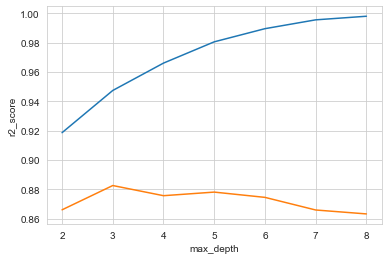

In [96]:
xgb_train_result= []
xgb_test_result= []

max_depth_set = range(2,9)

for max_depth in max_depth_set:
    XGB = XGBRegressor(max_depth=max_depth, n_estimators=300, random_state=42)
    XGB.fit(X_train, y_train)
    xgb_train_result.append(XGB.score(X_train,y_train))
    xgb_test_result.append(XGB.score(X_test, y_test))
    
plt.plot(max_depth_set, xgb_train_result, label="XGB r2_score for train data")
plt.plot(max_depth_set, xgb_test_result, label="XGB r2_score for test data")
plt.ylabel('r2_score')
plt.xlabel('max_depth')
plt.show()

## LGMBRegressor hyperparameters tuning

In [90]:
lgmb = LGBMRegressor()
param_lgmb = {'n_estimators':[100,200,300], 'max_depth':list(range(6,11)), 'random_state': [42]}
grid_lgmb = GridSearchCV(lgmb, param_lgmb, cv=10)
grid_lgmb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [91]:
print('Best parameters: {}'.format(grid_lgmb.best_params_))
print('Best score: {}'.format(grid_lgmb.best_score_))

Best parameters: {'max_depth': 8, 'n_estimators': 300, 'random_state': 42}
Best score: 0.8746400143851336


In [93]:
lgmb_cv=LGBMRegressor(max_depth=8, n_estimators=300 ,random_state=42).fit(X_train,y_train)
print("R2 score for train set: {:.3f}".format(lgmb_cv.score(X_train,y_train)))
print("R2 score for test set: {:.3f}".format(lgmb_cv.score(X_test,y_test)))
lgmb_cv_results = lgmb_cv.predict(X_test)
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, lgmb_cv_results)))

R2 score for train set: 0.954
R2 score for test set: 0.877
Mean absolute error for test set: 74504.001


## Gradient Boosting Regressor hyperparameters tuning

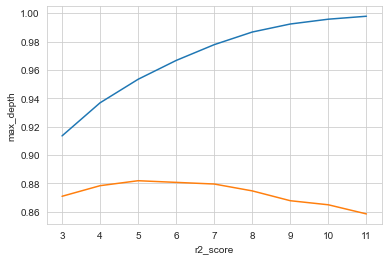

In [98]:
gbr_train_result= []
gbr_test_result= []

max_depth_set = range(3,12)

for max_depth in max_depth_set:
    GBR = GradientBoostingRegressor(max_depth=max_depth, n_estimators=200, random_state=42)
    GBR.fit(X_train, y_train)
    gbr_train_result.append(GBR.score(X_train,y_train))
    gbr_test_result.append(GBR.score(X_test, y_test))
    
plt.plot(max_depth_set, gbr_train_result, label="GBR r2_score for train data")
plt.plot(max_depth_set, gbr_test_result, label="GBR r2_score for train data")
plt.ylabel('r2_score')
plt.xlabel('max_depth')
plt.show()

In [82]:
results_gbr_train

[0.9368417023237232,
 0.9534143609494379,
 0.9666803958563159,
 0.9778085310624801,
 0.9867010359613233,
 0.9923571242309138,
 0.9957452081660456]

In [97]:
gbr = GradientBoostingRegressor()
param_gbr = {'n_estimators':[100,200,300], 'max_depth':list(range(6,11)), 'random_state': [42]}
grid_gbr = GridSearchCV(lgmb, param_gbr, cv=10)
grid_gbr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [98]:
print('Best parameters: {}'.format(grid_gbr.best_params_))
print('Best score: {}'.format(grid_gbr.best_score_))

Best parameters: {'max_depth': 8, 'n_estimators': 300, 'random_state': 42}
Best score: 0.8746400143851336


In [99]:
gbr_cv=LGBMRegressor(max_depth=8, n_estimators=300 ,random_state=42).fit(X_train,y_train)
print("R2 score for train set: {:.3f}".format(gbr_cv.score(X_train,y_train)))
print("R2 score for test set: {:.3f}".format(gbr_cv.score(X_test,y_test)))
gbr_cv_results = gbr_cv.predict(X_test)
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, gbr_cv_results)))

R2 score for train set: 0.954
R2 score for test set: 0.877
Mean absolute error for test set: 74504.001


## Random Forest Regressor hyperparameters tuning

In [100]:
rf = RandomForestRegressor()
param_rf = {'n_estimators':[100,200,300], 'max_depth':list(range(6,12)), 'random_state': [42]}
grid_rf = GridSearchCV(rf, param_rf, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [101]:
print('Best parameters: {}'.format(grid_rf.best_params_))
print('Best score: {}'.format(grid_rf.best_score_))

Best parameters: {'max_depth': 11, 'n_estimators': 300, 'random_state': 42}
Best score: 0.8654781795015151


In [102]:
rf11 = RandomForestRegressor(max_depth=11, n_estimators=300 ,random_state=42).fit(X_train, y_train)
print("R2 score for train set: {:.3f}".format(rf11.score(X_train,y_train)))
print("R2 score for test set: {:.3f}".format(rf11.score(X_test,y_test)))
rf11_results = rf11.predict(X_test)
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, rf11_results)))

R2 score for train set: 0.948
R2 score for test set: 0.863
Mean absolute error for test set: 79182.232


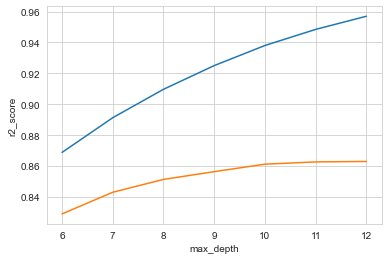

In [103]:
rf_train_result= []
rf_test_result= []

max_depth_set = range(6,13)

for max_depth in max_depth_set:
    RF = RandomForestRegressor(max_depth=max_depth, n_estimators=300, random_state=42)
    RF.fit(X_train, y_train)
    rf_train_result.append(RF.score(X_train,y_train))
    rf_test_result.append(RF.score(X_test, y_test))
    
plt.plot(max_depth_set, rf_train_result, label="RF r2_score for train data")
plt.plot(max_depth_set, rf_test_result, label="RF r2_score for test data")
plt.ylabel('r2_score')
plt.xlabel('max_depth')
plt.show()